# **FINAL PROJECT (BETA GROUP) - HOTEL BOOKING DEMAND**

**Created by:**

- Azhar Muhammad Fikri Fuadi (JCDS - 0208-008)
- Chasanah Nur Ikayanti (JCDS - 0208-006)
- Muhammad Zulfiqar (JCDS - 0208-013)

**Contents:**

- Business Problem Understanding
- Data Understanding
- Exploratory Data Analysis
- Preprocessing
- Methodology (Analysis / Modeling)
- Conclusion and Recommendation

In [2]:
# # metrics
# from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error

# # algorithm
# from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
# from sklearn.linear_model import LinearRegression
# from sklearn.neighbors import KNeighborsRegressor
# from sklearn.tree import DecisionTreeRegressor
# from catboost import CatBoostRegressor
# from lightgbm import LGBMRegressor
# from xgboost import XGBRegressor

# # cross validation & data splitting
# from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV, KFold

# # preprocessing
# from sklearn.compose import ColumnTransformer, TransformedTargetRegressor
# from sklearn.preprocessing import OneHotEncoder, RobustScaler
# from category_encoders import BinaryEncoder, OrdinalEncoder
# from sklearn.pipeline import Pipeline

# # saving model
# import pickle

# statistics
from scipy.stats import normaltest
from scipy.stats import chi2_contingency

# data visualization
import matplotlib.pyplot as plt
import missingno as msno
import seaborn as sns

# miscellaneous
from termcolor import colored

# data manipulation
import pandas as pd
import numpy as np

# warning handling
import warnings
warnings.filterwarnings("ignore")

# maximizing columns and columns width
pd.set_option("display.max_colwidth", 1)
pd.set_option('display.max_columns', None)

## **BUSINESS PROBLEM UNDERSTANDING**

**Context:**

Pembatalan pemesanan merupakan aspek kunci dari manajemen pendapatan hotel karena mempengaruhi sistem reservasi kamar. Pembatalan dalam reservasi pemesanan hotel dapat mengakibatkan kerugian bagi pihak hotel terhadap keputusan manajemen permintaan industri hotel. Banyak faktor yang menyebabkan pembatalan pemesanan seperti jadwal perjalanan bisnis, hari libur, lingkungan yang buruk (pandemi) dan faktor lainnya. Memahami alasan pembatalan pemesanan pelanggan merupakan aspek penting bagi pihak hotel. Mengidentifikasi faktor-faktor yang menyebabkan pembatalan pemesanan dapat membantu hotel mengatasi masalah, meningkatkan kepuasan pelanggan, dan menerapkan strategi untuk meminimalkan pembatalan. Hal ini dapat dilakukan pihak hotel untuk menyesuaikan layanan dan penawarannya agar memenuhi ekpetasi keinginan pelanggan. 

Namun hal ini menjadi tantangan untuk memprediksi faktor pembatalan pemesanan. Untuk mengurangi pembatalan reservasi, akan sangat membantu bagi hotel memiliki sistem yang dapat memprediksi apakah suatu pemesanan akan dibatalkan sehingga mereka dapat menawarkan kamar kepada pelanggan lain atau membuat rencana lainnya. Dalam industri perhotelan terdapat standard format yang bernama Passenger Name Record (PNR) yang dikembangkan oleh industri pariwisata dan perjalanan yang digunakan sebagai pengembangan model prediksi untuk mengklasifikasikan kemungkinan pembatalan pemesanan hotel.

**Problem Statement:**

LisGarve City & Resort Hotel adalah sebuah penginapan yang berada di Portugal. Saat ini mengalami penurunan pendapatan karena banyak mengalami pembatalan pemesanan yang menyebabkan kerugian bagi pihak hotel. Mereka ingin mengetahui tindakan yang harus diambil oleh pihak manajemen hotel untuk mengurangi peluang terjadinya pembatalan pemesanan dengan mengidentifikasi karakteristik yang dimiliki oleh hotel. Banyak faktor yang menyebabkan pembatalan hotel, namun sulit untuk pihak hotel untuk melakukan tracking alasan calon konsumen melakukan pembatalan pemesanan. Sehingga pihak hotel memerlukan kemampuan untuk memprediksi calon konsumen mana yang berpeluang membatalkan pemesanan hotel.

**Goals:**

Berdasarkan permasalahan yang telah dipaparkan, pihak hotel ingin megetahui karakteristik konsumen yang berpeluang membatalkan pemesanan hotel. Untuk meningkatkan pendapatan hotel, tim marketing hotel ingin membuat program yang lebih tepat sasaran kepada calon konsumen yang berpeluang melakukan pembatalan pemesanan.

**Analytic Approach:**

Pendekatan analisis dilakukan beberapa tahapan proses seperti pengumpulan data yang komprehensif, melakukan data cleaning, dan melakukan pengolahan data untuk mendapatkan hasil analisis. Dengan data ini untuk mendapatkan hasil analisis yang akan digunakan untuk pengambilan keputusan, kami melakukan pengolahan data dengan menggunakan pemodelan machine learning untuk memprediksi calon konsumen berpeluang melakukan pembatalan pemesanan hotel atau tidak. 

**Metric Evaluation:**

![alt text](https://www.researchgate.net/publication/328148379/figure/fig1/AS:679514740895744@1539020347601/Model-performance-metrics-Visual-representation-of-the-classification-model-metrics.png)


- *(TP) True Positive*: Pelanggan diprediksi (predict) cancel dan aktualnya (actual) benar-benar cancel.
- *(FP) False Positive*: Pelanggan diprediksi (predict) cancel, tetapi sebenarnya (actual) tidak cancel.
- *(FN) False Negative*: Pelanggan diprediksi (predict) TIDAK cancel, tetapi sebenarnya (actual) cancel.
- *(TN) True Negative*: Pelanggan diprediksi (predict) TIDAK cancel dan sebenarnya (actual) TIDAK cancel.

Untuk megetahui performa suatu model memprediksi targetnya maka kita membutuhkan metric evaluation dengan mengukur nilai errornya. Karena fokus utama kita ingin mengurangi kerugian yang diakibatkan dari pemesanan hotel yang aktualnya cancel namun diprediksi tidak cancel (False Negative). Mengapa Nilai False Negative menjadi fokus pada pemodelan? Karena dari segi bisnis lebih merugikan apabila dilihat dari konsekuensi yang harus ditanggung oleh pihak hotel. Pada percobaan ini kita menggunakan identifikasi sebagai berikut :

Target :
- 0 : Not Canceled
- 1 : Canceled

Action pihak hotel terhadap hasil prediksi:
Cancel : melakukan pendekatan terhadap customer yang diprediksi cancel dengan memberikan voucher senilai 10%

Type 1 Error : False Positif (Pelanggan yang aktualnya tidak cancel tetapi diprediksi cancel)
<br>
Konsekuensi :  Pihak hotel harus menanggung biaya voucher sebesar 10% dari harga hotel.

Type 2 Error : False Negative (Pelanggan yang aktualnya cancel tetapi diprediksi tidak cancel)
<br>
Konsekuensi : Pihak hotel harus kehilangan kesempatan untuk mendapat benefit sejumlah harga kamar hotel.

Untuk memberikan gambaran konsekuensi secara kuantitatif, maka kita akan coba hitung dampak biaya berdasarkan asumsi berikut :
- Rata-rata harga hotel per malam di portugal : 91.85 Euro
- Rata-rata persentase voucher gift hotel : 10% x harga hotel per malam = 10% x 91.85 = 9.1 Euro  


Berdasarkan konsekuensinya, maka sebisa mungkin yang akan kita lakukan adalah membuat model yang dapat mengurangi customer yang melakukan cancel dari hotel tersebut, khususnya jumlah False Negative (pelanggan yang aktualnya cancel tetapi diprediksi tidak akan cancel). Jadi nanti metric utama yang akan kita gunakan adalah recall, karena biaya yang akan ditanggung hotel akan lebih besar (kehilangan kesempatan seharga satu kamar/malam)

## **DATA UNDERSTANDING**

Sebelum masuk ke dalam tahap *Exploratory Data Analysis* (EDA), kita perlu mengenali *dataset*-nya terlebih dahulu pada tahap *data understanding*. *Dataset* dengan tema *Hotel Booking Demand* ini berasal dari sebuah [artikel](https://www.sciencedirect.com/science/article/pii/S2352340918315191) yang ditulis oleh Nuno Antonio, Ana Almeida, dan Luis Nunes dalam jurnal *Data in Brief* pada tahun 2019. *Dataset* ini mulanya berjumlah 2 buah *dataset* terkait data *hotel demand* yang terdiri dari *dataset* salah satu *City Hotel* di Lisbon serta *dataset* salah satu *Resort Hotel* di Algarve (kedua hotel terletak di Portugal), yang telah digabungkan menjadi 1 buah *dataset*. Kedua *dataset* tersebut mencakup pemesanan yang dijadwalkan tiba antara tanggal 1 Juli 2015 dan 31 Agustus 2017, serta memiliki struktur yang sama, yaitu dengan 32 kolom dan setiap barisnya merepresentasikan pemesanan hotel. Di karenakan *dataset* ini merupakan data hotel yang riil, semua elemen yang berkaitan dengan identitas hotel atau pemesan telah dihapus. Sumber dari *dataset* tersebut dapat diakses pada tautan [ini](https://www.kaggle.com/datasets/jessemostipak/hotel-booking-demand/data), sedangkan deskripsi terkait semua *attribute*-nya dapat dilihat pada tabel berikut.

| Attribute | Data Type | Description |
| --- | --- | --- |
| `hotel` | String | Tipe hotel yang disediakan. |
| `is_canceled` | Integer | Nilai yang menunjukkan apakah *booking* hotel dibatalkan (1) atau tidak dibatalkan (0). |
| `lead_time` | Integer | Jarak hari antara tanggal *booking* hotel yang telah masuk ke dalam *Hotel Property Management System* (PMS) hingga tanggal yang dijadwalkan untuk *check-in*. |
| `arrival_date_year` | Integer | Tahun dari tanggal yang dijadwalkan untuk *check-in*. |
| `arrival_date_month` | String | Bulan dari tanggal yang dijadwalkan untuk *check-in*. |
| `arrival_date_week_number` | Integer | Urutan minggu dalam setahun dari tanggal yang dijadwalkan untuk *check-in*. |
| `arrival_date_day_of_month` | Integer | Tanggal yang dijadwalkan untuk *check-in*. |
| `stays_in_weekend_nights` | Integer | Jumlah malam di akhir pekan (Sabtu atau Minggu) yang di-*booking* oleh pemesan untuk menginap di hotel. |
| `stays_in_week_nights` | Integer | Jumlah malam dalam seminggu (Senin - Jum'at) yang di-*booking* oleh pemesan untuk menginap di hotel. |
| `adults` | Integer | Jumlah orang dewasa. |
| `children` | Float | Jumlah anak-anak. |
| `babies` | Integer | Jumlah bayi. |
| `meal` | String | Jenis makanan yang dipesan. Kategori disajikan dalam paket makanan standar perhotelan, yang mana *Undefined* atau SC berarti 'tidak memesan makanan'. |
| `country` | String | Negara asal pemesan. Kategori disajikan dalam format ISO 3166-3:2013 (sekarang [ISO 3166-3:2020](https://www.iso.org/standard/72484.html)). |
| `market_segment` | String | Pemilihan untuk segmentasi pasar (asumsi: segmentasi yang dibuat oleh pihak hotel). Dalam kategori, istilah "TA" ialah singkatan dari "Travel Agents", sedangkan "TO" ialah singkatan dari "Tour Operators". |
| `distribution_channel` | String | Saluran distribusi untuk setiap *booking* hotel. Dalam kategori, istilah "TA" ialah singkatan dari "Travel Agents", sedangkan "TO" ialah singkatan dari "Tour Operators". | |
| `is_repeated_guest` | Integer | Nilai yang menunjukkan apakah nama pemesan berasal dari pemesan yang berulang (1) atau tidak berulang (0). |
| `previous_cancellations` | Integer | Jumlah *booking* hotel sebelumnya yang dibatalkan oleh pemesan sebelum *booking* hotel terkini. Jika tidak ada profil pelanggan yang terkait dengan seluruh pemesanan, maka nilainya akan diatur ke 0. Sementara itu, jika ada profil pelanggan yang terkait dengan seluruh pemesanan, maka nilainya adalah jumlah seluruh pemesanan dengan profil sama yang dibuat sebelum pemesanan saat ini dan dibatalkan. |
| `previous_bookings_not_canceled` | Integer | Jumlah *booking* hotel sebelumnya yang tidak dibatalkan oleh pemesan sebelum *booking* hotel terkini. Jika tidak ada profil pelanggan yang terkait dengan seluruh pemesanan, maka nilainya akan diatur ke 0. Sementara itu, jika ada profil pelanggan yang terkait dengan seluruh pemesanan, maka nilainya adalah jumlah seluruh pemesanan dengan profil sama yang dibuat sebelum pemesanan saat ini dan tidak dibatalkan. |
| `reserved_room_type` | String | Kode untuk tipe kamar yang disediakan. Kode disajikan sebagai pengganti sebutan untuk alasan anonimitas. |
| `assigned_room_type` | String | Kode untuk tipe kamar yang ditetapkan untuk pemesanan. Terkadang tipe kamar yang ditetapkan berbeda dengan tipe kamar yang dipesan karena alasan operasional hotel (misalnya pemesanan berlebih), atau karena permintaan pelanggan. Kode disajikan sebagai pengganti sebutan untuk alasan anonimitas. |
| `booking_changes` | Integer | Jumlah perubahan yang dilakukan pada *booking* hotel sejak masuk ke dalam *Hotel Property Management System* (PMS) hingga saat *check-in* atau pembatalan. |
| `deposit_type` | String | Indikasi apakah pemesan melakukan deposit untuk menjamin *booking* hotel. Variabel ini hanya memiliki 3 kategori, pertama adalah *No Deposit* yang berarti 'tidak ada deposit yang dilakukan', kedua ialah *Non Refund* yang berarti 'deposit dilakukan senilai total biaya menginap', dan ketiga yaitu *Refundable* yang berarti 'deposit dilakukan dengan nilai di bawah total biaya menginap'. |
| `agent` | Float | ID dari *travel agency* yang melakukan *booking* hotel. |
| `company` | Float | ID dari perusahaan yang melakukan *booking* hotel atau yang bertanggung jawab untuk membayar *booking*-nya. ID ditampilkan sebagai pengganti sebutan untuk alasan anonimitas. |
| `days_in_waiting_list` | Integer | Jumlah hari untuk setiap *booking* hotel yang masuk ke dalam *waiting list* sebelum akhirnya dikonfirmasi kepada pemesan. |
| `customer_type` | String | Jenis *booking* hotel, dengan asumsi *Contract* berarti 'ketika *booking* hotel memiliki jatah atau jenis *Contract* lain yang terkait dengannya', *Group* berarti 'ketika *booking* hotel terkait dengan *Group*', *Transient* berarti 'ketika *booking* hotel bukan bagian dari *Group* atau *Contract*, dan tidak terikat dengan *transient booking* lainnya', serta *Transient-Party* berarti 'ketika *booking* hotel *Transient*, tetapi terkait dengan setidaknya *transient booking* lainnya'. |
| `adr` | Float | Rata-rata tarif harian atau *Average Daily Rate* yang ditentukan untuk membagi jumlah semua transaksi dengan jumlah malam yang di-*booking*. |
| `required_car_parking_spaces` | Integer | Jumlah ruang parkir mobil yang dibutuhkan oleh pemesan. |
| `total_of_special_requests` | Integer | Jumlah permintaan khusus yang dibuat oleh pemesan. Misalnya *twin bed* atau *high floor*. |
| `reservation_status` | String | Status *booking* hotel terakhir, dengan asumsi *Canceled* berarti '*booking* dibatalkan oleh pemesan', *Check-Out* berarti 'pemesan telah melakukan *check-in* namun telah meninggalkan hotel atau *check-out*', serta *No Show* berarti 'pemesan tidak melakukan *check-in* dan menginformasikan alasannya kepada hotel'. |
| `reservation_status_date` | String | Tanggal saat status terakhir ditetapkan. Variabel ini dapat digunakan bersamaan dengan kolom `reservation_status` untuk memahami kapan *booking* hotel dibatalkan atau kapan pemesan melakukan *check-out* dari hotel. |

In [3]:
# menampilkan isi dari dataset
df_source = pd.read_csv("hotel_bookings.csv")
df = df_source.copy()
display(df.head(), df.tail())

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
119385,City Hotel,0,23,2017,August,35,30,2,5,2,0.0,0,BB,BEL,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,0.0,0,BB,FRA,Online TA,TA/TO,0,0,0,E,E,0,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,0.0,0,BB,DEU,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07
119389,City Hotel,0,205,2017,August,35,29,2,7,2,0.0,0,HB,DEU,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,9.0,NaN,0,Transient,151.20,0,2,Check-Out,2017-09-07


In [4]:
# menampilkan informasi dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

Secara garis besar, *dataset* di atas berisi kumpulan informasi mengenai pemesanan *City Hotel* dan *Resort Hotel*, serta mencakup informasi lainnya seperti waktu kedatangan yang dijadwalkan, lama menginap, jumlah orang yang akan melakukan *check-in*, status pemesanan, dll. Dalam *dataset* tersebut, setiap baris mewakili 1 data transaksi yang totalnya berisi 119.390 baris data serta terdapat 32 kolom. Dari informasi di atas pun, terlihat secara sekilas bahwa *dataset* memiliki *missing value* pada kolom `children`, `country`, `agent`, serta `company`, yang mana penanganan terhadap *missing value* tersebut akan dilakukan pada tahap *preprocessing*.

In [5]:
# melakukan skimming pada dataset
pd.DataFrame({
    "Attribute"                                 : df.columns.values,
    "Data Type"                                 : df.dtypes.values,
    "Number of Unique"                          : df.nunique().values,
    "Number of Duplicate"                       : df.duplicated().sum(),
    "Missing Value (%)"                         : df.isna().mean().values * 100,
    "Negative Value (%)"                        : [len(df[col][df[col] < 0]) / len(df) * 100 if col in df.select_dtypes(include = np.number).columns else 0 for col in df.columns],
    "'Zero' Value in Numerical Feature (%)"     : [len(df[col][df[col] == 0]) / len(df) * 100 if col in df.select_dtypes(include = np.number).columns else 0 for col in df.columns],
    "'Zero' Value in Categorical Feature (%)"   : [len(df[col][df[col] == "0"]) / len(df) * 100 if col in df.select_dtypes(include = np.object_).columns else 0 for col in df.columns],
    "Unique Sample"                             : [df[col].unique() for col in df.columns]}
).round(4)

,Attribute,Data Type,Number of Unique,Number of Duplicate,Missing Value (%),Negative Value (%),'Zero' Value in Numerical Feature (%),'Zero' Value in Categorical Feature (%),Unique Sample
0,hotel,object,2,31994,0.0000,0.0000,0.0000,0.0,"[Resort Hotel, City Hotel]"
1,is_canceled,int64,2,31994,0.0000,0.0000,62.9584,0.0,"[0, 1]"
2,lead_time,int64,479,31994,0.0000,0.0000,5.3145,0.0,"[342, 737, 7, 13, 14, 0, 9, 85, 75, 23, 35, 68, 18, 37, 12, 72, 127, 78, 48, 60, 77, 99, 118, 95, 96, 69, 45, 40, 15, 36, 43, 70, 16, 107, 47, 113, 90, 50, 93, 76, 3, 1, 10, 5, 17, 51, 71, 63, 62, 101, 2, 81, 368, 364, 324, 79, 21, 109, 102, 4, 98, 92, 26, 73, 115, 86, 52, 29, 30, 33, 32, 8, 100, 44, 80, 97, 64, 39, 34, 27, 82, 94, 110, 111, 84, 66, 104, 28, 258, 112, 65, 67, 55, 88, 54, 292, 83, 105, 280, 394, ...]"
3,arrival_date_year,int64,3,31994,0.0000,0.0000,0.0000,0.0,"[2015, 2016, 2017]"
4,arrival_date_month,object,12,31994,0.0000,0.0000,0.0000,0.0,"[July, August, September, October, November, December, January, February, March, April, May, June]"
5,arrival_date_week_number,int64,53,31994,0.0000,0.0000,0.0000,0.0,"[27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26]"
6,arrival_date_day_of_month,int64,31,31994,0.0000,0.0000,0.0000,0.0,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31]"
7,stays_in_weekend_nights,int64,17,31994,0.0000,0.0000,43.5531,0.0,"[0, 1, 2, 4, 3, 6, 13, 8, 5, 7, 12, 9, 16, 18, 19, 10, 14]"
8,stays_in_week_nights,int64,35,31994,0.0000,0.0000,6.4034,0.0,"[0, 1, 2, 3, 4, 5, 10, 11, 8, 6, 7, 15, 9, 12, 33, 20, 14, 16, 21, 13, 30, 19, 24, 40, 22, 42, 50, 25, 17, 32, 26, 18, 34, 35, 41]"
9,adults,int64,14,31994,0.0000,0.0000,0.3375,0.0,"[2, 1, 3, 4, 40, 26, 50, 27, 55, 0, 20, 6, 5, 10]"


*Output* di atas menampilkan hasil dari proses *skimming* pada keseluruhan *dataset*. *Skimming* di sini bertujuan untuk mengetahui sekaligus memahami *dataset* dengan cepat agar mendapatkan gambaran secara umumnya. Untuk lebih jelasnya mari kita lihat tabel di bawah ini.

| Term | Description |
| --- | --- |
| Data Type | Mayoritas *feature* kategorikal memiliki tipe data ***string***, sedangkan seluruh *feature* numerikal memiliki tipe data ***integer*** atau ***float***. Perlu diperhatikan bahwasanya tidak semua kolom yang *sample*-nya numerik termasuk ke dalam *feature* numerikal, akan tetapi ada juga kolom yang *sample*-nya numerik namun bersifat kategorikal, contohnya seperti *sample* pada kolom `is_canceled`, `is_repeated_guest`, dsb. |
| Number of Unique | Terdapat variasi nilai unik yang cukup baik dari *feature* kategorikal yang mengindikasikan bahwa *dataset*-nya cukup beragam. |
| Number of Duplicate | Adapun data duplikat yang terdapat pada *dataset*, yaitu sebanyak 31.994 baris data. Hal ini mungkin memerlukan penyelidikan lebih lanjut untuk mengetahui apakah data tersebut benar-benar duplikat atau hanya pengulangan yang valid. |
| Missing Value (%) | Terlihat secara jelas bahwa *dataset* memiliki *missing value* pada kolom `children` (0,003%), `country` (0,4%), `agent` (13,6%), serta `company` (94,3%), yang mana penanganannya akan dilakukan pada tahap *preprocessing*. |
| Negative Value (%) | *Term* ini bertujuan untuk menampilkan nilai yang negatif pada *feature* numerikal, yang mana hal itu dirasa sesuai untuk tipe data dan kolom seperti `adr`. Jika dilihat lebih teliti, kolom tersebut memiliki 0,0008% data yang nilainya negatif. |
| 'Zero' Value in Numerical & Categorical Features (%) | *Output* pada *term* ini cukup menjelaskan bahwa 96,8% pemesan **bukan** merupakan tamu yang datang berulang atau *repeated guest*, artinya hanya 3,2% pemesan yang merupakan *repeated guest*. Selain itu, *output*-nya cukup memperlihatkan juga betapa banyaknya transaksi yang di-*cancel* atau dibatalkan. Menilik transaksi yang tidak dibatalkanya sebesar 62,9%, itu berarti sekitar 37,1% transaksi berhasil dibatalkan. Tambahannya, terdapat data lain yang bernilai 0, di mana data-data tersebut akan di-*breakdown* lebih detail pada tahap EDA. Namun yang jelas, pada *attribute* yang bertipe data *string* tidak terdapat data yang bernilai 0. |
| Unique Sample | *Term* ini menampilkan *sample* yang sesuai dengan nilai uniknya. Setiap *feature* kategorikal memiliki beragam *sample* yang menunjukkan bahwa *dataset* terstruktur dengan cukup baik. |

In [6]:
# menampilkan descriptive statistics dari feature numerikal dan kategorikal
display(df.describe(), df.describe(include = "object"))

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


,hotel,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,customer_type,reservation_status,reservation_status_date
count,119390,119390,119390,118902,119390,119390,119390,119390,119390,119390,119390,119390
unique,2,12,5,177,8,5,10,12,3,4,3,926
top,City Hotel,August,BB,PRT,Online TA,TA/TO,A,A,No Deposit,Transient,Check-Out,2015-10-21
freq,79330,13877,92310,48590,56477,97870,85994,74053,104641,89613,75166,1461


Selain *skimming*, adapun *descriptive statistics* yang bertujuan untuk meringkas dan mengorganisir karakteristik dasar dari suatu *dataset* secara komprehensif agar lebih mudah untuk dipahami. Proses ini membantu kita dalam menyajikan data dengan jelas dan membuat kesimpulan awal tentang karakteristik data yang diamati, baik itu data yang terdapat pada *feature* kategorikal maupun numerikal. Akan tetapi, kita tidak bisa mengatakan bahwa ***output* pertama merupakan *output* untuk *feature* numerikal, sedangkan *output* kedua untuk *feature* kategorikal**. Kita perlu melihat secara detail mengenai kolom mana yang benar-benar termasuk ke dalam *feature* numerikal dan kategorikal dengan cara melihat *sample*-nya. Maka dari itu, kita akan mencoba untuk mengelompokkan setiap *attribute*-nya ke dalam 2 tabel, sekaligus menjelaskan temuan dari *output* di atas yang mungkin akan didukung oleh *output* dari proses *skimming*.

***Numerical Features***

| Attribute | Insight |
| --- | --- |
| `lead_time` | Periode waktu terpendek dari tanggal melakukan *booking* hingga tanggal *check-in* yaitu **0** hari, sedangkan periode waktu terpanjang adalah **737** hari. Kita juga bisa mengetahui rata-rata jarak waktunya ada di angka **104** hari. |
| `stays_in_weekend_nights` | **19** malam merupakan angka tertinggi yang pernah di-*booking* oleh pemesan untuk menginap saat *weekend* (Sabtu atau Minggu). |
| `stays_in_week_nights` | **50** malam merupakan angka tertinggi yang pernah di-*booking* oleh pemesan untuk menginap selama *weekday* (Senin - Jum'at). |
| `adults` | Angka tertinggi orang dewasa yang pernah tercatat saat melakukan *booking* hotel mencapai **50** orang. |
| `children` | Sekitar 92,8% data *booking* hotel dipesan dengan tidak membawa atau bahkan tidak berniat membawa anak-anak. Meski begitu, angka tertinggi anak-anak yang pernah tercatat dalam data *booking* hotel berjumlah **10** anak-anak. |
| `babies` | Hampir semua pemesan yang melakukan *booking* hotel tidak membawa atau bahkan tidak berniat membawa bayi (sekitar 99,2% data), yang berarti sekitar 0,8% sisanya membawa atau berniat membawa bayi saat *check-in* hotel. Di dalam 0,8% data tersebut, tercatat bahwa angka tertinggi bayi yang pernah atau akan dibawa oleh pemesan mencapai **10** bayi. |
| `previous_cancellations` | Seorang pemesan pernah melakukan pembatalan *booking* hotel sebanyak **26** kali. Hal tersebut merupakan jumlah pembatalan terbanyak yang pernah ada. |
| `previous_bookings_not_canceled` | Rekor tertinggi seorang pelanggan dalam mempertahankan reservasinya tanpa melakukan pembatalan *booking* yaitu sebanyak **72** kali.|
| `booking_changes` | Perubahan data *booking* terbanyak yang pernah dilakukan oleh seorang pelanggan adalah **21** kali.  |
| `days_in_waiting_list` | Sebanyak **391** hari adalah periode terpanjang yang dicatat dalam *waiting list* sebelum akhirnya dikonfirmasi kepada pemesan. |
| `adr` | Rata-rata tarif harian atau *Average Daily Rate* terendah ada di angka **-6,38** EUR, sedangkan yang tertinggi ada di angka **5.400** EUR. |
| `required_car_parking_spaces` | Angka tertinggi yang pernah dicatat untuk jumlah ruang parkir mobil mencapai **8** buah. |
| `total_of_special_requests` | Terdapat sejumlah 6 permintaan khusus yang pernah dibuat oleh pemesan, dari mulai **0** hingga **5**. |

***Categorical Features***

| Attribute | Insight |
| --- | --- |
| `hotel` | Tipe hotel yang paling banyak di-*booking* yaitu ***City Hotel*** dengan total sebanyak 79.330 pemesanan. |
| `is_canceled` | Kolom ini merupakan *target* yang nilainya hanya **0** dan **1**. Merujuk pada tabel *skimming*, persentase *booking* yang tidak dibatalkan (62,9%) jauh lebih besar jika dibandingkan dengan yang dibatalkan (37,1%). |
| `arrival_date_year` | *Dataset* mencakup pemesanan yang dijadwalkan tiba di antara tahun **2015** dan **2017**. |
| `arrival_date_month` | Pemesan lebih sering menjadwalkan *check-in* hotel untuk bulan **August**. |
| `arrival_date_week_number` | Jadwal kedatangan tamu selalu ada di setiap minggunya (dalam setahun), dari mulai minggu ke-**1** hingga minggu ke-**53**. |
| `arrival_date_day_of_month`| Selalu ada pemesan yang menjadwalkan untuk *check-in* hotel di **setiap harinya**. |
| `meal` | Paket makanan **BB** atau [*Bed and Breakfast*](https://www.arbat-house.com/en/articles/types-of-food-in-hotels/) lebih sering dipilih saat melakukan *booking* hotel, dengan persentase pemesanannya mencapai lebih dari 75% dari keseluruhan data. |
| `country` | Banyaknya pemesan yang melakukan *booking* hotel berasal dari negara dengan kode **PRT** atau [Portugal](https://www.iso.org/obp/ui/#iso:code:3166:PT). Hal itu sangatlah masuk akal, lantaran *dataset* ini merupakan *dataset* yang berasal dari data sebuah hotel dan resort di negara tersebut. |
| `market_segment` | Mayoritas *booking* hotel dilakukan melalui *website* atau *travel marketplace* yang menyediakan layanan pemesanan hotel. Hal itu di konfirmasi dengan ***Online TA*** atau [*Online Travel Agency* (OTA)](https://welcome.expediagroup.com/en/resources/hotel-distribution-strategy-resources-tips/otas-work-use-one#:~:text=An%20online%20travel%20agency%20(OTA)%20is%20a%20web%2Dbased,more%2C%20directly%20with%20travel%20suppliers.) sebagai kategori yang paling sering muncul pada *dataset*. |
| `distribution_channel` | Melihat data yang paling sering muncul pada kolom `market_segment` adalah ***Online TA***, secara tidak langsung saluran distribusi yang paling banyak dipilih dalam memesan hotel pun juga berasal dari *travel agency*, baik itu yang dilakukan secara *online* maupun *offline*. Dari pernyataan tersebut, sangatlah masuk akal jika **TA/TO** menjadi kategori terbanyak pada *dataset*. |
| `is_repeated_guest` | Sekitar 96,8% pemesan **bukan** berasal dari tamu yang datang berulang atau *repeated guest* jika kita merujuk pada tabel *skimming*. |
| `reserved_room_type` | Tipe kamar yang paling banyak dipilih saat melakukan *booking* adalah tipe kamar **A**. |
| `assigned_room_type` | Sama halnya dengan tipe kamar yang paling banyak dipesan saat proses *booking* hotel, kamar yang ditetapkan oleh pihak hotel untuk para pemesan pun juga kebanyakan bertipe **A**. Meski begitu, tidak semua tipe kamar yang dipesan berakhir sama dengan yang ditetapkan oleh pihak hotel, seperti contoh pada tipe kamar **A** yang mengalami penurunan frekuensi dari yang mulanya 85.994 data menjadi hanya 74.053 data yang ditetapkan dengan tipe yang sama. |
| `deposit_type` | Lebih dari 85% pemesan memilih untuk tidak deposit atau ***No Deposit*** saat melakukan *booking* hotel. |
| `agent` | Terdapat **333** ID *travel agency* yang pernah melakukan *booking* hotel. |
| `company` | Terdapat **352** ID perusahaan yang pernah melakukan *booking* hotel atau yang bertanggung jawab untuk membayar *booking*. |
| `customer_type` | Tipe *customer* yang paling sering melakukan *booking* adalah ***Transient***, yang berarti 75% *customer* hanya memesan hotel untuk kebutuhan [jangka waktu yang cukup pendek](https://www.xotels.com/en/glossary/transient). |
| `reservation_status` | Lebih dari 60% *booking* hotel tidak dibatalkan atau pemesan berhasil melakukan ***Check-Out***. Hal ini dapat didukung oleh tabel *skimming* yang menunjukkan bahwa *booking* tidak dibatalkan (0) memiliki persentase sebesar 62,9% dari keseluruhan data. |
| `reservation_status_date` | Tanggal **21 Oktober 2015** menjadi tanggal yang paling banyak memiliki kejelasan terkait *booking* hotel, baik itu transaksi yang dibatalkan hingga transaksi yang berhasil. |

***Additional Insights***

- *Attribute* pada *feature* kategorikal serta numerikal sebelum dilakukan proses *cleaning* masing-masing berjumlah **19** dan **13** kolom.
- Semua kolom pada *feature* numerikal berisi data diskrit, terkecuali kolom `adr` yang memiliki data kontinu.
- Semua kolom pada *feature* kategorikal berisi data nominal.
- *Target* untuk pemodelan *machine learning* adalah kolom `is_canceled`.
- Jadwal *check-in* dipisah menjadi 3 kolom (`arrival_date_year`, `arrival_date_month`, dan `arrival_date_day_of_month`), yang mana hal tersebut dapat memudahkan kita dalam melakukan analisis dan *encoding* saat pemodelan *machine learning*. Meski begitu, jika kita ingin menampilkan *trend* atau pola dari waktu ke waktu, kita perlu menyatukannya menjadi 1 *feature* dengan membuat kolom baru dan men-*set* tipe datanya menjadi *datetime*.
- Tipe data pada kolom `children`, `agent`, dan `company` masih berbentuk *float* (seharusnya *integer*), sehingga kita perlu mengubahnya pada tahap *preprocessing*.
- Jika merujuk pada deskripsi kolom `meal`, di situ dijelaskan bahwa *Undefined* atau [*Self Catering*](https://www.arbat-house.com/en/articles/types-of-food-in-hotels/) (SC) berarti 'tidak memesan makanan', yang artinya terdapat 2 kategori berbeda namun memiliki nilai atau *value* yang sama. Maka dari itu, kita memutuskan untuk mengganti *Undefined* menjadi SC pada tahap *preprocessing* nanti.
- Terdapat data yang bernilai minus pada kolom `adr` yang dirasa kurang relevan untuk sebuah rata-rata tarif harian, sehingga kita perlu menanganinya pada tahap *preprocessing* nanti. 
- Sama halnya dengan jadwal *check-in*, kolom `reservation_status_date` pun juga harus diubah tipe datanya menjadi *datetime* jika kita ingin menampilkan *trend* atau pola dari waktu ke waktu. Selain itu, kita perlu membuat 2 kolom baru yang berisi tahun dan bulan dari kolom tersebut, yang mana tujuannya yaitu untuk memudahkan kita dalam melakukan analisis. Sedangkan untuk keperluan *modeling*, kita tidak perlu menggunakan kolom tersebut di karenakan data yang tercantum muncul setelah keterangan pemesanannya dibatalkan ataupun tidak dibatalkan.
- Kolom `arrival_date_day_of_month` tidak akan diikutsertakan dalam pengecekan distribusi data di karenakan *sample*-nya yang kurang relevan untuk divisualisasikan, begitu pun juga dengan kolom `reservation_status_date` yang akan diwakilkan menggunakan kolom baru (`reservation_status_date_year` dan `reservation_status_date_month`) hasil *splitting* setiap *sample*-nya.
- Berikut adalah *feature* numerikal yang akan dicek distribusi datanya, di antaranya meliputi:
    - `lead_time`
    - `stays_in_weekend_nights`
    - `stays_in_week_nights`
    - `adults`
    - `children`
    - `babies`
    - `previous_cancellations`
    - `previous_bookings_not_canceled`
    - `booking_changes`
    - `days_in_waiting_list`
    - `adr`
    - `required_car_parking_spaces`
    - `total_of_special_requests`
- Sedangkan *feature* kategorikal yang akan dicek distribusi datanya, di antaranya meliputi:
    - `hotel`
    - `is_canceled`
    - `arrival_date_year`
    - `arrival_date_month`
    - `arrival_date_week_number`
    - `meal`
    - `country`
    - `market_segment`
    - `distribution_channel`
    - `is_repeated_guest`
    - `reserved_room_type`
    - `assigned_room_type`
    - `deposit_type`
    - `agent`
    - `company`
    - `customer_type`
    - `reservation_status`
    - `reservation_status_date_year` (kolom baru)
    - `reservation_status_date_month` (kolom baru)

## **EXPLORATORY DATA ANALYSIS**

Agar dapat mempermudah analisis serta proses visualisasi pada tahap EDA, kita akan membuat 2 kolom baru yang berisi tahun dan bulan yang mengacu pada kolom `reservation_status_date`. Setelah prosesnya selesai, barulah kita akan memisahkan setiap *feature* numerikal dan kategorikal yang diperlukan untuk proses EDA ini.

In [7]:
# membuat 2 kolom baru yang berisi tahun dan bulan dari kolom reservation_status_date
def reserv_year(date):
    return int(date.split("-")[0])

def reserv_month(date):
    num_month = date.split("-")[1]
    if num_month == "01":
        return "January"
    elif num_month == "02":
        return "February"
    elif num_month == "03":
        return "March"
    elif num_month == "04":
        return "April"
    elif num_month == "05":
        return "May"
    elif num_month == "06":
        return "June"
    elif num_month == "07":
        return "July"
    elif num_month == "08":
        return "August"
    elif num_month == "09":
        return "September"
    elif num_month == "10":
        return "October"
    elif num_month == "11":
        return "November"
    elif num_month == "12":
        return "December"

df["reservation_status_date_year"] = df["reservation_status_date"].apply(reserv_year)
df["reservation_status_date_month"] = df["reservation_status_date"].apply(reserv_month)

In [8]:
# memisahkan feature numerikal dan kategorikal
numerical_features = [
    "lead_time",
    "stays_in_weekend_nights",
    "stays_in_week_nights",
    "adults",
    "children",
    "babies",
    "previous_cancellations",
    "previous_bookings_not_canceled",
    "booking_changes",
    "days_in_waiting_list",
    "adr",
    "required_car_parking_spaces",
    "total_of_special_requests"
]

categorical_features = []
for attribute in df.columns:
    if attribute == "arrival_date_day_of_month" or attribute == "reservation_status_date":
        continue
    elif attribute not in numerical_features:
        categorical_features.append(attribute)

### `Data Distribution (Numerical Features)`

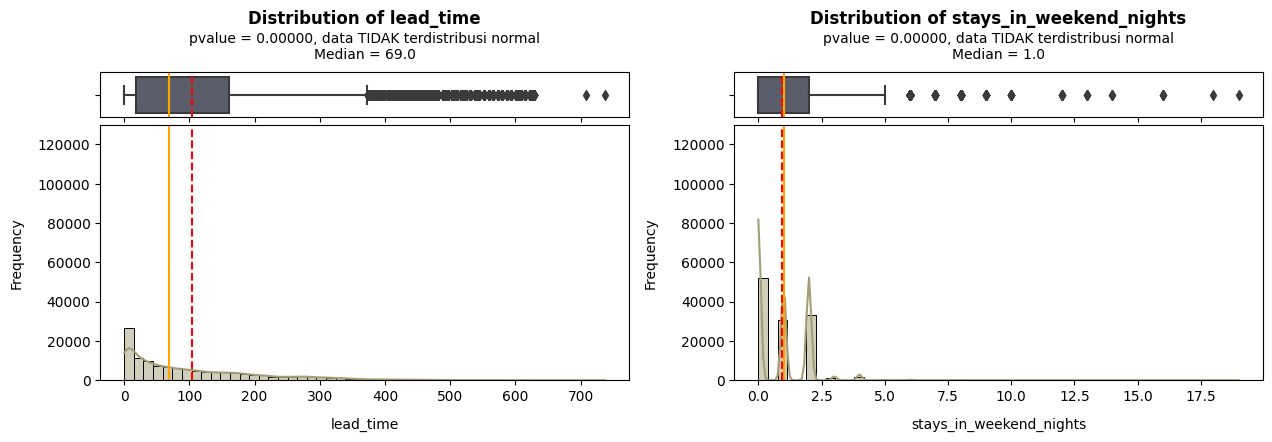

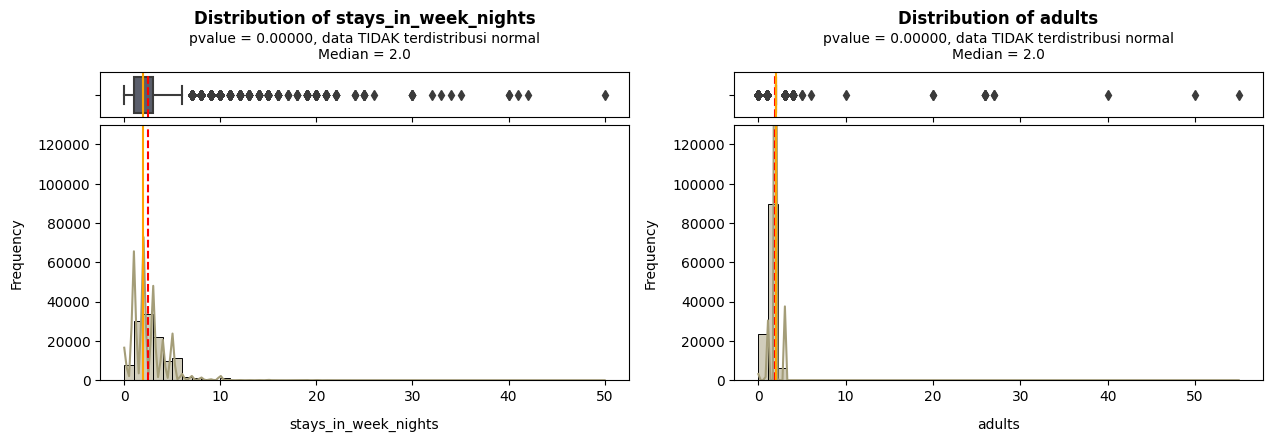

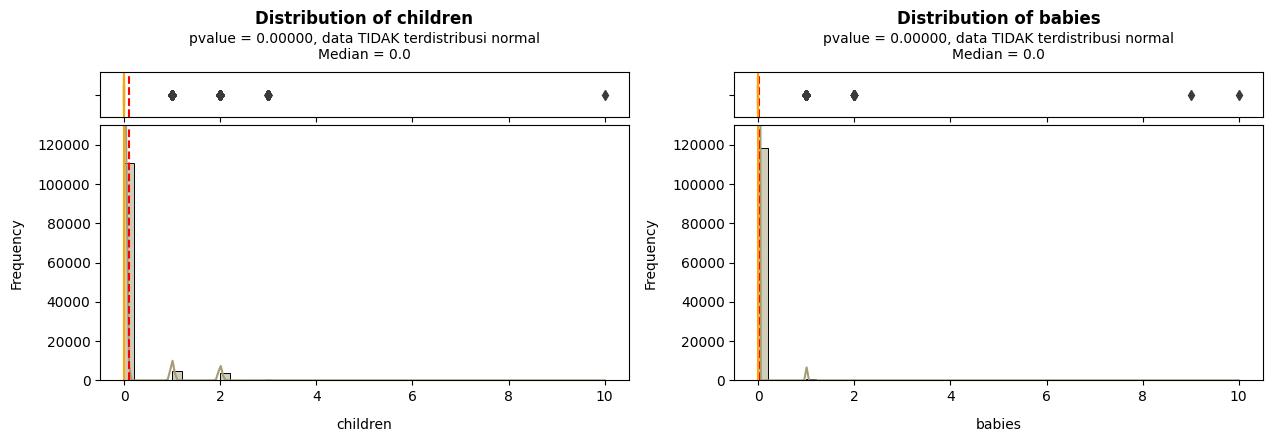

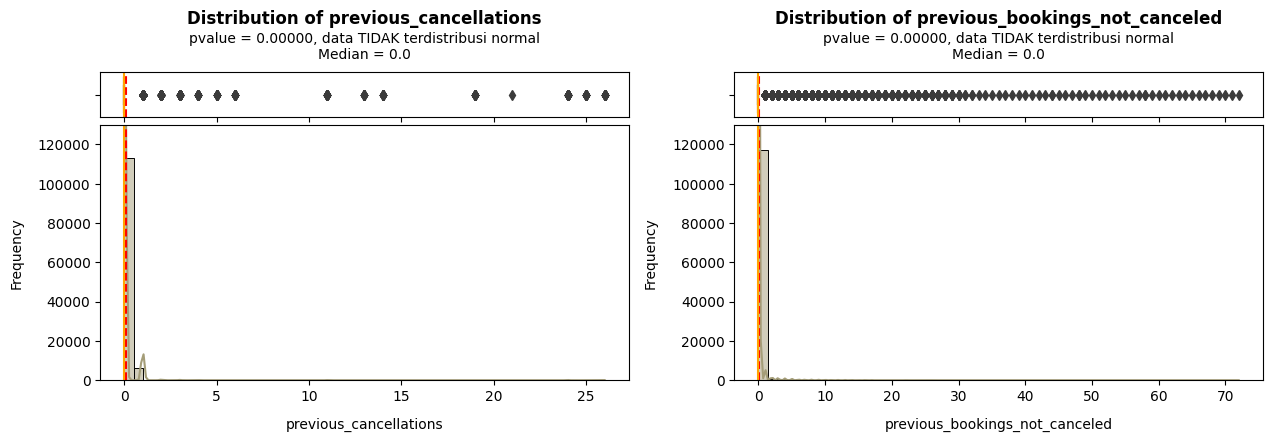

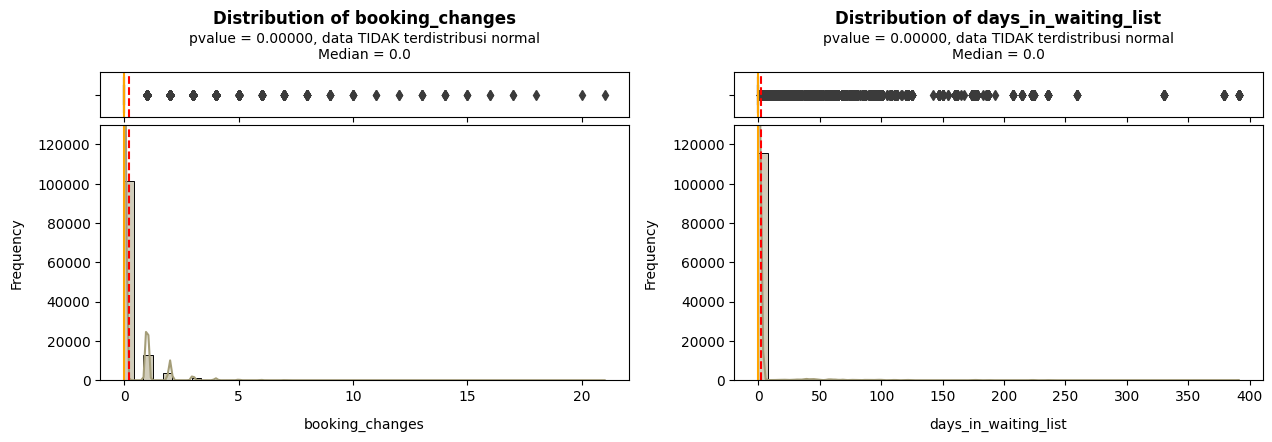

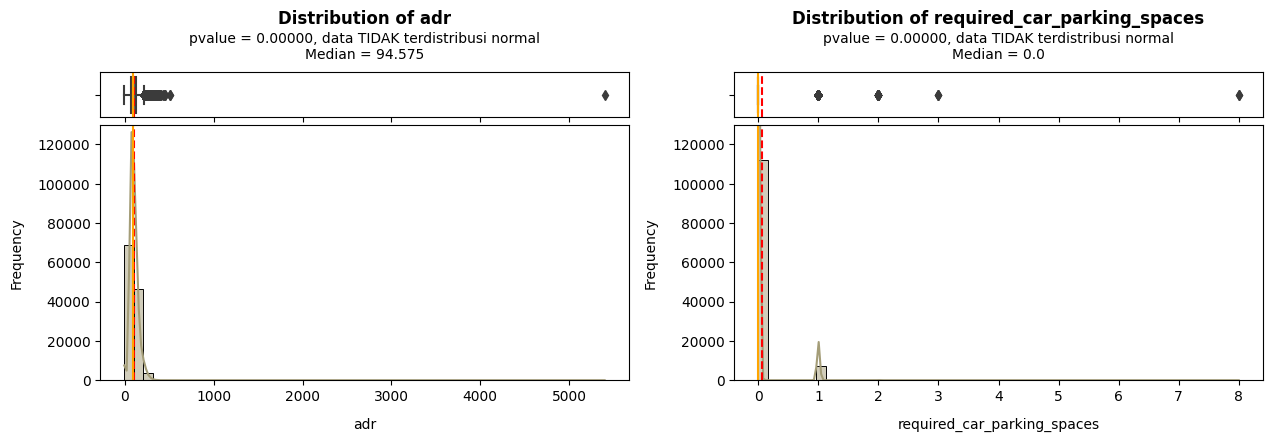

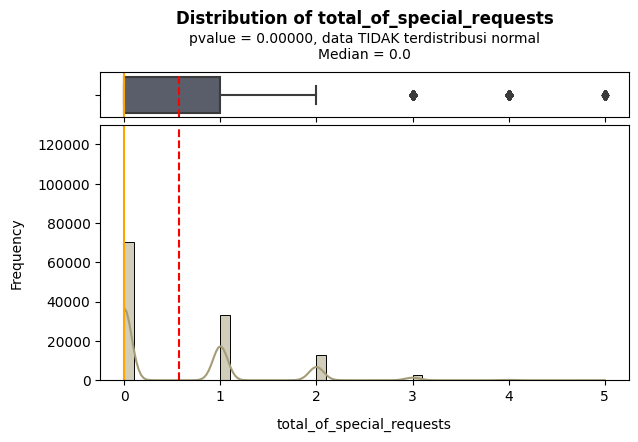

In [9]:
# menampilkan distribusi data pada feature numerikal beserta uji normalitasnya
features = [
    numerical_features[:2],
    numerical_features[2:4],
    numerical_features[4:6],
    numerical_features[6:8],
    numerical_features[8:10],
    numerical_features[10:12],
    numerical_features[12]
]

for plot in features:    
    if plot == numerical_features[12]:
        # plot untuk numerical_features index ke-12
        fig, ax = plt.subplots(
            nrows = 2,
            ncols = 1,
            figsize = (6.82, 4),
            gridspec_kw = {
                "height_ratios" : (.15, .85),
                "hspace" : 0.05
            }
        )
        ax = ax.flatten()
        stat, pvalue = normaltest(df[plot].dropna())
        if pvalue > 0.05:
            distribution = f"pvalue = {pvalue:.5f}, data terdistribusi normal\nMedian = {df[plot].median()}"
        else:
            distribution = f"pvalue = {pvalue:.5f}, data TIDAK terdistribusi normal\nMedian = {df[plot].median()}"

        # menampilkan boxplot & title
        sns.boxplot(x = df[plot], ax = ax[0], color = "#575C6E", medianprops = dict(color = "orange"))
        ax[0].axvline(df[plot].mean(), color = "red", linestyle = "--")
        ax[0].axvline(df[plot].median(), color = "orange", linestyle = "-")
        ax[0].set_title(f"Distribution of {plot}\n", fontsize = 12, pad = 20, fontweight = "bold")
        ax[0].text(x = 0.5, y = 1.3, s = distribution, ha = "center", transform = ax[0].transAxes)

        # menampilkan histplot
        sns.histplot(data = df[plot], ax = ax[1], kde = True, stat = "count", bins = 50, color = "#A49D78")
        ax[1].axvline(df[plot].mean(), color = "red", linestyle = "--")
        ax[1].axvline(df[plot].median(), color = "orange", linestyle = "-")
        ax[1].set_xlabel(plot, labelpad = 10)
        ax[1].set_ylabel("Frequency", labelpad = 10)
        ax[1].set_ylim(0, 130000)
    else:
        # plot untuk numerical_features index ke-0 hingga ke-11
        fig, ax = plt.subplots(
            nrows = 2,
            ncols = 2,
            figsize = (15, 4),
            gridspec_kw = {
                "height_ratios" : (.15, .85),
                "hspace" : 0.05
            }
        )
        ax = ax.flatten()
        for i, num_cols in enumerate(plot):
            stat, pvalue = normaltest(df[num_cols].dropna())
            if pvalue > 0.05:
                distribution = f"pvalue = {pvalue:.5f}, data terdistribusi normal\nMedian = {df[num_cols].median()}"
            else:
                distribution = f"pvalue = {pvalue:.5f}, data TIDAK terdistribusi normal\nMedian = {df[num_cols].median()}"

            # menampilkan boxplot & title
            sns.boxplot(x = df[num_cols], ax = ax[i], color = "#575C6E", medianprops = dict(color = "orange"))
            ax[i].axvline(df[num_cols].mean(), color = "red", linestyle = "--")
            ax[i].axvline(df[num_cols].median(), color = "orange", linestyle = "-")
            ax[i].set_title(f"Distribution of {num_cols}\n", fontsize = 12, pad = 20, fontweight = "bold")
            ax[i].text(x = 0.5, y = 1.3, s = distribution, ha = "center", transform = ax[i].transAxes)

            # menampilkan histplot
            sns.histplot(data = df[num_cols], ax = ax[i+2], kde = True, stat = "count", bins = 50, color = "#A49D78")
            ax[i+2].axvline(df[num_cols].mean(), color = "red", linestyle = "--")
            ax[i+2].axvline(df[num_cols].median(), color = "orange", linestyle = "-")
            ax[i+2].set_xlabel(num_cols, labelpad = 10)
            ax[i+2].set_ylabel("Frequency", labelpad = 10)
            ax[i+2].set_ylim(0, 130000)
    plt.tight_layout()
    plt.show()

Berdasarkan *output* di atas, semua *feature* numerikal memiliki data yang **TIDAK** terdistribusi normal. Hal tersebut didukung dengan visualisasi *histogram* dari semua *feature*-nya yang terlihat ***right-skewed*** atau ***positive skew***, serta telah dibuktikan juga dengan uji normalitas menggunakan D’Agostino and Pearson, di mana semua nilai **pvalue**-nya berada di bawah 0,05. Selain itu, kita dapat mengetahui bahwa semua *feature* numerikal memiliki banyak *outlier*, yang mana hal tersebut akan kita *breakdown* lebih lanjut saat tahap *preprocessing*. Adapun *insight* lainnya terkait semua *feature* di atas yang akan dijabarkan pada tabel di bawah ini.

| Attribute | Insight |
| --- | --- |
| `lead_time` | Mayoritas periode waktu seorang pelanggan untuk menunggu dari tanggal melakukan *booking* hingga tanggal *check-in* berada pada rentang 0 hingga 150 hari. |
| `stays_in_weekend_nights` | Sebagian besar pelanggan yang berencana atau telah melakukan *check-in* saat *weekend* biasanya menginap antara 0 hingga 2 malam. |
| `stays_in_week_nights` | Sebagian besar pelanggan yang berencana atau telah melakukan *check-in* selama hari kerja biasanya menginap antara 0 hingga 5 malam. |
| `adults` | Umumnya, jumlah orang dewasa yang akan atau pernah melakukan *check-in* berada pada rentang 0 hingga 2 orang.  |
| `children` | Sebagian besar *booking* hotel dipesan dengan tidak membawa atau bahkan tidak berniat membawa anak-anak.  |
| `babies` | Hampir semua pemesan yang melakukan *booking* hotel tidak membawa atau bahkan tidak berniat membawa bayi. |
| `previous_cancellations` | Mayoritas pemesan tidak melakukan pembatalan *booking* hotel pada pemesanan sebelumnya. Di sisi lain, bisa saja mayoritas pemesan merupakan pelanggan baru atau bukan *repeated guest* jika kita merujuk pada [deskripsi](https://www.sciencedirect.com/science/article/pii/S2352340918315191#bib5) kolom tersebut. |
| `previous_bookings_not_canceled` | Sebagian besar pelanggan yang melakukan pemesanan hotel sebelumnya tidak membatalkan reservasi mereka. Di sisi lain, bisa saja mayoritas pemesan merupakan pelanggan baru atau bukan *repeated guest* jika kita merujuk pada [deskripsi](https://www.sciencedirect.com/science/article/pii/S2352340918315191#bib5) kolom tersebut. |
| `booking_changes` | Mayoritas pemesan tidak melakukan penggantian data *booking* hotel. |
| `days_in_waiting_list` | Pemesanan pada hotel ini jarang terjadi *waiting list*. |
| `adr` | Median *average daily rate* untuk pemesanan yang dijadwalkan tiba antara tanggal 1 Juli 2015 dan 31 Agustus 2017 berada di angka 94,575 EUR. |
| `required_car_parking_spaces` | Hampir semua pemesan tidak memerlukan lahan untuk parkir mobil. |
| `total_of_special_requests` | Mayoritas pelanggan meminta 0 hingga 1 *special request* saat melakukan pemesanan hotel. |

### `Data Correlation (Numerical Features)`

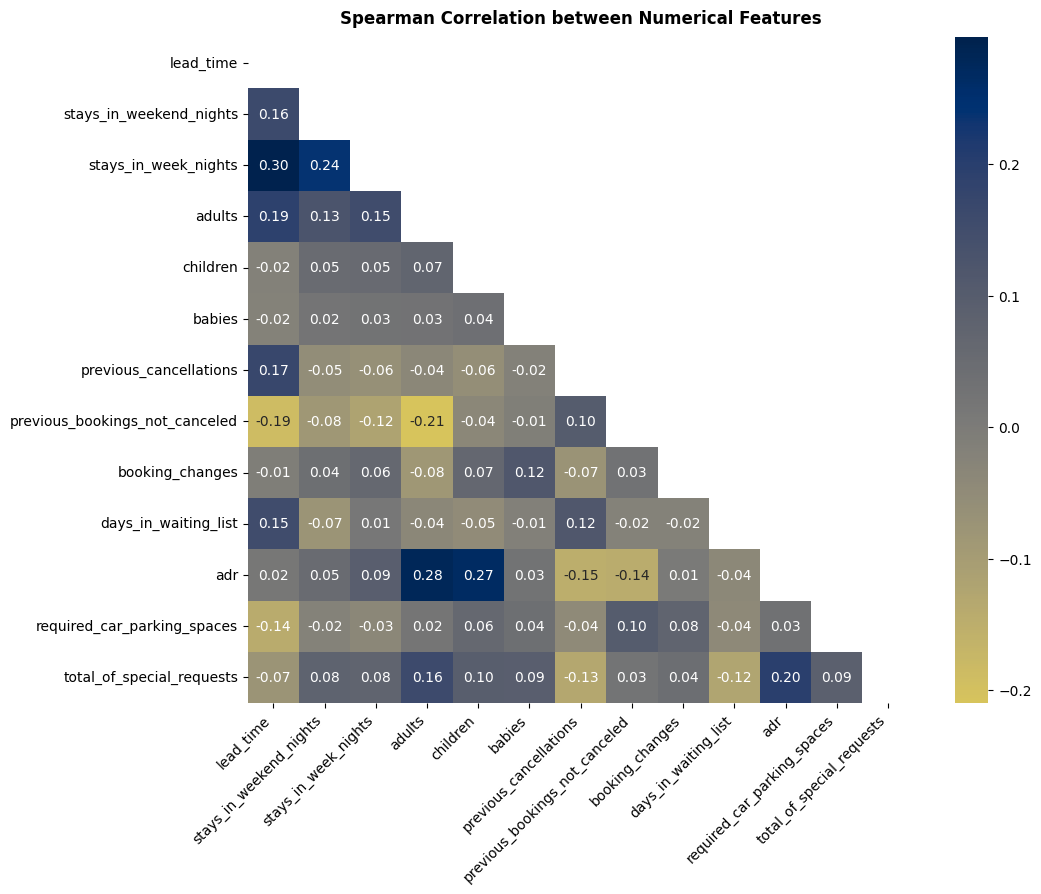

In [10]:
# menghitung korelasi setiap feature numerikal
num_correlation = df[numerical_features].corr(method = "spearman")
matrix = np.triu(num_correlation)
plt.figure(figsize = (11, 11))
ax = sns.heatmap(
    data = num_correlation,
    annot = True,
    fmt = ".2f",
    cmap = "cividis_r",   
    center = 0,
    mask = matrix,
    square = True,
    cbar_kws = {"shrink" : 0.685}
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation = 45,
    horizontalalignment = "right"
)
plt.title("Spearman Correlation between Numerical Features", fontsize = 12, pad = 10, fontweight = "bold")
plt.tight_layout()
plt.show()

Berdasarkan *correlation matrix* di atas, kita dapat melihat bahwa nilai korelasi positif tertinggi terdapat pada hubungan antara kolom `lead_time` dan `stays_in_week_nights`, sedangkan untuk nilai korelasi negatif tertinggi terdapat pada hubungan antara kolom `adults` dan `previous_bookings_not_canceled`. Kita tidak akan berbicara lebih lanjut lagi terkait *correlation matrix* yang disajikan di atas, karena jika kita periksa hubungan antar *feature* numerikal satu dan yang lainnya, terlihat bahwa korelasinya relatif rendah (nilainya berada pada rentang -0,3 hingga 0 hingga 0,3). Hal tersebut mungkin disebabkan oleh variasi yang kompleks dan *non-linear* antar *feature* tersebut, serta sifat unik dari setiap *feature* numerikal yang tidak secara langsung berkorelasi satu sama lain.

### `Data Cardinality (Categorical Features)`

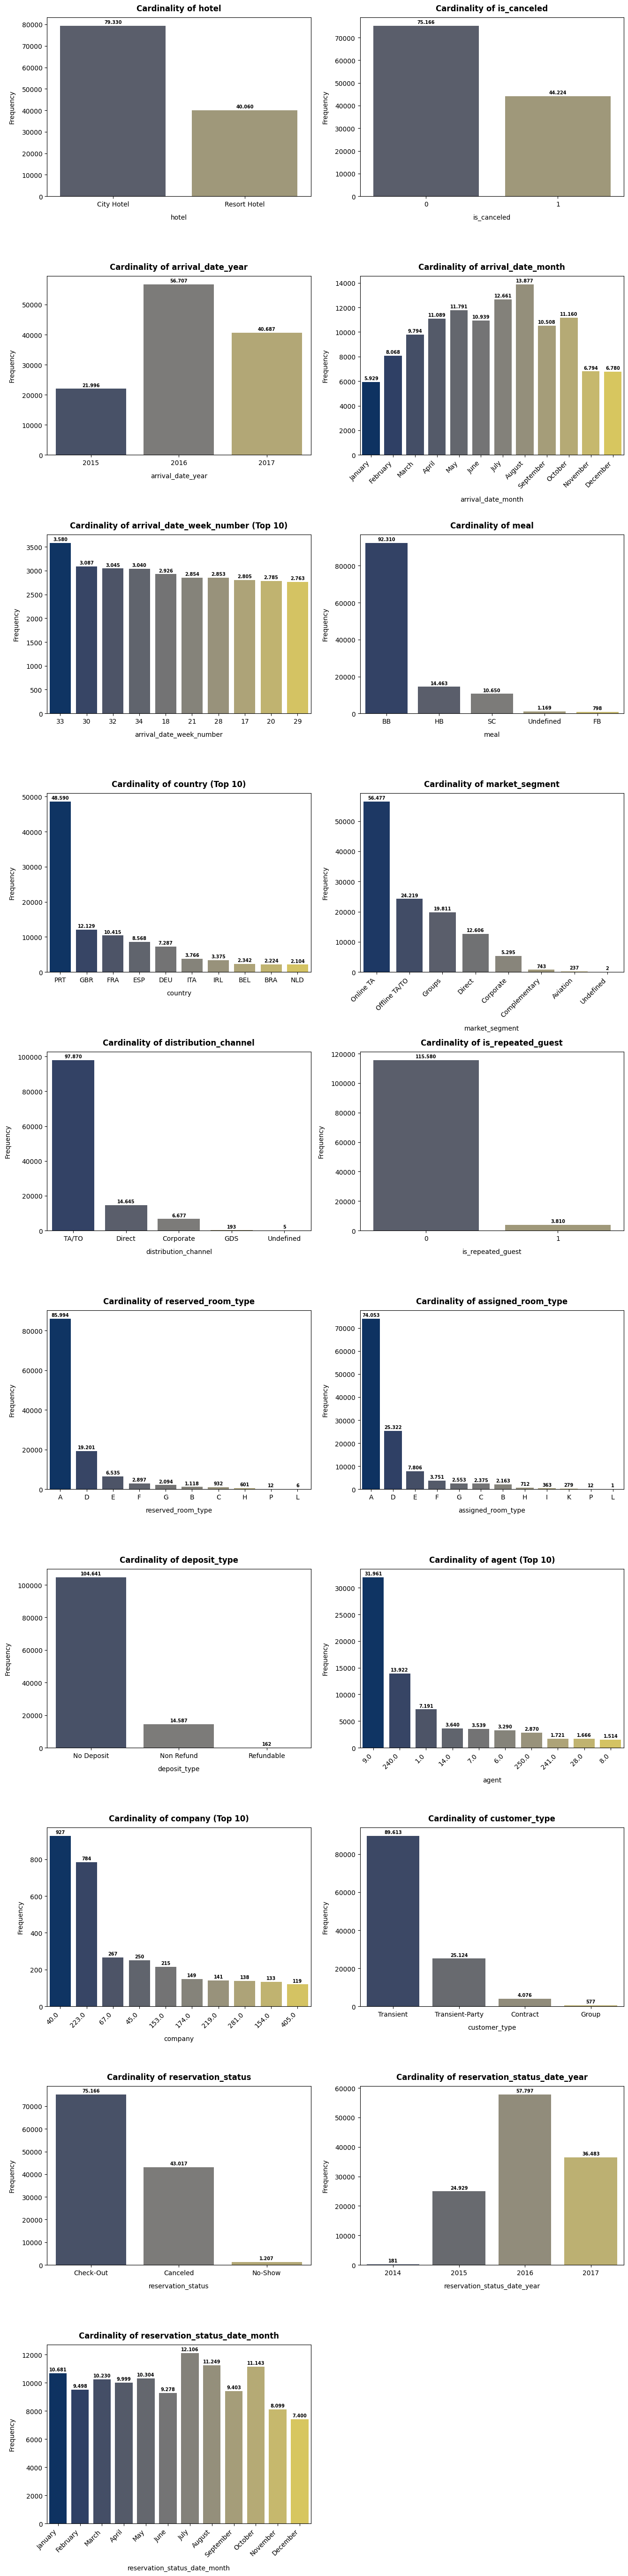

In [11]:
# membuat countplot untuk setiap feature kategorikal
top_ten = [
    "arrival_date_week_number",
    "country",
    "agent",
    "company"
]

unordered_features = [
    "arrival_date_year",
    "arrival_date_month",
    "reservation_status_date_year",
    "reservation_status_date_month"
]

ordered_month = [
    "arrival_date_month",
    "reservation_status_date_month"
]

rotate_labels = [
    "arrival_date_month",
    "market_segment",
    "agent",
    "company",
    "reservation_status_date_month"
]

number_plots = min(len(categorical_features), 20)
fig, ax = plt.subplots(10, 2, figsize = (13.5, 55))
plot_counter = 0
for i in range(10):
    for j in range(2):
        if plot_counter >= number_plots:
            fig.delaxes(ax[i, j])
        else:
            feature = categorical_features[plot_counter]
            if feature in top_ten:
                order = df[feature].value_counts().index[:10]
                title = f"Cardinality of {feature} (Top 10)"
            else:
                if feature in unordered_features:
                    if feature in ordered_month:
                        order = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]
                    else:    
                        order = None
                else:
                    order = df[feature].value_counts().index
                title = f"Cardinality of {feature}"
            sns.countplot(data = df, x = feature, ax = ax[i, j], order = order, palette = "cividis")
            ax[i, j].set_title(title, fontsize = 12, pad = 10, fontweight = "bold")
            if feature in rotate_labels:
                ax[i, j].set_xticklabels(ax[i, j].get_xticklabels(), rotation = 45, horizontalalignment = "right")
                ax[i, j].set_xlabel(feature, labelpad = 10)
            else:
                ax[i, j].set_xlabel(feature, labelpad = 10)
            ax[i, j].set_ylabel("Frequency", labelpad = 10)
            for container in ax[i, j].containers:
                ax[i, j].bar_label(
                    container,
                    labels = [f"{x:,.0f}".replace(",", ".") for x in container.datavalues],
                    label_type = "edge",
                    padding = 2,
                    color = "black",
                    fontweight = "bold",
                    fontsize = 7
                )
        plot_counter += 1
plt.tight_layout()
plt.show()


| Attribute | Insight |
| --- | --- |
| `hotel` | Terlihat pada *dataset* bahwa mayoritas pemesan hotel melakukan pemesanan untuk *City Hotel* (informasi ini dapat diketahui juga saat menampilkan *output* *descriptive statistics* di atas). Hal tersebut sangatlah masuk akal, mengingat lokasi dan aksesibilitas untuk *City Hotel* mudah diakses oleh transportasi umum lantaran lokasinya yang berada di daerah Ibu Kota. |
| `is_canceled` | Mayoritas dari jumlah transaksi yang terjadi di hotel ini berhasil, dengan kata lain bahwa sebagian besar transaksi tidak mengalami pembatalan. Hal tersebut bisa disebabkan oleh fakta bahwa sebagian besar pelanggan telah merencanakan reservasi mereka dengan cukup baik dan matang, sehingga cenderung tidak membatalkan reservasinya. Bukti dari pernyataan tersebut dapat didukung oleh kolom `booking_changes` yang menunjukkan bahwa minimnya perubahan yang terjadi pada data pemesanan hotel. |
| `arrival_date_year` | Terjadinya fluktuasi jumlah pemesanan dari tahun 2015 hingga 2017 yang cenderung meningkat dengan puncak konsumennya yang terjadi pada tahun 2016. Alasan mengapa pada tahun 2016 mencatatkan jumlah pemesanan tertinggi yaitu bisa jadi karena meningkatnya popularitas tujuan wisata di Portugal pada periode tersebut, khususnya untuk kota Lisbon dan Algarve. Selain itu, alasan paling masuk akalnya adalah karena *dataset* ini mencakup pemesanan yang dijadwalkan tiba antara tanggal 1 Juli 2015 dan 31 Agustus 2017, sehingga secara otomatis data pemesanan yang berada di tahun 2016 memiliki kuantitas yang lebih besar dibandingkan data pemesanan di tahun 2015 dan 2017. |
| `arrival_date_month` | Bulan Agustus merupakan bulan yang paling banyak diminati oleh para pelanggan. Hal ini mungkin disebabkan oleh popularitasnya yang tinggi sebagai bulan liburan [musim panas di Portugal](https://www.bookmundi.com/ng/summer-in-portugal-weather-beaches-and-more). Cuaca yang hangat dan cerah di bulan Agustus juga membuatnya menjadi pilihan yang menarik bagi wisatawan dalam negeri dan mancanegara untuk menikmati liburan santai di tempat-tempat wisata seperti pantai, sehingga mereka membutuhkan akomodasi untuk tempat menginap. Selain itu, alasan paling masuk akalnya adalah karena *dataset* ini mencakup pemesanan yang dijadwalkan tiba antara tanggal 1 Juli 2015 dan 31 Agustus 2017, sehingga secara otomatis data pemesanan yang berada di bulan Agustus (dan bulan Juli) memiliki kuantitas yang lebih besar dibandingkan data pemesanan di bulan lainnya. |
| `arrival_date_week_number` | Minggu ke-33 menunjukkan tingginya jumlah pemesan yang dijadwalkan untuk *check-in*. Alasan mengapa minggu ke-33 di setiap tahunnya menjadi minggu dengan jumlah reservasi paling tinggi yaitu karena adanya libur musim panas yang umumnya terjadi pada periode tersebut. Faktanya, [minggu ke-33](https://www.calendar-week.org/calendar-weeks/2016) merupakan minggu yang berada pada bulan Agustus, sehingga wajar jika data tertinggi pada kolom ini hasilnya sesuai dengan data tertinggi yang terdapat pada kolom `arrival_date_month`. Selain itu, alasan paling masuk akalnya adalah karena *dataset* ini mencakup pemesanan yang dijadwalkan tiba antara tanggal 1 Juli 2015 dan 31 Agustus 2017, sehingga secara otomatis data pemesanan yang berada di minggu-minggu pada bulan Agustus (dan bulan Juli) memiliki kuantitas yang lebih besar dibandingkan data pemesanan di minggu-minggu pada bulan lainnya. |
| `meal` | Paket makanan BB atau *Bed and Breakfast* lebih sering dipilih oleh pemesan saat melakukan *booking* hotel dengan asumsi agar mereka tidak perlu mencari sarapan di luar hotel setiap pagi demi menghemat waktu dan tenaga. |
| `country` | Diagram menunjukkan bahwa banyaknya pengunjung hotel berasal dari negara dengan kode PRT atau Portugal. Hal tersebut sangatlah masuk akal karena lokasi hotelnya yang berada di negara Portugal itu sendiri. |
| `market_segment` | Berdasarkan segmentasi pasar yang dibuat oleh pihak hotel, transaksi *booking* terbanyak berasal dari *Online Travel Agent* (OTA). Alasan kuatnya adalah karena OTA menawarkan kemudahan dan kenyamanan bagi pelanggan dalam mencari dan memesan akomodasi secara *online*. OTA juga sering kali menawarkan berbagai pilihan akomodasi dengan harga yang kompetitif, serta fitur perbandingan harga dan ulasan dari pengguna sebelumnya yang membantu pelanggan dalam membuat keputusan yang tepat. Selain itu, kerjasama antara hotel dan OTA dapat meningkatkan visibilitas hotel dan mencapai pangsa pasar yang lebih luas, terutama di kalangan wisatawan yang mencari fleksibilitas dan kemudahan dalam merencanakan perjalanan mereka. |
| `distribution_channel` | Mayoritas saluran distribusi untuk setiap *booking* hotel yang dipilih oleh pelanggan berasal dari *Travel Agent* (TA) atau *Tour Operators* (TO). TA/TO sering memiliki pengetahuan yang luas tentang destinasi wisata dan dapat memberikan saran serta paket liburan yang sesuai dengan kebutuhan pelanggan. Selain itu, mereka juga dapat menawarkan paket-paket yang termasuk akomodasi, transportasi, dan aktivitas wisata dengan harga yang kompetitif. Kerjasama antara hotel dan TA/TO juga dapat memberikan manfaat bagi kedua belah pihak dalam hal pemasaran dan peningkatan penjualan. |
| `is_repeated_guest` | Sekitar 96,8% pemesan berasal dari tamu yang tidak termasuk ke dalam kategori tamu berulang atau *repeated guest*. Alasannya mungkin karena pihak hotel melakukan promosi yang lebih ditujukan untuk menarik banyak tamu baru, program loyalitas, atau bisa saja memang karena popularitasnya sebagai tempat penginapan atau destinasi wisata yang menarik bagi wisatawan baru. Selain itu, beberapa tamu mungkin lebih cenderung mencari pengalaman serta variasi baru dalam akomodasi mereka daripada kembali ke tempat yang sama setiap kali mereka melakukan perjalanan. |
| `reserved_room_type` | Sebagian besar pemesan memilih tipe kamar A (sekitar 72%). Kita asumsikan bahwa tipe kamar ini mungkin menawarkan kenyamanan dan fasilitas yang cukup memadai bagi sebagian besar tamu. Selain itu, tipe kamar A mungkin memiliki harga yang lebih terjangkau atau lebih mudah tersedia dibandingkan dengan tipe kamar lainnya. |
| `assigned_room_type` | Terdapat kesenjangan dan ketidaksesuaian antara tipe kamar yang dipesan dengan tipe kamar yang ditetapkan oleh pihak hotel. Terlihat hanya sekitar 86% pemesanan yang memilih tipe kamar A mendapatkan kamar yang sesuai, dengan kata lain 14% pemesanan sisanya ditetapkan dengan tipe kamar yang berbeda. Kesenjangan tersebut dapat disebabkan oleh berbagai faktor, misalnya seperti ketersediaan kamar, kebijakan hotel, permintaan perubahan dari pelanggan, serta kemungkinan adanya kesalahan sistem atau *human error* (baik dari pelanggan atau pegawai hotel) saat proses reservasi. |
| `deposit_type` | Sebagian besar pelanggan tidak melakukan *deposit* saat memesan hotel. Hal tersebut mungkin di karenakan kebijakan hotel yang memperbolehkan reservasi tanpa *deposit* atau karena kebutuhan fleksibilitas serta kenyamanan pelanggan dalam merencanakan perjalanan. |
| `agent` | Pada diagram yang menampilkan peringkat sepuluh teratas dari *agent* yang pernah melakukan *booking* hotel, *agent* bernomor ID 9 merupakan *agent* dengan jumlah pemesanan hotel terbanyak. |
| `company` | Pada diagram yang menampilkan peringkat sepuluh teratas dari *company* yang pernah melakukan *booking* hotel, *company* bernomor ID 40 merupakan *company* dengan jumlah pemesanan hotel terbanyak. |
| `customer_type` | Tipe pelanggan yang paling umum melakukan pemesanan adalah *Transient*, yang menunjukkan bahwa 75% dari total pelanggan hanya memesan hotel untuk jangka waktu yang singkat. |
| `reservation_status` | Sekitar 62,9% pemesanan hotel tidak dibatalkan atau pemesan berhasil melakukan *check-out*. Hal tersebut telah dipaparkan juga pada *insight* kolom `is_canceled` serta tabel *skimming* di atas. |
| `reservation_status_date_year` | Sebagian besar status pemesanan hotel terjadi di tahun 2016, baik itu pemesanan yang dibatalkan ataupun yang berhasil (pelanggan melakukan *check-in* dan berhasil *check-out*). Alasan paling masuk akalnya adalah karena *dataset* ini mencakup pemesanan yang dijadwalkan tiba antara tanggal 1 Juli 2015 dan 31 Agustus 2017, sehingga secara otomatis data pemesanan yang berada di tahun 2016 memiliki kuantitas yang lebih besar dibandingkan data pemesanan di tahun 2015 dan 2017. |
| `reservation_status_date_month` | Pihak hotel lebih banyak menerima kejelasan terkait setiap pemesanan di bulan Juli, dari mulai reservasi yang berhasil (pelanggan melakukan *check-in* dan berhasil *check-out*) hingga yang dibatalkan oleh pelanggan. Alasan di baliknya yaitu karena *dataset* ini mencakup pemesanan yang dijadwalkan tiba antara tanggal 1 Juli 2015 dan 31 Agustus 2017, sehingga secara otomatis data pemesanan yang berada di bulan Juli (dan bulan Agustus) memiliki kuantitas yang lebih besar dibandingkan data pemesanan di bulan lainnya. |

### `Identify Duplicates`

In [12]:
# menampilkan data duplikat
print(f"Jumlah data duplikat: {df.duplicated().sum()}")

Jumlah data duplikat: 31994


Setelah dilakukan pengecekan, ternyata *dataset* ini mengandung data duplikat sebanyak 31.994 data (informasi ini dapat dilihat pada tabel *skimming* di atas). Semua data duplikat harus di hapus agar tidak terjadi bias atau ketidakakuratan yang dapat mempengaruhi hasil analisis dan interpretasi data, sehingga kita perlu melakukan penanganan terhadap data duplikat tersebut pada tahap *preprocessing*.

### `Identify Missing Value`

children    4     
country     488   
agent       16340 
company     112593
dtype: int64


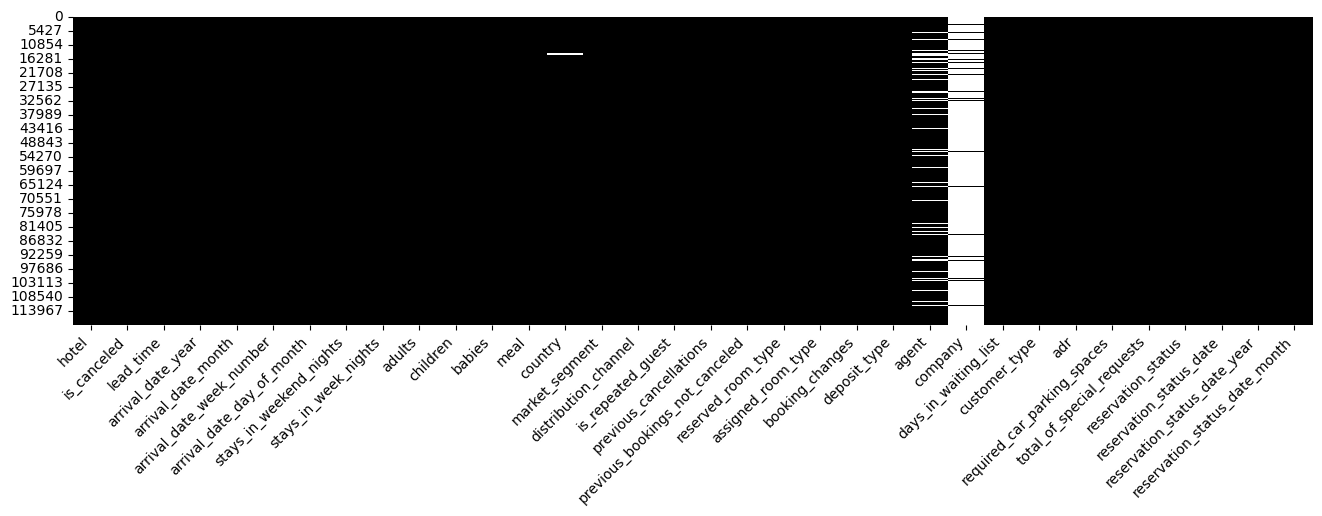

In [13]:
# menampilkan missing value
print(df.isna().sum()[df.isna().sum() > 0])
plt.figure(figsize = (16, 4))
ax = sns.heatmap(data = df.isna(), cmap = "bone", cbar = False)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation = 45,
    horizontalalignment = "right"
)
plt.show()

Secara garis besar, *dataset* ini memiliki *missing value* pada kolom `children` (0,003%), `country` (0,4%), `agent` (13,6%), dan `company` (94,3%), sehingga kita perlu melakukan penanganan terhadap *missing value*-nya pada tahap *preprocessing* (informasi ini dapat dilihat pada tabel *skimming* di atas). Hal tersebut dapat terlihat sangat jelas ketika menampilkan *output* pertama yang menunjukkan masing-masing jumlah dari *missing value*-nya, serta pada *output* kedua yang memperlihatkan garis putih penanda adanya *missing value*, walaupun pada kolom `children` tidak terlihat adanya garis putih tersebut (asumsi: di karenakan jumlah *missing value* nya yang hanya 4 baris).

## **PREPROCESSING**

### `Remove Data Duplication`

In [14]:
# menghapus data duplikat
df = df.drop_duplicates().reset_index(drop = True)
if df.duplicated().sum() == 0:
    print(colored(f"Data duplikat berhasil dihapus!\n", "green"))
    #print(f"Data duplikat berhasil dihapus.\n")
    print(f"Jumlah keseluruhan data sebelumnya: {len(df_source)}")
    print(f"Jumlah keseluruhan data sekarang: {len(df)}")
else:
    print(colored(f"Data duplikat BELUM berhasil dihapus!", "red"))

Data duplikat berhasil dihapus!

Jumlah keseluruhan data sebelumnya: 119390
Jumlah keseluruhan data sekarang: 87396


### `Fill Missing Value & Casting Data Type`

Sebelum melakukan penanganan terhadap *missing value*, mari kita lihat terlebih dahulu apakah ada korelasi nulitas antar *feature* yang memiliki *missing value*.

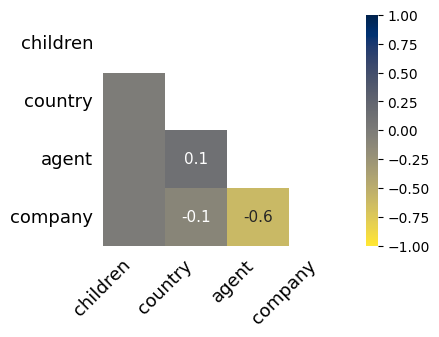

In [15]:
# menampilkan korelasi nulitas antar feature yang memiliki missing value
msno.heatmap(df = df, cmap = "cividis_r", figsize = (4, 3), fontsize = 13)
plt.show()

*Output* di atas merupakan *heatmap* yang menunjukkan korelasi nulitas antar *feature* yang memiliki *missing value*. Korelasi nulitas berkisar dari -1 (jika suatu variabel muncul, maka variabel lainnya pasti tidak muncul) hingga 0 (variabel yang muncul atau tidak muncul sama sekali tidak berpengaruh satu sama lain) hingga 1 (jika suatu variabel muncul, maka variabel lainnya pasti muncul).

Terlihat bahwa rata-rata *missing values* antar *feature* itu hampir tidak berkorelasi atau tidak berpengaruh satu sama lain, dan jika ada pun nilainya hanya 0,1 dan -0,1 yang berarti korelasi nulitasnya sangat rendah. Berbeda halnya dengan kolom `company` dan `agent` yang memiliki korelasi nulitasnya *moderate* dengan nilai -0,6 yang mengartikan jika baris pada kolom `company` berisi data, maka rata-rata baris pada kolom `agent` tidak berisi data atau NaN, dan begitu pula sebaliknya. Hal tersebut dapat didukung oleh *heatmap* yang ditampilkan saat melakukan pengecekan terhadap *missing value* di atas, di mana ketika warna baris pada kolom `company` bergaris hitam, maka warna baris pada kolom `agent` berwarna putih.

Kedua kolom tersebut perlu di-*breakdown* lebih lanjut sebelum dilakukan penanganan terhadap keduanya, dan jika terbukti bahwa kolom `company` dan `agent` saling melengkapi, maka kita akan menyatukan keduanya agar dapat mempermudah proses analisis.

**Penanganan *missing value* pada kolom `children` serta mengubah tipe datanya**

In [16]:
# menampilkan data yang memiliki missing value pada kolom children
display(df[df["children"].isna()])
print(f"Jumlah missing value setelah menghapus data duplikat: {len(df[df['children'].isna()])}")

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,reservation_status_date_year,reservation_status_date_month
34241,City Hotel,1,2,2015,August,32,3,1,0,2,NaN,0,BB,PRT,Undefined,Undefined,0,0,0,B,B,0,No Deposit,NaN,NaN,0,Transient-Party,12.0,0,1,Canceled,2015-08-01,2015,August
34274,City Hotel,1,1,2015,August,32,5,0,2,2,NaN,0,BB,PRT,Direct,Undefined,0,0,0,B,B,0,No Deposit,14.0,NaN,0,Transient-Party,12.0,0,1,Canceled,2015-08-04,2015,August
34278,City Hotel,1,1,2015,August,32,5,0,2,3,NaN,0,BB,PRT,Undefined,Undefined,0,0,0,B,B,0,No Deposit,NaN,NaN,0,Transient-Party,18.0,0,2,Canceled,2015-08-04,2015,August
34586,City Hotel,1,8,2015,August,33,13,2,5,2,NaN,0,BB,PRT,Online TA,Undefined,0,0,0,B,B,0,No Deposit,9.0,NaN,0,Transient-Party,76.5,0,1,Canceled,2015-08-09,2015,August


Jumlah missing value setelah menghapus data duplikat: 4


Untuk penanganan *missing value* pada kolom `children`, kita asumsikan bahwa **pemesan tidak mengisi informasi terkait jumlah anak-anak yang akan ikut *check in* karena memang tidak ada anak-anak yang akan dibawa oleh pemesan**, dengan kata lain data *booking* hotel di atas seharusnya memiliki nilai 0 pada kolom `children`. Maka dari itu, kita akan *assign* nilai **0** pada keempat *missing value* tersebut. Setelah melakukan pengisian *missing value*, kita akan mengubah tipe data pada kolom `children`, mengingat ketika kita mempelajari *dataset* di atas, kolom tersebut masih bertipe data *float* (seharusnya bertipe data *integer*), sehingga kita perlu mengubahnya pada proses ini.

In [17]:
# mengisi nilai 0 pada kolom children yang bernilai NaN
df["children"] = df["children"].fillna(0)

# mengubah tipe data children menjadi integer
df["children"] = df["children"].astype(int)

**Penanganan *missing value* pada kolom `country`**

In [18]:
# menampilkan data yang memiliki missing value pada kolom country
display(df[df["country"].isna()])
print(f"Jumlah missing value setelah menghapus data duplikat: {len(df[df['country'].isna()])}")

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,reservation_status_date_year,reservation_status_date_month
28,Resort Hotel,0,118,2015,July,27,1,4,10,1,0,0,BB,NaN,Direct,Direct,0,0,0,A,A,2,No Deposit,NaN,NaN,0,Transient,62.0,0,2,Check-Out,2015-07-15,2015,July
3325,Resort Hotel,1,0,2016,February,8,15,0,0,0,0,0,SC,NaN,Offline TA/TO,TA/TO,0,0,0,P,P,0,No Deposit,NaN,383.0,0,Transient,0.0,0,0,Canceled,2016-02-15,2016,February
5283,Resort Hotel,1,8,2016,July,30,21,0,1,1,0,0,BB,NaN,Corporate,Corporate,0,0,0,A,A,0,No Deposit,NaN,204.0,0,Transient,73.0,0,2,Canceled,2016-07-20,2016,July
5985,Resort Hotel,1,39,2016,August,36,30,0,5,2,0,0,HB,NaN,Direct,Direct,0,0,0,A,A,0,No Deposit,NaN,NaN,0,Transient,159.0,0,5,Canceled,2016-07-22,2016,July
6611,Resort Hotel,1,0,2016,October,42,13,0,1,1,0,0,BB,NaN,Corporate,Corporate,0,0,0,A,A,0,No Deposit,NaN,457.0,0,Transient,50.0,0,0,Canceled,2016-10-13,2016,October
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44944,City Hotel,1,0,2016,November,47,17,4,11,0,0,0,SC,NaN,Corporate,Direct,0,0,0,P,P,0,No Deposit,NaN,279.0,0,Transient,0.0,0,0,Canceled,2016-11-17,2016,November
45354,City Hotel,1,0,2016,December,50,6,0,0,0,0,0,SC,NaN,Complementary,Corporate,0,0,0,P,P,0,No Deposit,NaN,279.0,0,Transient,0.0,0,0,Canceled,2016-12-06,2016,December
48091,City Hotel,1,0,2017,April,15,10,0,0,0,0,0,SC,NaN,Complementary,Corporate,0,0,0,P,P,0,No Deposit,NaN,279.0,0,Transient,0.0,0,0,Canceled,2017-04-10,2017,April
55841,City Hotel,0,4,2015,November,48,23,1,2,1,0,0,BB,NaN,Groups,TA/TO,0,0,0,A,A,0,No Deposit,37.0,NaN,0,Transient-Party,70.0,0,0,Check-Out,2015-11-26,2015,November


Jumlah missing value setelah menghapus data duplikat: 452


Sama halnya dengan kolom `children`, penanganan *missing value* pada kolom `country` juga kita asumsikan bahwa **pemesan tidak ingin menginputkan informasi terkait asal negara mereka karena alasan privasi & keamanan, kelalaian saat menginputkan data diri, atau mungkin beberapa *platform* pemesanan hotel tidak meminta informasi terkait negara (data opsional)**. Dengan kata lain, data *booking* hotel di atas seharusnya memiliki data terkait negara di setiap pemesannya. Permasalahannya, kita tidak tahu dari negara mana pemesan itu berasal, sehingga kita memutuskan untuk men-*assign* nilai ***UNKNOWN*** pada seluruh *missing value* tersebut.

In [19]:
# mengisi nilai UNKNOWN pada kolom country yang bernilai NaN
df["country"] = df["country"].fillna("UNKNOWN")

**Penanganan *missing value* pada kolom `agent` dan `company` serta mengubah kedua tipe datanya**

In [20]:
# menampilkan data yang memiliki missing value pada kolom agent
display(df[df["agent"].isna()])
print(f"Jumlah missing value setelah menghapus data duplikat: {len(df[df['agent'].isna()])}\n")

# menampilkan data yang memiliki missing value pada kolom company
display(df[df["company"].isna()])
print(f"Jumlah missing value setelah menghapus data duplikat: {len(df[df['company'].isna()])}")

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,reservation_status_date_year,reservation_status_date_month
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01,2015,July
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01,2015,July
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02,2015,July
5,Resort Hotel,0,0,2015,July,27,1,0,2,2,0,0,BB,PRT,Direct,Direct,0,0,0,C,C,0,No Deposit,NaN,NaN,0,Transient,107.00,0,0,Check-Out,2015-07-03,2015,July
17,Resort Hotel,0,0,2015,July,27,1,0,1,2,0,0,BB,FRA,Corporate,Corporate,0,0,0,A,G,0,No Deposit,NaN,110.0,0,Transient,107.42,0,0,Check-Out,2015-07-02,2015,July
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87200,City Hotel,0,0,2017,August,35,29,0,1,1,0,0,BB,PRT,Complementary,Corporate,0,0,0,A,A,0,No Deposit,NaN,72.0,0,Transient,0.00,0,2,Check-Out,2017-08-30,2017,August
87225,City Hotel,0,0,2017,August,35,29,0,1,2,2,0,BB,NLD,Direct,Direct,0,0,0,G,G,0,No Deposit,NaN,NaN,0,Transient,270.00,0,0,Check-Out,2017-08-30,2017,August
87240,City Hotel,0,0,2017,August,35,30,0,1,1,0,0,BB,BRA,Direct,Direct,0,0,0,A,A,0,No Deposit,NaN,NaN,0,Transient,140.00,0,0,Check-Out,2017-08-31,2017,August
87259,City Hotel,0,2,2017,August,35,31,0,1,1,0,0,SC,LBN,Direct,Direct,0,0,0,A,A,0,No Deposit,NaN,NaN,0,Transient,140.00,0,2,Check-Out,2017-09-01,2017,September


Jumlah missing value setelah menghapus data duplikat: 12193



,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,reservation_status_date_year,reservation_status_date_month
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01,2015,July
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01,2015,July
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02,2015,July
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02,2015,July
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,2015-07-03,2015,July
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87391,City Hotel,0,23,2017,August,35,30,2,5,2,0,0,BB,BEL,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06,2017,September
87392,City Hotel,0,102,2017,August,35,31,2,5,3,0,0,BB,FRA,Online TA,TA/TO,0,0,0,E,E,0,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07,2017,September
87393,City Hotel,0,34,2017,August,35,31,2,5,2,0,0,BB,DEU,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07,2017,September
87394,City Hotel,0,109,2017,August,35,31,2,5,2,0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07,2017,September


Jumlah missing value setelah menghapus data duplikat: 82137


Seperti yang telah kita ketahui saat melihat korelasi antar *missing values* di atas, kedua kolom tersebut memiliki korelasi nulitas *moderate* dengan nilai -0,6 yang mengartikan bahwa ketika kolom `company` terdapat data, maka kolom `agent` tidak terdapat data, begitupun juga sebaliknya. Namun setelah kita selidiki, ternyata ada 2 kondisi baru di mana **ketika kolom `company` terdapat data, maka kolom `agent` pun terdapat data** dan **ketika kolom `company` tidak terdapat data, maka kolom `agent` pun tidak terdapat data** . Hal tersebut membuat kedua kolom ini memiliki total 4 kondisi yang akan kita asumsikan sebagai berikut:

- Ketika kolom `company` terdapat data, maka kolom `agent` tidak terdapat data (asumsi: perusahaan X atau orang yang mewakilkan perusahaan X memesan hotel tidak melalui *travel agent*).
- Ketika kolom `agent` terdapat data, maka kolom `company` tidak terdapat data (asumsi: seseorang memesan hotel melalui *travel agent*).
- Ketika kolom `company` terdapat data, maka kolom `agent` pun terdapat data (asumsi: perusahaan Y atau orang yang mewakilkan perusahaan Y memesan hotel melalui *travel agent*).
- Ketika kolom `company` tidak terdapat data, maka kolom `agent` pun tidak terdapat data (asumsi: seseorang memesan hotel tidak melalui *travel agent*).

Dari keempat kondisi yang ada, kita memutuskan untuk men-*assign* nilai ***UNKNOWN*** pada seluruh *missing value* di kedua kolom `agent` dan `company`. Selain itu, kita akan menambahkan alfabet **AG** untuk data yang memiliki ID pada kolom `agent` dan alfabet **CO** untuk data yang memiliki ID pada kolom `company`.

Sebelum itu, kita perlu mengubah tipe data kedua *feature* tersebut menjadi *integer* (untuk menghilangkan koma, karena sebelumnya bertipe data *float*). Masalahnya untuk mengubah tipe data menjadi *integer*, kita perlu mengisi terlebih dahulu *missing value* yang ada, sehingga kita putuskan men-*assign* nilai **0** untuk sementara. Setelah proses tersebut, barulah kita ubah lagi tipe datanya menjadi *string* dan mengganti nilai **0** menjadi ***UNKNOWN***.

In [21]:
# proses mengubah tipe data agent dan company menjadi integer, dan mengubahnya lagi menjadi string

# agent
df["agent"] = df["agent"].fillna(0)
df["agent"] = df["agent"].astype(int)
df["agent"] = df["agent"].astype(str)

# company
df["company"] = df["company"].fillna(0)
df["company"] = df["company"].astype(int)
df["company"] = df["company"].astype(str)

# mengisi nilai UNKNOWN pada kolom agent dan company yang bernilai NaN
df = df.replace({"agent" : {"0" : "UNKNOWN"}, "company" : {"0" : "UNKNOWN"}})

In [22]:
# menambahkan alfabet AG untuk kolom agent dan CO untuk kolom company
def new_agent_id(id):
    if id == "UNKNOWN":
        return id    
    else:
        return "AG-" + id

def new_company_id(id):
    if id == "UNKNOWN":
        return id
    else:
        return "CO-" + id

df["agent"] = df["agent"].apply(new_agent_id)
df["company"] = df["company"].apply(new_company_id)

**Mengubah tipe data kolom `reservation_status_date`**

Untuk keperluan analisis, kita akan mengubah tipe data pada kolom `reservation_status_date`, meskipun akhirnya kolom ini tidak akan digunakan saat *modeling* karena datanya yang muncul setelah pemesanan hotel dibatalkan ataupun tidak dibatalkan.

In [23]:
# mengubah tipe data kolom reservation_status_date menjadi datetime
df["reservation_status_date"] = pd.to_datetime(df["reservation_status_date"])

### `Replace Inconsistent Variable`

**Mengganti variabel pada kolom `meal`**

Nama kategori pada kolom ini hanya ditulis dengan singkatan, yang mana dapat membingungkan *audience* ketika mendengarkan kita saat memaparkan hasil analisis. Maka dari itu, kita putuskan untuk mengganti semua nama kategorinya dengan menyesuaikan nama-nama yang ada pada laman [ini](https://www.arbat-house.com/en/articles/types-of-food-in-hotels/), sekaligus juga mengganti kategori ***Undefined*** menjadi **SC** di karenakan kedua kategori tersebut memiliki makna yang sama, yaitu 'tidak memesan makanan'.

In [24]:
# mengganti Undefined menjadi SC
df["meal"] = df["meal"].replace("Undefined", "SC")

# mengganti semua nama kategori
df = df.replace({"meal" : {"BB" : "Bed and Breakfast", "HB" : "Half Board", "FB" : "Full Board", "SC" : "Self Catering"}})

**Mengganti variabel pada kolom `market_segment`**

Terdapat nama kategori yang juga ditulis dengan singkatan pada kolom ini, yaitu ***Online TA*** dan ***Offline TA/TO***. Kedua kategori tersebut akan kita ubah menjadi ***Online Travel Agent*** untuk kategori ***Online TA***, serta ***Offline Travel Agent/Tour Operators*** untuk kategori ***Offline TA/TO***.

In [25]:
# mengganti nama kategori Online TA dan Offline TA/TO
df = df.replace({"market_segment" : {"Online TA" : "Online Travel Agent", "Offline TA/TO" : "Offline Travel Agent/Tour Operators"}})

Selain itu, kita akan mencoba untuk mengubah nilai ***Undefined*** menjadi nilai yang disesuaikan dengan identitas atau saluran distribusi dari pemesan hotel pada data tersebut.

In [26]:
# menampilkan nilai Undefined pada kolom market_segment
df[df["market_segment"] == "Undefined"]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,reservation_status_date_year,reservation_status_date_month
34241,City Hotel,1,2,2015,August,32,3,1,0,2,0,0,Bed and Breakfast,PRT,Undefined,Undefined,0,0,0,B,B,0,No Deposit,UNKNOWN,UNKNOWN,0,Transient-Party,12.0,0,1,Canceled,2015-08-01,2015,August
34278,City Hotel,1,1,2015,August,32,5,0,2,3,0,0,Bed and Breakfast,PRT,Undefined,Undefined,0,0,0,B,B,0,No Deposit,UNKNOWN,UNKNOWN,0,Transient-Party,18.0,0,2,Canceled,2015-08-04,2015,August


Di karenakan tidak ada identitas pemesan atau saluran distribusi yang terkait dengan reservasi di atas, maka kita putuskan untuk menghapus kedua data tersebut.

In [27]:
# menghapus data dengan nilai Undefined pada kolom market_segment
drop_data_market_segment = df[df["market_segment"] == "Undefined"].index
df = df.drop(drop_data_market_segment)

**Mengganti variabel pada kolom `distribution_channel`**

Sama halnya dengan kolom `market_segment`, kategori **TA/TO** pada kolom ini pun juga ditulis dengan singkatan dan terdapat kategori lain yang sama-sama ditulis menggunakan singkatan juga, yaitu **GDS**. Maka dari itu, kita akan ubah nama kategorinya menjadi ***Travel Agent/Tour Operators*** untuk kategori **TA/TO**, serta ***Global Distribution System*** untuk kategori **GDS**.

In [28]:
# mengganti nama kategori TA/TO dan GDS
df = df.replace({"distribution_channel" : {"TA/TO" : "Travel Agent/Tour Operators", "GDS" : "Global Distribution System"}})

Selain itu, kita juga akan mencoba untuk mengubah nilai ***Undefined*** pada kolom ini menjadi nilai yang disesuaikan dengan identitas atau segmen pasar dari pemesan hotel pada data tersebut.

In [29]:
# menampilkan nilai Undefined pada kolom distribution_channel
df[df["distribution_channel"] == "Undefined"]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,reservation_status_date_year,reservation_status_date_month
11380,Resort Hotel,0,103,2015,July,28,5,2,3,2,1,0,Half Board,PRT,Direct,Undefined,0,0,0,A,A,0,No Deposit,UNKNOWN,UNKNOWN,0,Transient,112.7,1,2,Check-Out,2015-07-10,2015,July
34274,City Hotel,1,1,2015,August,32,5,0,2,2,0,0,Bed and Breakfast,PRT,Direct,Undefined,0,0,0,B,B,0,No Deposit,AG-14,UNKNOWN,0,Transient-Party,12.0,0,1,Canceled,2015-08-04,2015,August
34586,City Hotel,1,8,2015,August,33,13,2,5,2,0,0,Bed and Breakfast,PRT,Online Travel Agent,Undefined,0,0,0,B,B,0,No Deposit,AG-9,UNKNOWN,0,Transient-Party,76.5,0,1,Canceled,2015-08-09,2015,August


Setelah dilakukan pengecekan, ternyata ketiga data di atas memiliki indentitas atau segmen pasar yang bisa kita kaji lebih lanjut untuk menyesuaikan nilai ***Undefined*** pada kolom ini.
1. Untuk data pada baris ke-1, kita bisa mengetahui bahwa data pemesan tidak memiliki ID `agent` dan `company`, serta pihak hotel melabeli `market_segment` pada reservasi tersebut sebagai ***Direct***. Maka dari itu, kita akan menyesuaikan nilainya dengan kondisi yang telah kita ketahui  di atas.
2. Untuk data pada baris ke-2, kita bisa mengetahui bahwa data pemesan hanya memiliki ID `agent` **AG-14**, serta pihak hotel melabeli `market_segment` pada reservasi tersebut sebagai ***Direct***. Maka dari itu, kita akan menyesuaikan nilainya dengan kondisi yang telah kita ketahui  di atas.
3. Untuk data pada baris ke-3, kita bisa mengetahui bahwa data pemesan hanya memiliki ID `agent` **AG-9**, serta pihak hotel melabeli `market_segment` pada reservasi tersebut sebagai ***Online Travel Agent***. Maka dari itu, kita akan menyesuaikan nilainya dengan kondisi yang telah kita ketahui  di atas.

In [30]:
# mencari tahu nilai modus (mode) untuk kondisi data baris ke-1
print(f"Nilai modus untuk kondisi data baris ke-1 adalah {df[(df['agent'] == 'UNKNOWN') & (df['company'] == 'UNKNOWN') & (df['market_segment'] == 'Direct')]['distribution_channel'].mode()[0]}")

Nilai modus untuk kondisi data baris ke-1 adalah Direct


In [31]:
# mencari tahu nilai modus (mode) untuk kondisi data baris ke-2
print(f"Nilai modus untuk kondisi data baris ke-2 adalah {df[(df['agent'] == 'AG-14') & (df['company'] == 'UNKNOWN') & (df['market_segment'] == 'Direct')]['distribution_channel'].mode()[0]}")

Nilai modus untuk kondisi data baris ke-2 adalah Direct


In [32]:
# mencari tahu nilai modus (mode) untuk kondisi data baris ke-3
print(f"Nilai modus untuk kondisi data baris ke-3 adalah {df[(df['agent'] == 'AG-9') & (df['company'] == 'UNKNOWN') & (df['market_segment'] == 'Online Travel Agent')]['distribution_channel'].mode()[0]}")

Nilai modus untuk kondisi data baris ke-3 adalah Travel Agent/Tour Operators


Berdasarkan ketiga *output* tersebut, kita akan mengganti nilai ***Undefined*** pada kolom `distribution_channel` menjadi masing-masing nilai modus di atas.

In [33]:
# mengganti data dengan nilai Undefined pada kolom distribution_market
df.at[df.loc[df[df["distribution_channel"] == "Undefined"].index[2]].name, "distribution_channel"] = "Travel Agent/Tour Operators"
df["distribution_channel"] = df["distribution_channel"].replace("Undefined", "Direct")

### `Adding New Feature`

Selain mengganti variabel-variabel di atas, kita juga akan menambahkan 2 *feature* baru yang akan diproyeksikan untuk kebutuhan analisis. *Feature* tersebut di antaranya yaitu:

- `arrival_date`: Tujuan dibuatnya kolom ini yaitu untuk menampilkan *trend* atau pola dari waktu ke waktu terkait jadwal *check-in* hotel pelanggan. Seperti yang telah diketahui, keterangan terkait jadwal *check-in* hotel telah tersedia pada *dataset* ini. Masalahnya, jadwal tersebut dibagi ke dalam 3 *feature* yang masing-masing berisi tahun, bulan, dan tanggal dari jadwal *check-in*, sehingga kita perlu untuk membuat *feature* baru bertipe data *datetime* yang bisa menampung ketiga informasi tersebut agar dapat mempermudah proses analisis.
- `visitor`: Kolom ini berfungsi untuk menghitung jumlah orang yang terdapat dalam satu reservasi, termasuk orang dewasa, anak-anak, dan juga bayi. Jika suatu reservasi menunjukkan tidak adanya pengunjung (nilai pada kolom `visitor` adalah 0), maka kita putuskan untuk menghapus data tersebut dikarenakan tidak relevan untuk dianalisis.

**Menambahkan kolom `arrival_date`**

In [34]:
# membuat kolom arrival_date
def arrival_month(date):
    if "January" in date:
        return date.replace("January", "01")
    elif "February" in date:
        return date.replace("February", "02")
    elif "March" in date:
        return date.replace("March", "03")
    elif "April" in date:
        return date.replace("April", "04")
    elif "May" in date:
        return date.replace("May", "05")
    elif "June" in date:
        return date.replace("June", "06")
    elif "July" in date:
        return date.replace("July", "07")
    elif "August" in date:
        return date.replace("August", "08")
    elif "September" in date:
        return date.replace("September", "09")
    elif "October" in date:
        return date.replace("October", "10")
    elif "November" in date:
        return date.replace("November", "11")
    elif "December" in date:
        return date.replace("December", "12")

df["arrival_date"] = df["arrival_date_year"].map(str) + "-" + df["arrival_date_month"].map(str) + "-" + df["arrival_date_day_of_month"].map(str)
df["arrival_date"] = df["arrival_date"].apply(arrival_month)
df["arrival_date"] = pd.to_datetime(df["arrival_date"])

**Menambahkan kolom `visitor`**

In [35]:
# membuat kolom visitor
df["visitor"] = df["adults"] + df["children"] + df["babies"]

### `Handling Outlier`

In [36]:
# menampilkan proporsi outlier secara detail pada feature numerikal (setelah dilakukan penanganan terhadap duplikat)
list_lower = []
list_upper = []
number_lower = []
number_inside = []
number_upper = []
percentage_outlier = []

for feature in numerical_features:
    IQR = df[feature].quantile(0.75) - df[feature].quantile(0.25)
    lower_fence = df[feature].quantile(0.25) - 1.5 * IQR
    upper_fence = df[feature].quantile(0.75) + 1.5 * IQR
    list_lower.append(lower_fence)
    list_upper.append(upper_fence)
    number_lower.append(len(df[df[feature] < lower_fence]))
    number_inside.append(len(df[(df[feature] >= lower_fence) & (df[feature] <= upper_fence)]))
    number_upper.append(len(df[df[feature] > upper_fence]))
    percentage_outlier.append(round((len(df[df[feature] < lower_fence]) + len(df[df[feature] > upper_fence])) / len(df) * 100, 2))

outliers = pd.DataFrame({
    "Attribute (Numerical Features)" : numerical_features,
    "Lower Fence" : list_lower,
    "Upper Fence" : list_upper,
    "# Lower" : number_lower,
    "# Inside" : number_inside,
    "# Upper" : number_upper,
    "% Outlier" : percentage_outlier
})

outliers

,Attribute (Numerical Features),Lower Fence,Upper Fence,# Lower,# Inside,# Upper,% Outlier
0,lead_time,-160.0,296.0,0,84998,2396,2.74
1,stays_in_weekend_nights,-3.0,5.0,0,87174,220,0.25
2,stays_in_week_nights,-3.5,8.5,0,85863,1531,1.75
3,adults,2.0,2.0,16888,64496,6010,26.20
4,children,0.0,0.0,0,79030,8364,9.57
5,babies,0.0,0.0,0,86480,914,1.05
6,previous_cancellations,0.0,0.0,0,85709,1685,1.93
7,previous_bookings_not_canceled,0.0,0.0,0,83849,3545,4.06
8,booking_changes,0.0,0.0,0,71492,15902,18.20
9,days_in_waiting_list,0.0,0.0,0,86534,860,0.98


Seperti yang telah kita ketahui saat menampilkan visualisasi distribusi data , *feature* numerikal pada *dataset* ini memiliki begitu banyak *outlier*. Dari tabel di atas, kita bisa mengetahui seberapa banyak *outlier* yang terdapat pada *feature* numerikal beserta dengan persentasenya, baik itu *outlier* yang melebihi *lower fence* ataupun *upper fence*. Untuk memutuskan *outlier* mana yang pantas dipertahankan atau dihapus, kita perlu cek terlebih dahulu proporsi dari setiap *outlier* yang ada terhadap *target*.

**Proporsi *target* setelah melalui beberapa tahap *preprocessing***

In [37]:
# menghitung proporsi target
round(df["is_canceled"].value_counts() / len(df) * 100, 2)

is_canceled
0    72.51
1    27.49
Name: count, dtype: float64

 Kita sudah mengetahui bahwa mayoritas pemesanan hotel pada *dataset* ini didominasi oleh reservasi yang tidak dibatalkan atau tidak di-*cancel* dengan persentasenya sebesar 72,51%, sedangkan untuk pemesanan yang dibatalkan yaitu sebesar 27,49%. Artinya, terdapat kondisi di mana *label* atau *target* pada *dataset* ini mengalami [*imbalanced data*](https://developers.google.com/machine-learning/data-prep/construct/sampling-splitting/imbalanced-data) yang tergolong **mild**. Sekarang, mari kita lihat proporsi data yang menjadi *outlier* di setiap *feature* numerikal.

**Proporsi *outlier* pada kolom `lead_time` terhadap *target***

In [38]:
round(df[df["lead_time"] > 296]["is_canceled"].value_counts() / len(df) * 100, 2)

is_canceled
0    1.48
1    1.26
Name: count, dtype: float64

**Proporsi *outlier* pada kolom `stays_in_weekend_nights` terhadap *target***

In [39]:
round(df[df["stays_in_weekend_nights"] > 5]["is_canceled"].value_counts() / len(df) * 100, 2)

is_canceled
1    0.13
0    0.12
Name: count, dtype: float64

**Proporsi *outlier* pada kolom `stays_in_week_nights` terhadap *target***

In [40]:
round(df[df["stays_in_week_nights"] > 8.5]["is_canceled"].value_counts() / len(df) * 100, 2)

is_canceled
0    1.15
1    0.60
Name: count, dtype: float64

**Proporsi *outlier* pada kolom `adults` terhadap *target***

In [41]:
round(df[df["adults"] != 2]["is_canceled"].value_counts() / len(df) * 100, 2)

is_canceled
0    20.06
1    6.14 
Name: count, dtype: float64

**Proporsi *outlier* pada kolom `children` terhadap *target***

In [42]:
round(df[df["children"] > 0]["is_canceled"].value_counts() / len(df) * 100, 2)

is_canceled
0    6.15
1    3.42
Name: count, dtype: float64

**Proporsi *outlier* pada kolom `babies` terhadap *target***

In [43]:
round(df[df["babies"] > 0]["is_canceled"].value_counts() / len(df) * 100, 2)

is_canceled
0    0.85
1    0.19
Name: count, dtype: float64

**Proporsi *outlier* pada kolom `previous_cancellations` terhadap *target***

In [44]:
round(df[df["previous_cancellations"] > 0]["is_canceled"].value_counts() / len(df) * 100, 2)

is_canceled
1    1.31
0    0.62
Name: count, dtype: float64

**Proporsi *outlier* pada kolom `previous_bookings_not_canceled` terhadap *target***

In [45]:
round(df[df["previous_bookings_not_canceled"] > 0]["is_canceled"].value_counts() / len(df) * 100, 2)

is_canceled
0    3.85
1    0.20
Name: count, dtype: float64

**Proporsi *outlier* pada kolom `booking_changes` terhadap *target***

In [46]:
round(df[df["booking_changes"] > 0]["is_canceled"].value_counts() / len(df) * 100, 2)

is_canceled
0    15.38
1    2.81 
Name: count, dtype: float64

**Proporsi *outlier* pada kolom `days_in_waiting_list` terhadap *target***

In [47]:
round(df[df["days_in_waiting_list"] > 0]["is_canceled"].value_counts() / len(df) * 100, 2)

is_canceled
0    0.65
1    0.34
Name: count, dtype: float64

**Proporsi *outlier* pada kolom `adr` terhadap *target***

In [48]:
round(df[df["adr"] > 227]["is_canceled"].value_counts() / len(df) * 100, 2)

is_canceled
0    1.74
1    1.10
Name: count, dtype: float64

**Proporsi *outlier* pada kolom `required_car_parking_spaces` terhadap *target***

In [49]:
round(df[df["required_car_parking_spaces"] > 0]["is_canceled"].value_counts() / len(df) * 100, 2)

is_canceled
0    8.37
Name: count, dtype: float64

**Proporsi *outlier* pada kolom `total_of_special_requests` terhadap *target***

In [50]:
round(df[df["total_of_special_requests"] > 2.5]["is_canceled"].value_counts() / len(df) * 100, 2)

is_canceled
0    2.56
1    0.50
Name: count, dtype: float64

Berdasarkan semua *output* di atas, kita mendapatkan informasi bahwasanya *outlier* pada setiap *feature* numerikal memiliki proporsi yang berbeda-beda terhadap *target*. Terlihat bahwa jika kita menghapus semua *outlier* yang ada, kita akan kehilangan **minimal 20,06%** dari total 72,51% informasi terkait pemesanan yang tidak dibatalkan atau tidak di-*cancel*. Di sisi lain, kita juga akan kehilangan **minimal 6,14%** dari total 27,49% informasi terkait pemesanan yang dibatalkan atau di-*cancel*. Dengan kata lain, kita akan kehilangan **lebih dari 20%** informasi yang berpengaruh terhadap masing-masing *target*.

Dari data yang telah kita kaji sebelumnya, kita memutuskan untuk tidak menghapus *outlier* lantaran akan menyebabkan hilangnya informasi yang bisa saja itu sangat penting untuk kebutuhan *modeling*. Terlebih, kita akan menggunakan *Robust Scaler* yang tidak terlalu sensitif terhadap banyak *outlier*, serta algoritma *tree base* yang mampu menangani hubungan *non-linear* antara *feature* dan *target*. Hal tersebut memungkinkan algoritma untuk menyesuaikan pola yang kompleks dalam data, sehingga dapat membantu mengatasi *outlier* yang mungkin mewakili anomali atau pola yang tidak biasa. Meskipun begitu, kita akan mencoba untuk menghapus beberapa data anomali yang ada pada *dataset* ini demi memastikan bahwa model yang dihasilkan tidak terlalu dipengaruhi oleh *outlier*, yang mana dapat mengurangi kinerja model dalam memprediksi data baru.

**Menghapus .... pada kolom `lead_time`**

In [51]:
df[df["lead_time"] == 737]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,reservation_status_date_year,reservation_status_date_month,arrival_date,visitor
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0,0,Bed and Breakfast,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,UNKNOWN,UNKNOWN,0,Transient,0.0,0,0,Check-Out,2015-07-01,2015,July,2015-07-01,2


**Menghapus nilai 0 pada kolom `adults`, `children`, dan `babies`**

In [52]:
df[df["visitor"] == 0]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,reservation_status_date_year,reservation_status_date_month,arrival_date,visitor
2088,Resort Hotel,0,1,2015,October,41,6,0,3,0,0,0,Self Catering,PRT,Corporate,Corporate,0,0,0,A,I,1,No Deposit,UNKNOWN,CO-174,0,Transient-Party,0.00,0,0,Check-Out,2015-10-06,2015,October,2015-10-06,0
2224,Resort Hotel,0,0,2015,October,42,12,0,0,0,0,0,Self Catering,PRT,Corporate,Corporate,0,0,0,A,I,0,No Deposit,UNKNOWN,CO-174,0,Transient,0.00,0,0,Check-Out,2015-10-12,2015,October,2015-10-12,0
2804,Resort Hotel,0,36,2015,November,47,20,1,2,0,0,0,Self Catering,ESP,Groups,Travel Agent/Tour Operators,0,0,0,A,C,0,No Deposit,AG-38,UNKNOWN,0,Transient-Party,0.00,0,0,Check-Out,2015-11-23,2015,November,2015-11-20,0
3091,Resort Hotel,0,165,2015,December,53,30,1,4,0,0,0,Self Catering,PRT,Groups,Travel Agent/Tour Operators,0,0,0,A,A,1,No Deposit,AG-308,UNKNOWN,122,Transient-Party,0.00,0,0,Check-Out,2016-01-04,2016,January,2015-12-30,0
3099,Resort Hotel,0,165,2015,December,53,30,2,4,0,0,0,Self Catering,PRT,Groups,Travel Agent/Tour Operators,0,0,0,A,C,1,No Deposit,AG-308,UNKNOWN,122,Transient-Party,0.00,0,0,Check-Out,2016-01-05,2016,January,2015-12-30,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83728,City Hotel,0,107,2017,June,26,27,0,3,0,0,0,Bed and Breakfast,CHE,Online Travel Agent,Travel Agent/Tour Operators,0,0,0,A,A,1,No Deposit,AG-7,UNKNOWN,0,Transient,100.80,0,0,Check-Out,2017-06-30,2017,June,2017-06-27,0
83780,City Hotel,0,1,2017,June,26,30,0,1,0,0,0,Self Catering,PRT,Complementary,Direct,0,0,0,E,K,0,No Deposit,UNKNOWN,UNKNOWN,0,Transient,0.00,1,1,Check-Out,2017-07-01,2017,July,2017-06-30,0
84714,City Hotel,0,44,2017,July,28,15,1,1,0,0,0,Self Catering,SWE,Online Travel Agent,Travel Agent/Tour Operators,0,0,0,A,K,2,No Deposit,AG-425,UNKNOWN,0,Transient,73.80,0,0,Check-Out,2017-07-17,2017,July,2017-07-15,0
84970,City Hotel,0,2,2017,July,28,15,2,5,0,0,0,Self Catering,RUS,Online Travel Agent,Travel Agent/Tour Operators,0,0,0,A,K,1,No Deposit,AG-9,UNKNOWN,0,Transient-Party,22.86,0,1,Check-Out,2017-07-22,2017,July,2017-07-15,0


**Menghapus nilai minus (-) pada kolom `adr`**

In [53]:
df[df["adr"] < 0]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,reservation_status_date_year,reservation_status_date_month,arrival_date,visitor
11591,Resort Hotel,0,195,2017,March,10,5,4,6,2,0,0,Bed and Breakfast,GBR,Groups,Direct,1,0,2,A,H,2,No Deposit,AG-273,UNKNOWN,0,Transient-Party,-6.38,0,0,Check-Out,2017-03-15,2017,March,2017-03-05,2


### `Feature Engineering`

***For Analysis***

In [54]:
df.to_csv("hotel_booking_cleaned.csv", index = False) 

## **METHODOLOGY (ANALYSIS / MODELING)**

### `Analysis`

In [55]:
df_analisis = pd.read_csv("hotel_booking_cleaned.csv")
df_analisis.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,reservation_status_date_year,reservation_status_date_month,arrival_date,visitor
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0,0,Bed and Breakfast,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,UNKNOWN,UNKNOWN,0,Transient,0.0,0,0,Check-Out,2015-07-01,2015,July,2015-07-01,2
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0,0,Bed and Breakfast,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,UNKNOWN,UNKNOWN,0,Transient,0.0,0,0,Check-Out,2015-07-01,2015,July,2015-07-01,2
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0,0,Bed and Breakfast,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,UNKNOWN,UNKNOWN,0,Transient,75.0,0,0,Check-Out,2015-07-02,2015,July,2015-07-01,1
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0,0,Bed and Breakfast,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,AG-304,UNKNOWN,0,Transient,75.0,0,0,Check-Out,2015-07-02,2015,July,2015-07-01,1
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0,0,Bed and Breakfast,GBR,Online Travel Agent,Travel Agent/Tour Operators,0,0,0,A,A,0,No Deposit,AG-240,UNKNOWN,0,Transient,98.0,0,1,Check-Out,2015-07-03,2015,July,2015-07-01,2


In [56]:
df.shape

(87394, 36)

Pada Analisis ini kita akan mencoba mencari beberapa faktor dan penyebab terjadinya pembatalan pemesanan hotel melalui berbagai karakteristik dengan beberapa pertanyaan, yakni:

1. Apakah waktu akan mempengaruhi pelanggan akan melakukan pembatalan booking hotel?
    - Bagaimana jeda waktu antara waktu pemesanan hotel dengan pembatalan booking hotel?
    - Apakah dengan banyaknya pemesan hotel di bulan tertentu mempengaruhi persentase pembatalan booking hotel?
2. Bagaimana fasilitas dan pelayanan hotel mempengaruhi karakteristik pelanggan membatalkan pesanan hotel?
    - Apakah jenis hotel yang persentase pembatalan pemesanan hotelnya terbesar?
    - Apakah jenis paket breakfast terbanyak yang mengakibatkan pembatalan pemesanan hotel?
    - Bagaimana pengaruh banyaknya lahan parkir yang di sediakan hotel terhadap pembatalan pemesanan hotel?
    - Apakah banyaknya permintaan konsumen terhadap fasilitas hotel mempengaruhi pembatalan pemesanan hotel?
    - Bagaimana pengaruh perbedaan pemesana typen kamar dan type yang disediakan hotel?
3. Bagaimana karakteristik pelanggan yang akan melakukan pembatalan pemesanan hotel?
    - Bagaimana pengaruh banyaknya pendatang pada satu pemesanan booking hotel terhadap pembatalan pesanan hotel?
    - Apakah type customer berpengaruh kepada pembatalan pesanan hotel? 
    - Bagaimana pengaruh banyaknya pemesanan hotel yang dibatalkan sebelumnya terhadap pembatalan pesanan hotel?
    - Bagaimana pengaruh tentang pemesan hotel yang sebelumnya pernah memesan hotel terhadap pembatalan pesanan hotel?
    - Bagaimana pengaruh persebaran negara asal pemesenan hotel terhadap pembatalan pesanan hotel?
    - Bagaimana pengaruh deposit type konsumen terhadap pembatalan pemesanan hotel
4. Karakteristik Loyalitas Pelanggan Berdasarkan RFM Analisis

### ***1. Pengaruh Pelanggan Membatalkan Pemesanan Hotel Berdasarkan Waktu***
#### **Bagaimana jeda waktu antara waktu pemesanan hotel dengan pembatalan booking hotel?**

In [57]:
# Membuat kolom kategori kelompok lead time per quartal
def category_lead(lead_time):
    if lead_time < 91:
        return '<90 '
    elif 91 <= lead_time <= 180:
        return '90-180'
    elif 181 <= lead_time <= 270:
        return '181-270'
    elif 271 <= lead_time <= 360:
        return '271-360'
    elif 361 <= lead_time <= 450:
        return '361-450'
    elif 451 <= lead_time <= 540:
        return '451-540'
    else:
        return '540>'

# Menerapkan fungsi untuk membuat kolom 'lead_time_grop'
df_analisis['lead_time_group'] = df_analisis['lead_time'].apply(category_lead)
df_analisis.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,reservation_status_date_year,reservation_status_date_month,arrival_date,visitor,lead_time_group
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0,0,Bed and Breakfast,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,UNKNOWN,UNKNOWN,0,Transient,0.0,0,0,Check-Out,2015-07-01,2015,July,2015-07-01,2,271-360
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0,0,Bed and Breakfast,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,UNKNOWN,UNKNOWN,0,Transient,0.0,0,0,Check-Out,2015-07-01,2015,July,2015-07-01,2,540>
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0,0,Bed and Breakfast,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,UNKNOWN,UNKNOWN,0,Transient,75.0,0,0,Check-Out,2015-07-02,2015,July,2015-07-01,1,<90
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0,0,Bed and Breakfast,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,AG-304,UNKNOWN,0,Transient,75.0,0,0,Check-Out,2015-07-02,2015,July,2015-07-01,1,<90
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0,0,Bed and Breakfast,GBR,Online Travel Agent,Travel Agent/Tour Operators,0,0,0,A,A,0,No Deposit,AG-240,UNKNOWN,0,Transient,98.0,0,1,Check-Out,2015-07-03,2015,July,2015-07-01,2,<90


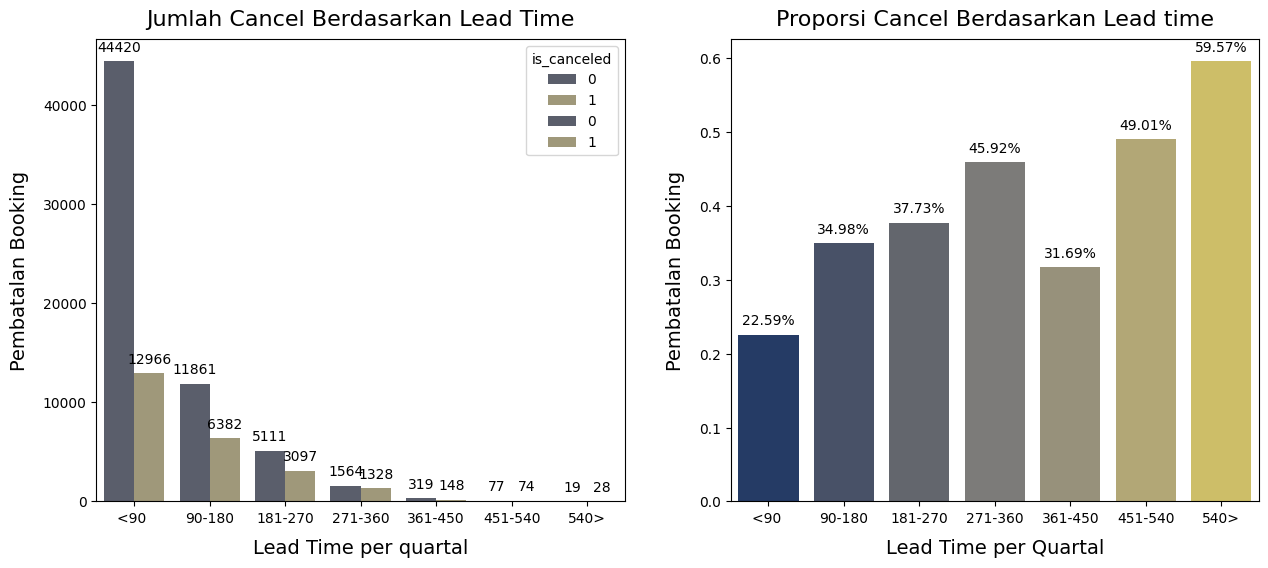

In [58]:
plt.figure(figsize=(15,6))

for i in range (2):
    plt.subplot(1, 2, 1)
    ax = sns.barplot(data=df_analisis.sort_values('lead_time', ascending=True), x='lead_time_group', y='is_canceled', estimator=len, hue="is_canceled", palette='cividis', ci=0)
    container = ax.containers[i]
    ax.bar_label(container, [int(x) for x in container.datavalues], padding= 5)
    plt.title('Jumlah Cancel Berdasarkan Lead Time', size=16, pad=10) 
    plt.xlabel('Lead Time per quartal', size=14, labelpad = 10)
    plt.ylabel('Pembatalan Booking', size=14, labelpad = 10)

plt.subplot(1, 2, 2)
ax = sns.barplot(data=df_analisis.sort_values('lead_time', ascending=True), x='lead_time_group', y='is_canceled', estimator=np.mean, palette='cividis', ci=0)
container = ax.containers[0]
ax.bar_label(container, [f"{float(x)*100:.2f}%" for x in container.datavalues], padding= 5)
plt.title('Proporsi Cancel Berdasarkan Lead time', size=16, pad=10) 
plt.xlabel('Lead Time per Quartal', size=14, labelpad = 10)
plt.ylabel('Pembatalan Booking', size=14, labelpad = 10)
plt.show()

Dilihat dari grafik diatas terlihat bahwa pemesan yang memesan hotel yang kurang dari 90 hari waktu jeda memiliki jumlah cancel paling banyak dengan 12966 transaksi, namun saat di cek melalui proporsi ternyata persentase cancel untuk pemesan yang jedanya kurang dari 90 memilki proporsi yang terkecil dengan 22% jika dibandingkan dengan proporsi pembatalan pemesanan yang jedanya semakin lama jumlah proporsinya cenderung semakin tinggi. Hal ini dapat disebabkan karena waktu booking terhadap waktu check in terlalu lama, apabila waktu terlalu lama banyak hal yang dipertimbangkan oleh konsumen sehingga melakukan cancel.

Sehingga kami merekomendasikan terhadap pihak hotel untuk membuat kebijakan sebagai berikut:
1. Waktu pemesanan ke waktu check in maksimal tidak lebih dari setahun untuk mengurangi peluang terjadinya cancel. Sehingga pemesan hanya dapat melakukan booking maksimal H-1 tahun (365 hari) 
2. Pihak hotel juga menerapkan sistem reschedule dan refund terhadap customer dengan pertimbangan maksimal hari pengajuan. Misal : pengajuan reschedule/refund maksimal H-7 waktu check-in, apabila melebihi waktu maksimal tersebut maka tidak bisa. Hal ini dapat menjadi pertimbangan customer untuk tidak serta merta langsung melakukan cancel. 
3. Pihak hotel memberikan kebijakan proporsional penaly terhadap customer yang melakukan cancelation yang mendekati waktu check-in. Misal customer melakukan cancelation pada H-3 dikenakan 50% harga hotel, apabila cancelation terjadi pada H-1 tidak dapat dilakukan cancelation atau refund.

Hal ini juga dapat menjadi mitigasi resiko bagi pihak hotel untuk melakukan strategi apabila calon customer melakuka cancelation pada lead time yang dekat dengan wkatu check-in. Sehingga pihak hotel memiliki waktu maksimal H-7 untuk melakukan penawaran/penjualan kamar terhadap customer baru efek dari cancelation.

#### **Apakah dengan banyaknya pemesan hotel di bulan tertentu mempenmgaruhi persentase pembatalan booking hotel?**

In [59]:
# mengambil tahun dan bulan (yyyy-mm)
df_analisis['arrival_month'] = df_analisis['arrival_date'].apply(lambda x : str(x)[:7])

# mengubah tipe data arrival_month dari str menjadi datetime
df_analisis['arrival_month'] = pd.to_datetime(df_analisis['arrival_month'])

# membuat dataframe trend freq 
df_date_freq = df_analisis[["arrival_date_month", "arrival_date_year", "arrival_month"]].sort_values("arrival_month", ascending=True)
df_datefreq = df_date_freq.groupby("arrival_date_month").value_counts().reset_index()

#
df_date_cancel = df_analisis[["arrival_date_month", "arrival_date_year", "arrival_month", "is_canceled"]].sort_values("arrival_month", ascending=True)
df_date_iscancel = df_date_cancel.groupby("arrival_date_month").value_counts().reset_index().sort_values("arrival_month", ascending=True)

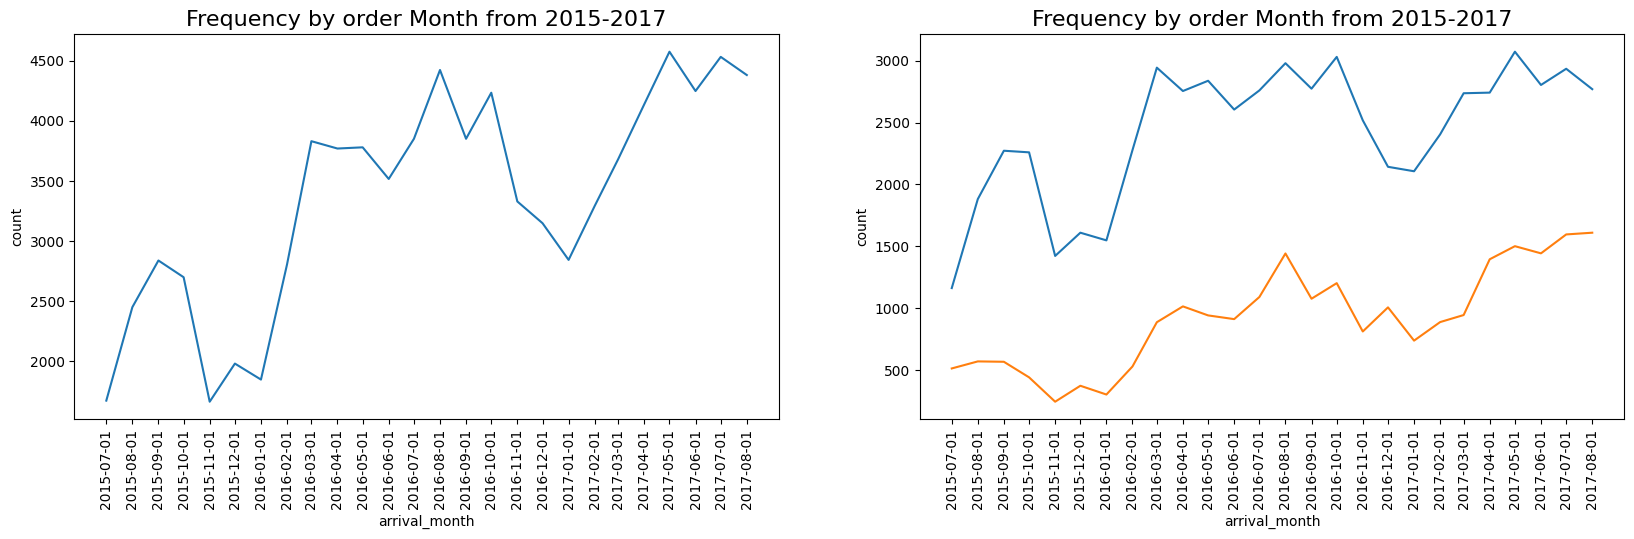

In [60]:
plt.figure(figsize=(20,5))

plt.subplot(1, 2, 1)
sns.lineplot(
    data = df_datefreq.sort_values("arrival_month", ascending=True),
    x = 'arrival_month',          # Time Series
    y = 'count'                # Numerical
)
plt.title(label = 'Frequency by order Month from 2015-2017', size=16)
plt.xticks(ticks = df_datefreq.sort_values("arrival_month", ascending=True)['arrival_month'], rotation=90)

plt.subplot(1, 2, 2)
sns.lineplot(
    data = df_date_iscancel[df_date_iscancel["is_canceled"] == 0],
    x = 'arrival_month',          # Time Series
    y = 'count'                # Numerical
)
sns.lineplot(
    data = df_date_iscancel[df_date_iscancel["is_canceled"] == 1],
    x = 'arrival_month',          # Time Series
    y = 'count'                # Numerical
)
plt.title(label = 'Frequency by order Month from 2015-2017', size=16)
plt.xticks(ticks = df_datefreq.sort_values("arrival_month", ascending=True)['arrival_month'], rotation=90)

plt.show()

Dari grafik diatas, dilihat bahwa trend pemesan hotel ada pada sekitar bulan juli-agustus yang merupakan summer season, umumnya summer season termasuk pada high season. Jika dilihat trend menjadi menurun pada bulan november-januari yang merupakan winter season walaupun secara garis beras trend booking hotel tersebut cenderung naik. Maka seasonal mempengaruhi keputusan pelanggan pada season tertentu untuk melakukan transaksi, sehingga kami merekomendasikan untuk meningkatkan pemesanan booking hotel pada winter dan mengurangi cancel pada saat summer season yang termasuk kedalam  high season di Negara Portugal. 

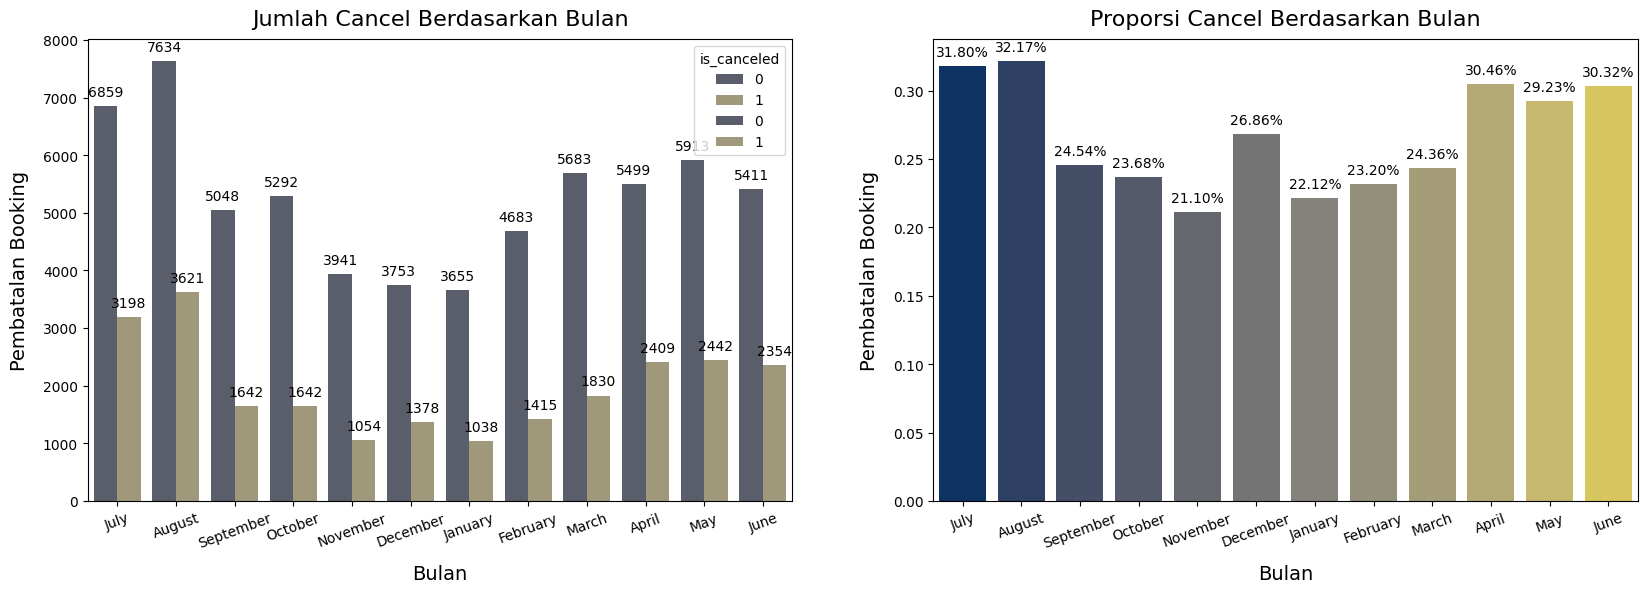

In [61]:
plt.figure(figsize=(20,6))

plt.subplot(1, 2, 1)
for i in range (2):
    ax = sns.barplot(data=df_analisis, x='arrival_date_month', y='is_canceled', estimator=len, hue="is_canceled", palette='cividis', ci=0)
    container = ax.containers[i]
    ax.bar_label(container, [int(x) for x in container.datavalues], padding= 5)
    plt.title('Jumlah Cancel Berdasarkan Bulan', size=16, pad=10) 
    plt.xlabel('Bulan', size=14, labelpad = 10)
    plt.xticks(rotation=20)
    plt.ylabel('Pembatalan Booking', size=14, labelpad = 10)

plt.subplot(1, 2, 2)
ax = sns.barplot(data=df_analisis, x='arrival_date_month', y='is_canceled', estimator=np.mean, palette='cividis', ci=0)
container = ax.containers[0]
ax.bar_label(container, [f"{float(x)*100:.2f}%" for x in container.datavalues], padding= 5)
plt.title('Proporsi Cancel Berdasarkan Bulan', size=16, pad=10) 
plt.xlabel('Bulan', size=14, labelpad = 10)
plt.xticks(rotation=20)
plt.ylabel('Pembatalan Booking', size=14, labelpad = 10)
plt.show()

Dilihat dari grafik sebelumnya yang membahas bulan yang paling diminati pengunjung dan grafik diatas, diketahui bahwa proporsi bulan July dan Agustus merupakan bulan dengan paling banyak diminati oleh pengunjung namun pada bulan tersebut juga banyak terjadi cancel. Hal ini dikarenakan pada bulan tersebut merupakan summer season yang dimana untuk wilayah eropa dan portugal pada bulan tersebut memang bulannya berlibur pada saat musim panas. Karena High season mempengaruhi proporsi banyaknya cancel kami merekomendasikan untuk tim marketing mengurangi cancel pada saat high season di bulan tersebut dengan mempertimbangkan harga. Sebelum itu kita lihat terlebih dahulu adr(average daily rate) terhadap bulan-bulan tersebut.

In [62]:
# Membuat dataframe untuk mengetahui nilai adr terhadap bulan
df_adr = df_analisis.sort_values("arrival_month", ascending=True)

Text(0, 0.5, 'adr')

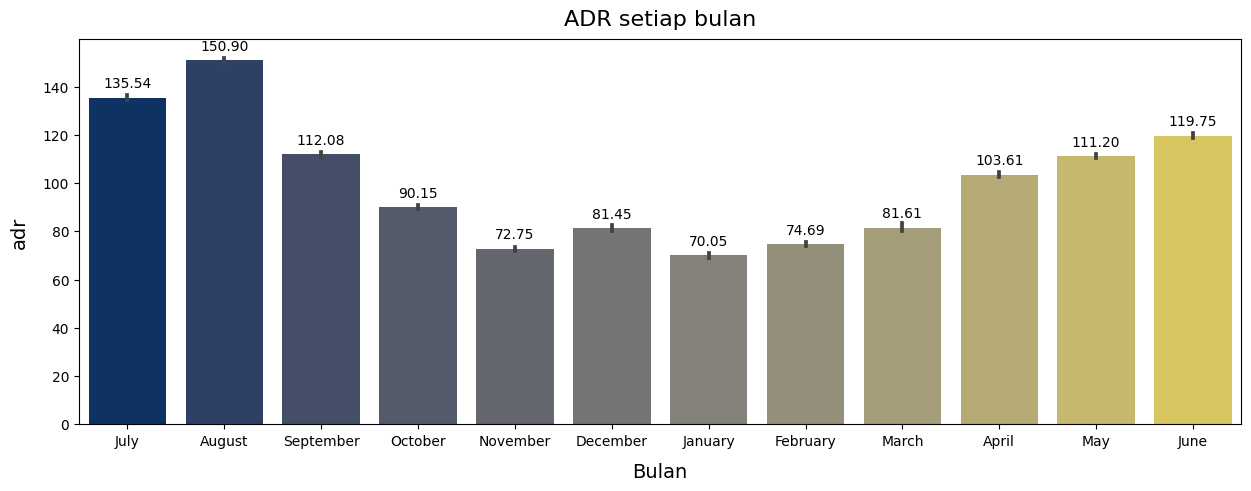

In [63]:
plt.figure(figsize=(15,5))
ax = sns.barplot(data=df_adr, x='arrival_date_month', y='adr', estimator='mean', palette='cividis')
container = ax.containers[0]
ax.bar_label(container, [f"{float(x):.2f}" for x in container.datavalues], padding= 5)
plt.title('ADR setiap bulan', size=16, pad=10) 
plt.xlabel('Bulan', size=14, labelpad = 10)
plt.ylabel('adr', size=14, labelpad = 10)

Setelah kita tinjau nilai adr (average daily rate) terhadap arrival_date_month nilai adr cenderung naik terjadi pada bulan januari ke agustus, apabila ditinjau lebih jauh pada bulan tersebut terjadi pada winter season menuju summer season. Dan puncak kenaikan adr terjadi pada summer season yaitu bulan July dan Agustus. Hal ini dapat disebabkan karena jumlah peminat pada bulan tersebut sedang tinggi atau bisa juga disebabkan karena harga hotel pada high season mengalami kenaikan. Pada umumnya high season harga-harga akomodasi/faktor lain pada daerah yang biasanya menjadi destinasi wisata mengalami kenaikan. Sehingga faktor lain tersebut juga dapat menjadi faktor yang menjadi pertimbangan konsumen melakukan pembatalan pemesanan.

Sehingga kita merekomendasikan beberapa hal yang dapat dilakukan hotel untuk mengurangi peluang pembatalan pemesanan sebagai berikut:
1. Hotel memberikan penawaran ulang yang lebiih menarik pada calon customer pada high season/calon customer yang berpeluang cancel pada high season.
2. Untuk menarik calon pemesan Hotel memberikan voucher discount seperti discount summer event. 

### **Bagaimana dan pelayanan hotel mempengaruhi karakteristrik pelanggan membatalkan pesanan hotel?**
#### **Jenis hotel apa yang melakuakn pembatalan pesanannya terbesar?**

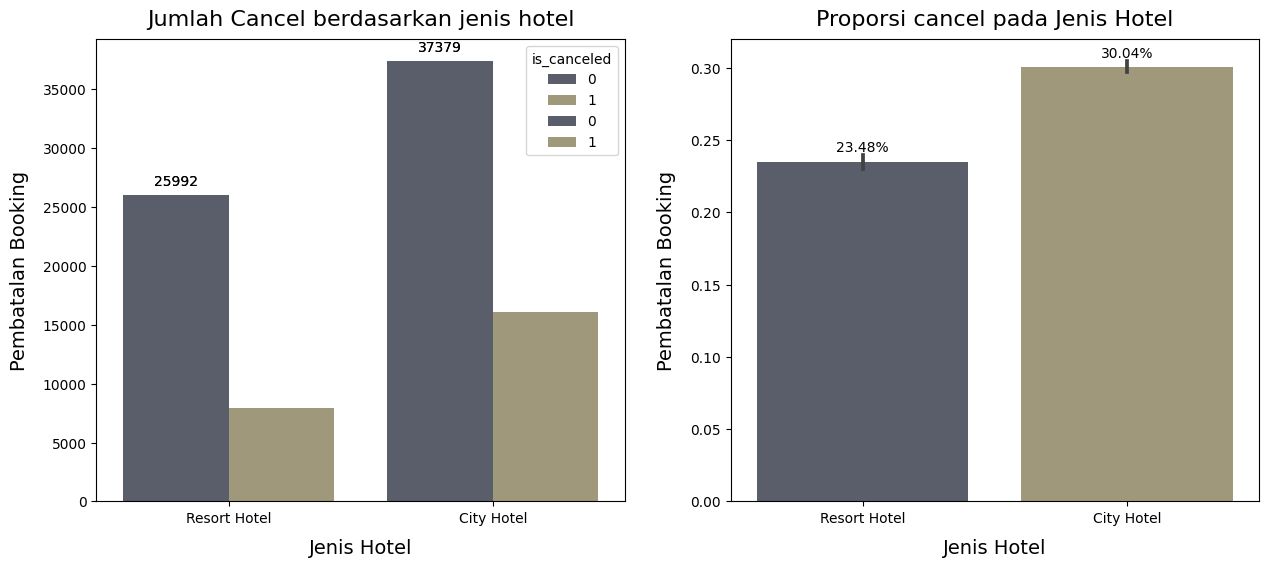

In [64]:
plt.figure(figsize=(15,6))

plt.subplot(1, 2, 1)
for i in range (2):
    ax = sns.barplot(data=df_analisis, x='hotel', y='is_canceled', estimator=len, hue="is_canceled", palette='cividis')
    container = ax.containers[0]
    ax.bar_label(container, [int(x) for x in container.datavalues], padding= 5)
    plt.title('Jumlah Cancel berdasarkan jenis hotel', size=16, pad=10) 
    plt.xlabel('Jenis Hotel', size=14, labelpad = 10)
    plt.ylabel('Pembatalan Booking', size=14, labelpad = 10)

plt.subplot(1, 2, 2)
ax = sns.barplot(data=df_analisis, x='hotel', y='is_canceled', estimator="mean", palette='cividis')
container = ax.containers[0]
ax.bar_label(container, [f"{float(x)*100:.2f}%" for x in container.datavalues], padding= 5)
plt.title('Proporsi cancel pada Jenis Hotel', size=16, pad=10) 
plt.xlabel('Jenis Hotel', size=14, labelpad = 10)
plt.ylabel('Pembatalan Booking', size=14, labelpad = 10)
plt.show()

In [65]:
df_analisis.groupby("hotel")["adr"].mean()

hotel
City Hotel      110.989537
Resort Hotel    99.025346 
Name: adr, dtype: float64

In [66]:
df_hotel = df_analisis.groupby("hotel")["country"].value_counts().reset_index()
df_city = df_hotel[df_hotel["hotel"] == "City Hotel"].head()
df_resort = df_hotel[df_hotel["hotel"] == "Resort Hotel"].head()

display(df_city, df_resort)

,hotel,country,count
0,City Hotel,PRT,13213
1,City Hotel,FRA,7412
2,City Hotel,GBR,4528
3,City Hotel,DEU,4467
4,City Hotel,ESP,3784


,hotel,country,count
167,Resort Hotel,PRT,14238
168,Resort Hotel,GBR,5905
169,Resort Hotel,ESP,3468
170,Resort Hotel,IRL,1948
171,Resort Hotel,FRA,1425


**Insight**
Dari grafik di atas terlihat bahwa Jumlah pemesan hotel paling banyak melakukan cancel berdasarkan jenis hotel berasal dari **City Hotel** dengan *16047* dengan dua kali lipat dibandingkan **Resort Hotel**. Jika dilihat dari proporsinya sebanyak *30%* pemesan hotel membatalkan pemesanan booking hotel, yang berarti peminat pemesan hotel **city hotel** memang paling banyak dari segi banyaknya pemesanan ataupun banyaknya yang melakukan pembatalan dari proporsi.

 Hal tersebut disebabkan karena mayoritas pemesan merupakan visitor lokal dari negara **portugal** dengan total pemesan sebanyak *27451* dari *87394* pemesan. Dari segi jumlah peminat **city hotel** lebih tinggi dibandingkan resort hotel, sehingga hal ini juga makin meningkatkan peluang terjadinya cancelation lebih tinggi dari **resort hotel**.

Berdasarkan domain knowledge **resort hotel** memiliki kapasitas kamar yang lebih besar dari **city hotel**, sehingga menyebabkan city hotel lebih mudah melakukan cancelation dikarenakan jumlah orang dalam satu kamar lebih sedikit untuk pengambilan keputusannya dibandingkan resort hotel yang biasanya jumlah orang yang terlibat lebih banyak. 

#### **Apakah jenis paket breakfast terbanyak yang mengakibatkan pembatalan pemesanan hotel?**

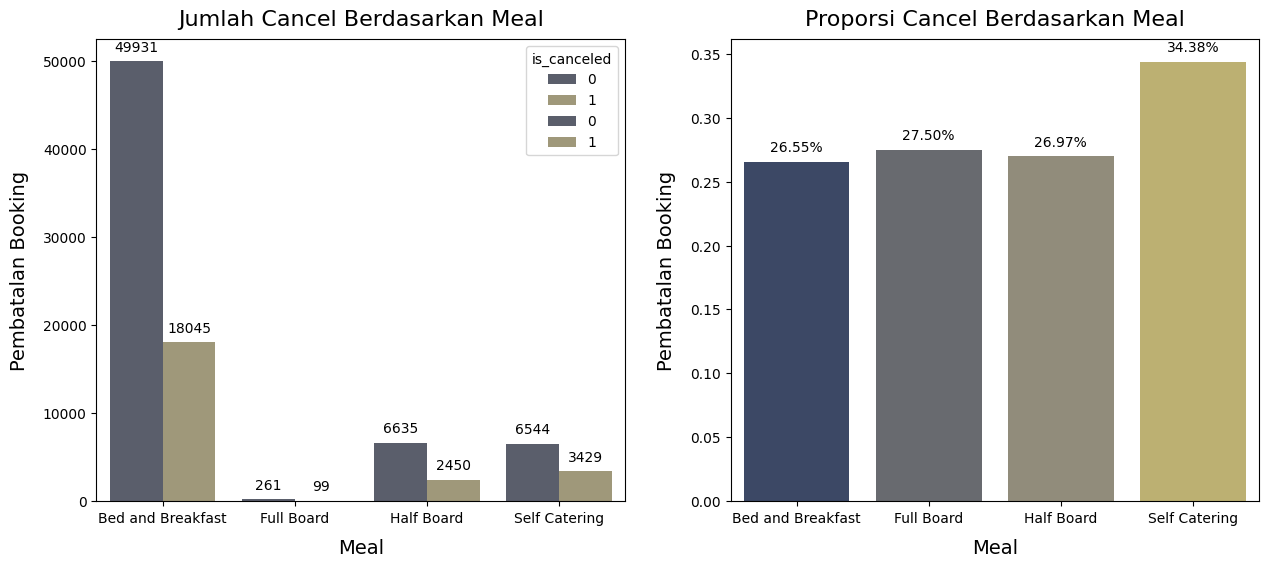

In [67]:
plt.figure(figsize=(15,6))

for i in range (2):
    plt.subplot(1, 2, 1)
    ax = sns.barplot(data=df_analisis, x='meal', y='is_canceled', estimator=len, hue="is_canceled", palette='cividis', ci=0)
    container = ax.containers[i]
    ax.bar_label(container, [int(x) for x in container.datavalues], padding= 5)
    plt.title('Jumlah Cancel Berdasarkan Meal', size=16, pad=10) 
    plt.xlabel('Meal', size=14, labelpad = 10)
    plt.ylabel('Pembatalan Booking', size=14, labelpad = 10)

plt.subplot(1, 2, 2)
ax = sns.barplot(data=df_analisis, x='meal', y='is_canceled', estimator=np.mean, palette='cividis', ci=0)
container = ax.containers[0]
ax.bar_label(container, [f"{float(x)*100:.2f}%" for x in container.datavalues], padding= 5)
plt.title('Proporsi Cancel Berdasarkan Meal', size=16, pad=10) 
plt.xlabel('Meal', size=14, labelpad = 10)
plt.ylabel('Pembatalan Booking', size=14, labelpad = 10)
plt.show()

In [68]:
df_analisis["meal"].value_counts()

meal
Bed and Breakfast    67976
Self Catering        9973 
Half Board           9085 
Full Board           360  
Name: count, dtype: int64

In [69]:
df_analisis.groupby("meal")["adr"].mean()

meal
Bed and Breakfast    103.672142
Full Board           143.293667
Half Board           133.272635
Self Catering        98.649843 
Name: adr, dtype: float64

In [70]:
df_meal = df_analisis.groupby("meal")["country"].value_counts().reset_index()
df_meal[df_meal["meal"]== "Bed and Breakfast"].head()

,meal,country,count
0,Bed and Breakfast,PRT,22281
1,Bed and Breakfast,GBR,7796
2,Bed and Breakfast,FRA,6769
3,Bed and Breakfast,ESP,5178
4,Bed and Breakfast,DEU,4059


Dari grafik diatas dapat dilihat **Bed and breakfast** adalah pilihan yang paling banyak cancel dengan jumlah *18045* pemesanan hal itu merupakan hal wajar jika dilihat melalui mayoritas pemesan hotel memilih Bed and Breakfast dengan asumsi para pemesan memilih untuk sarapan di hotel dibandingkan mencari sarapan di luar, dan proporsi cancel terbesar ada pada **Self Catering** dengan persentase 34% kemungkinan hal itu terjadi karena rata-rata harga untuk **Self Catering** dan **Bed and breakfast** hanya berbeda sedikit sekitar €5 para konsumen sudah mendapatkan menu sarapan. 

In [71]:
# Membuat pivot table untuk analisis chi square
meal_pivot = df_analisis.pivot_table(index="is_canceled", columns="meal", values="adr", aggfunc=lambda x: round(x.mean(),2))

# Chi square

Menguji independency/keterkaitan antara 2 categorical variable.

Di bawah ini adalah crosstab dari 2 kolom is_canceled dan meal. 
Kita akan menguji apakah is_canceled terkait dengan pilihan buah yg akan dibeli.

Hypothesis:
- Ho: is_canceled dan meal tidak terkait/independent (proporsinya sama)
- Ha: is_canceled dan meal terkait/dependent (proporsinya berbeda signifikan)

In [72]:
stat, pvalue, dof, expected = chi2_contingency(meal_pivot)
pvalue

0.521424433633547

In [73]:
# conclusion
if pvalue > 0.05:
    print(f'''
    pvalue = {pvalue:.5f}. pvalue > 0.05. Gagal menolak Ho.
    Kita TIDAK punya cukup bukti untuk mengatakan bahwa antara is_canceled dan meal ada keterkaitan (dependent)
    (Proporsinya TIDAK berbeda signifikan)
    ''')
else:
    print(f'''
    pvalue = {pvalue:.5f}. pvalue <= 0.05. Menolak Ho.
    Kita punya cukup bukti untuk mengatakan bahwa antara is_canceled dan meal ada keterkaitan (dependent)
    (Proporsinya berbeda signifikan)
    ''')


    pvalue = 0.52142. pvalue > 0.05. Gagal menolak Ho.
    Kita TIDAK punya cukup bukti untuk mengatakan bahwa antara is_canceled dan meal ada keterkaitan (dependent)
    (Proporsinya TIDAK berbeda signifikan)
    


Setelah dilakukan analisis didapatkan ternyata proporsi tidak berbeda signifikan. Maka kami merekomendasikan tim marketing untuk memberikan penwaran menarik kepada pelanggan **Self Catering** promosi free sarapan untuk pemesan dengan katakteristik **Self Catering** yang melakukan cancel.

#### **Bagaimana pengaruh banyaknya lahan parkir yang di sediakan hotel terhadap pembatalan pemesanan hotel??**

In [74]:
# membuat dataframe banyaknya cancel dan tidak pada kolom required car parking spaces
df_parking = df_analisis.groupby('is_canceled')[['required_car_parking_spaces']].value_counts().reset_index()

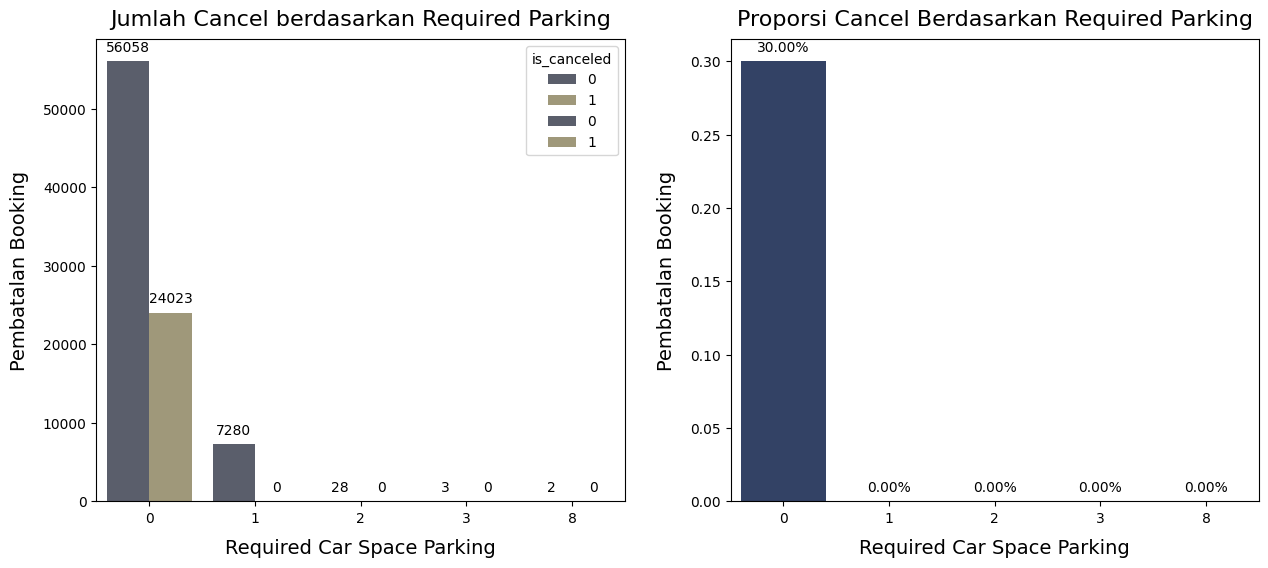

In [75]:
plt.figure(figsize=(15,6))

plt.subplot(1, 2, 1)
for i in range (2):
    ax = sns.barplot(data=df_parking, x='required_car_parking_spaces', y='count', estimator=sum, hue='is_canceled', palette='cividis', ci=0)
    container = ax.containers[i]
    ax.bar_label(container, [int(x) for x in container.datavalues], padding= 5)
    plt.title('Jumlah Cancel berdasarkan Required Parking', size=16, pad=10) 
    plt.xlabel('Required Car Space Parking', size=14, labelpad = 10)
    plt.ylabel('Pembatalan Booking', size=14, labelpad = 10)

plt.subplot(1, 2, 2)
ax = sns.barplot(data=df_analisis, x='required_car_parking_spaces', y='is_canceled', estimator="mean", palette='cividis', ci=0)
container = ax.containers[0]
ax.bar_label(container, [f"{float(x)*100:.2f}%" for x in container.datavalues], padding= 5)
plt.title('Proporsi Cancel Berdasarkan Required Parking', size=16, pad=10) 
plt.xlabel('Required Car Space Parking', size=14, labelpad = 10)
plt.ylabel('Pembatalan Booking', size=14, labelpad = 10)

plt.show()

In [76]:
df_analisis[df_analisis["required_car_parking_spaces"]==0].groupby("required_car_parking_spaces")["visitor"].value_counts().reset_index().head()

,required_car_parking_spaces,visitor,count
0,0,2,52392
1,0,1,14860
2,0,3,9215
3,0,4,3321
4,0,0,159


Berdasarkan grafik diatas didapatkan informasi bahwa mayoritas pengunjung tidak membutuhkan car space, hal ini mungkin dikarenakan pengunjung tidak membawa kendaraan pribadi. Terdapat 24023 orang yang tidak memerlukan car space namun melakukan cancelation. Dengan kata lain hal ini menunjukkan bahwa car space parking bukan menjadi faktor dilakukannya pembatalan pemesanan. Hal ini juga dapat dilihat dengan customer yang membutuhkan car space tidak melakukan pembatalan terhadap pemesanan, karena hotel dapat memenuhi kebutuhan terkait car space yang dibutuhkan pelanggan. 

#### **Apakah banyaknya permintaan konsumen terhadap fasilitas hotel mempengaruhi pembatalan pemesanan hotel?**

Text(0, 0.5, 'Pembatalan Booking')

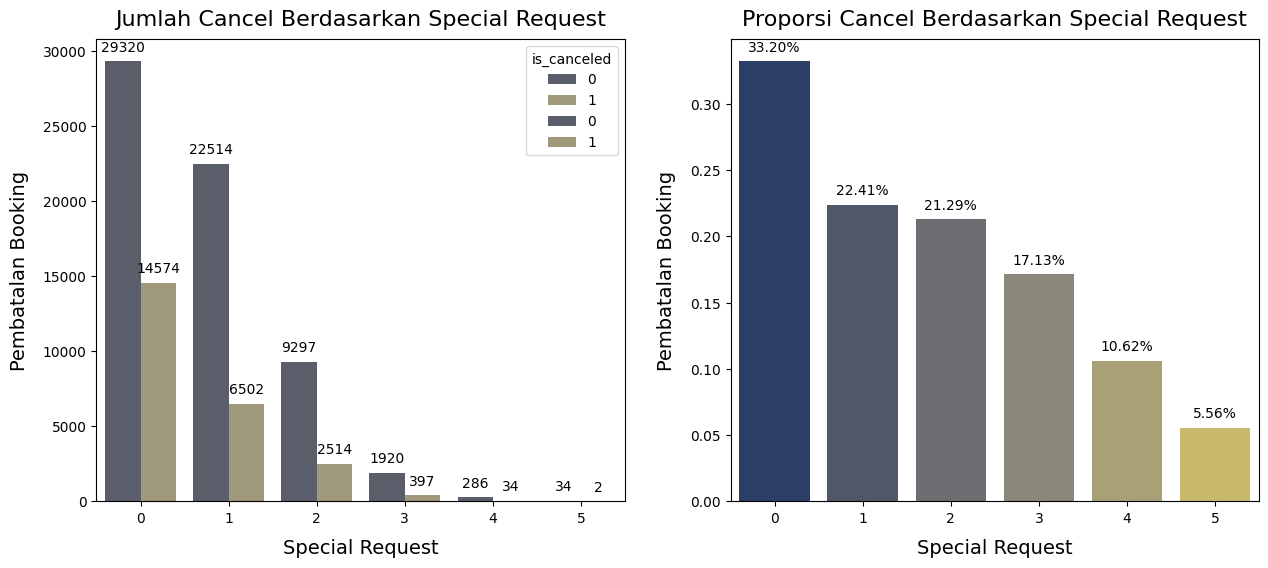

In [77]:
plt.figure(figsize=(15,6))

plt.subplot(1, 2, 1)
for i in range (2):
    ax = sns.barplot(data=df_analisis, x='total_of_special_requests', y='is_canceled', estimator=len, hue='is_canceled', palette='cividis', ci=0)
    container = ax.containers[i]
    ax.bar_label(container, [int(x) for x in container.datavalues], padding= 5)
    plt.title('Jumlah Cancel Berdasarkan Special Request', size=16, pad=10) 
    plt.xlabel('Special Request', size=14, labelpad = 10)
    plt.ylabel('Pembatalan Booking', size=14, labelpad = 10)

plt.subplot(1, 2, 2)
ax = sns.barplot(data=df_analisis, x='total_of_special_requests', y='is_canceled', estimator=np.mean, palette='cividis', ci=0)
container = ax.containers[0]
ax.bar_label(container, [f"{float(x)*100:.2f}%" for x in container.datavalues], padding= 5)
plt.title('Proporsi Cancel Berdasarkan Special Request', size=16, pad=10) 
plt.xlabel('Special Request', size=14, labelpad = 10)
plt.ylabel('Pembatalan Booking', size=14, labelpad = 10)


In [78]:
df_analisis.groupby("total_of_special_requests")["adr"].mean()

total_of_special_requests
0    99.665633 
1    109.654862
2    118.578827
3    125.070790
4    131.088687
5    129.980000
Name: adr, dtype: float64

Jika dilihat dari grafik semakin banyaknya jumlah spesial request, jumlah pembatalan hotel semakin kecil. Namun hal ini dikarenakan jumlah transaksi dengan jumlah spesial request > 3 lebih sedikit dari transaksi tanpa spesial request. Berdasarkan grafik Mayoritas cancelation berasal dari pelanggan tanpa spesial request. Sehingga kami merekomendasikan kepada tim penyedia layanan hotel **untuk menawarkan kebutuhan special request kepada pemesan yang tidak melakukan special request terlebih dahulu.**

#### **Bagaimana pengaruh perbedaan pemesana type kamar dan type yang disediakan hotel?**

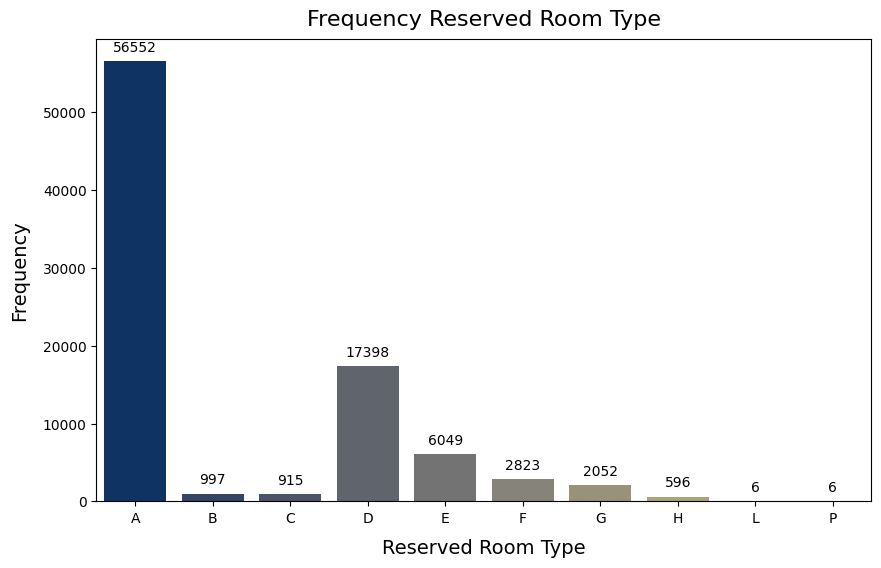

In [79]:
plt.figure(figsize=(10,6))

ax = sns.countplot(data=df_analisis.sort_values("reserved_room_type", ascending=True), x='reserved_room_type', palette='cividis')
container = ax.containers[0]
ax.bar_label(container, [int(x) for x in container.datavalues], padding= 5)
plt.title('Frequency Reserved Room Type', size=16, pad=10) 
plt.xlabel('Reserved Room Type', size=14, labelpad = 10)
plt.ylabel('Frequency', size=14, labelpad = 10)
plt.show()

Berdasarakan grafik diatas dapat diketahui bahwa minat pelanggan secara garis besar terhadap Rooom Type A, D dan E

In [80]:
# Membuat room type
df1 = df_analisis["reserved_room_type"].value_counts()
df2 = df_analisis["assigned_room_type"].value_counts()

# Menggabungkan dua kolom
df_room = pd.concat([df1,df2],axis = 0).reset_index().reset_index()

# Membuat kolom kategori same dan not same pada type room
def category_room(level_0):
    if level_0 < 10 :
        return 'reserved'
    else:
        return 'assigned'

# Menerapkan fungsi untuk membuat kolom 'category'
df_room['category'] = df_room['level_0'].apply(category_room)

# Merapihkan dataframe
df_room = df_room.drop(columns="level_0")
df_room = df_room.rename(columns= {"index" : "room"})

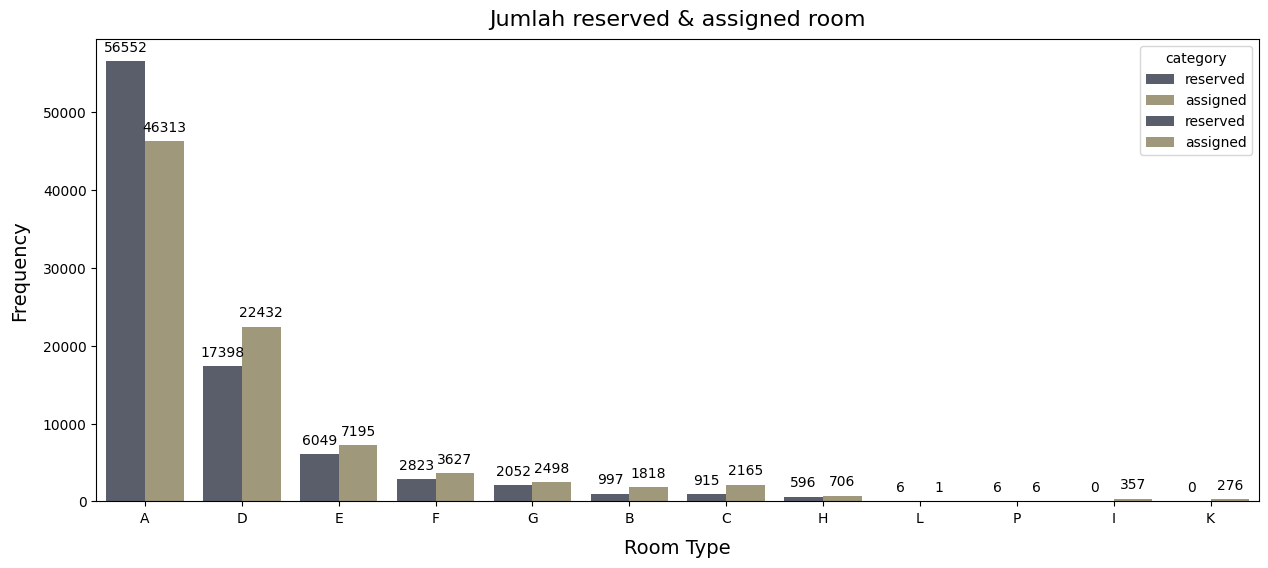

In [81]:
plt.figure(figsize=(15,6))

for i in range(2):
    ax = sns.barplot(data=df_room, x='room', y='count', estimator="sum", hue="category", palette='cividis', ci=0)
    container = ax.containers[i]
    ax.bar_label(container, [int(x) for x in container.datavalues], padding= 5)
    plt.title('Jumlah reserved & assigned room', size=16, pad=10) 
    plt.xlabel('Room Type', size=14, labelpad = 10)
    plt.ylabel('Frequency', size=14, labelpad = 10)
plt.show()

Berdasarkan garis besar dapat diketahui bahwa banyak pelanggan mendapatkan kamar tidak sesuai permintaan ketika booking. Hal ini dapat menyebabkan pelanggan melakukan cancellation atau menurunkan kepuasan pelanggan. Sehingga kita merekomendasikan terhadap pihak hotel untuk melakukan layanan seperti berikut ini:
1. Apabila pihak hotel akan melakukan pergantian room yang tidak sesuai dengan pemesanan customer dikarenakan ketersediaan kamar. pihak hotel harus menanyakan kesediaan terlebih dahulu terhadap customer atas pergantian kamar
2. Pihak hotel juga harus memberikan complementary terhadap customer. Seperti memberikan free breakfast apabila pelanggan tidak memilih package breakfast atau memberikan potongan harga untuk booking selanjutnya.
3. Apabila ketersediaan kamar hotel yang tersedia kamar tidak sesuai, sebisa mungkin pihak hotel memberikan free upgrade terhadap customer tersebut
4. Menjadi masukkan untuk pihak hotel melakukan sistem ketersediaan kamar yang akurat agar menghindari ketidaksesuaian kamar yang dipesan

### **3. Bagaimana karakteristik pelanggan yang akan melakukan pembatalan pemesanan hotel??**
#### **Bagaimana pengaruh banyaknya pendatang pada satu pemesanan booking hotel terhadap pembatalan pesanan hotel?**

In [82]:
# Membuat kolom kategori kelompok lead time per quartal
def category_visitor(visitor):
    if visitor == 0:
        return '0'
    elif visitor == 1:
        return '1'
    elif visitor == 2:
        return '2'
    elif visitor == 3:
        return '3'
    elif visitor == 4:
        return '4'
    else:
        return '>=5'

# Menerapkan fungsi untuk membuat kolom 'visitor_grop'
df_analisis['visitor_chart'] = df_analisis['visitor'].apply(category_visitor)

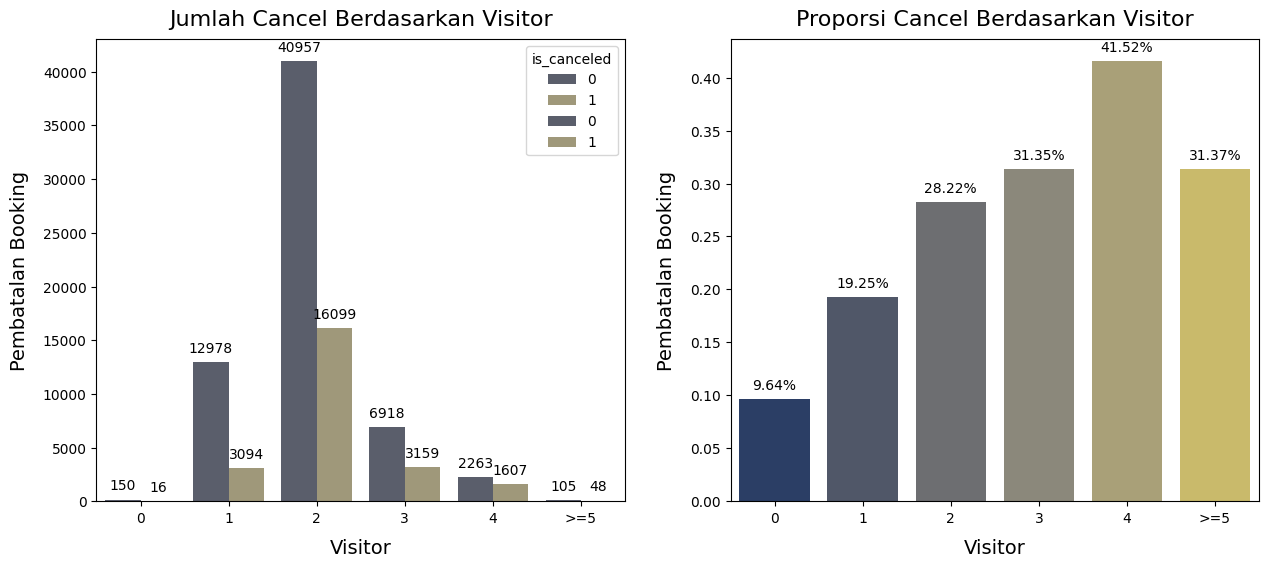

In [83]:
plt.figure(figsize=(15,6))

for i in range (2):
    plt.subplot(1, 2, 1)
    ax = sns.barplot(data=df_analisis.sort_values('visitor', ascending=True), x='visitor_chart', y='is_canceled', estimator=len, hue="is_canceled", palette='cividis', ci=0)
    container = ax.containers[i]
    ax.bar_label(container, [int(x) for x in container.datavalues], padding= 5)
    plt.title('Jumlah Cancel Berdasarkan Visitor', size=16, pad=10) 
    plt.xlabel('Visitor', size=14, labelpad = 10)
    plt.ylabel('Pembatalan Booking', size=14, labelpad = 10)

plt.subplot(1, 2, 2)
ax = sns.barplot(data=df_analisis.sort_values('visitor', ascending=True), x='visitor_chart', y='is_canceled', estimator=np.mean, palette='cividis', ci=0)
container = ax.containers[0]
ax.bar_label(container, [f"{float(x)*100:.2f}%" for x in container.datavalues], padding= 5)
plt.title('Proporsi Cancel Berdasarkan Visitor', size=16, pad=10) 
plt.xlabel('Visitor', size=14, labelpad = 10)
plt.ylabel('Pembatalan Booking', size=14, labelpad = 10)
plt.show()

Berdasarkan grafik diatas semakin banyaknya jumlah visitor dalam satu transaksi cenderung naik nilai proporsinya atau dalam kata lain semakin tinggi peluang terjadinya cancel. Untuk data diatas 5 hanya sedikit data yang dianggap anomali.

#### **Apakah type customer berpengaruh kepada pembatalan pesanan hotel?**

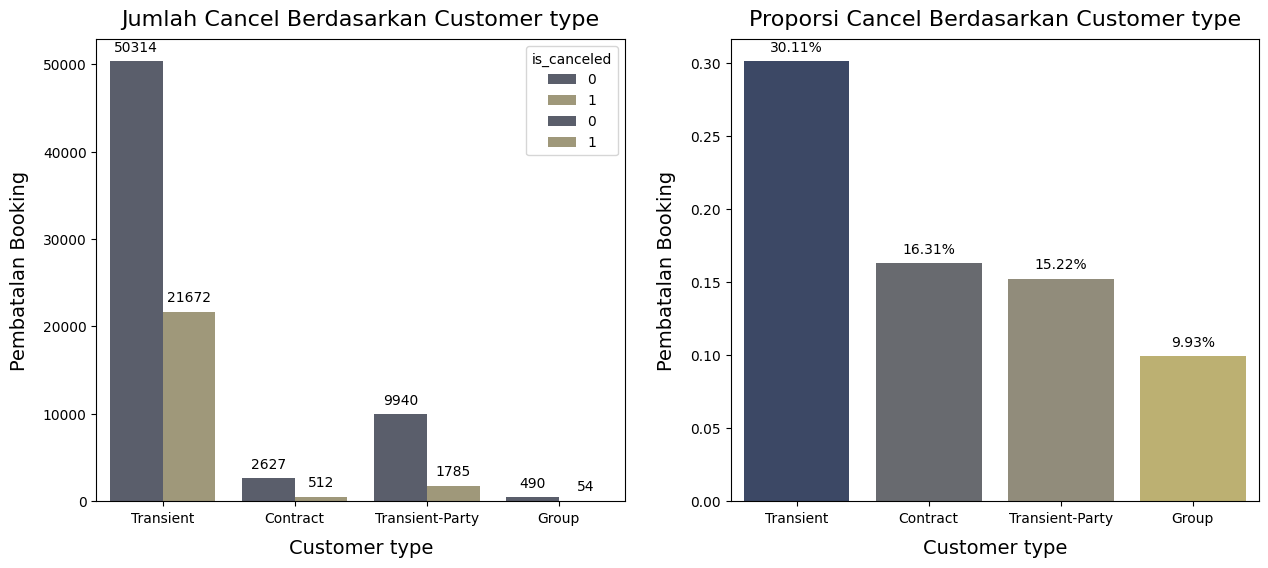

In [84]:
plt.figure(figsize=(15,6))

plt.subplot(1, 2, 1)
for i in range (2):
    ax = sns.barplot(data=df, x='customer_type', y='is_canceled', estimator=len, hue='is_canceled', palette='cividis', ci=0)
    container = ax.containers[i]
    ax.bar_label(container, [int(x) for x in container.datavalues], padding= 5)
    plt.title('Jumlah Cancel Berdasarkan Customer type', size=16, pad=10) 
    plt.xlabel('Customer type', size=14, labelpad = 10)
    plt.ylabel('Pembatalan Booking', size=14, labelpad = 10)

plt.subplot(1, 2, 2)
ax = sns.barplot(data=df, x='customer_type', y='is_canceled', estimator=np.mean, palette='cividis', ci=0)
container = ax.containers[0]
ax.bar_label(container, [f"{float(x)*100:.2f}%" for x in container.datavalues], padding= 5)
plt.title('Proporsi Cancel Berdasarkan Customer type', size=16, pad=10) 
plt.xlabel('Customer type', size=14, labelpad = 10)
plt.ylabel('Pembatalan Booking', size=14, labelpad = 10)

plt.show()

Berdasarkan grafik diatas proporsi yang terbesar yang melakukan pembatalan pemesanan pada pihak hotel yaitu berasal dari customer transient. Jumlah customer dari kelompok transient yang melakukan cancel sebanyak 21672 transaksi Sedangkan kelompok yang paling sedikit melakukan pembatalan yaitu kelompok group. Dari 544 transaksi group, 54 transaksi melakukan pembatalan pemesanan hotel. Secara Jumlah dan proporsi konsumen transient melakukan pembatalan paling banyak dan jika dilihat transient merupakan tipe pelanggan yang memesan secara individual dan tidak terikat kontrak jangka panjang seperti wisatawan yang ingin berlibur atu perjalanan bisnis dalam waktu singkat sehingga kami merekomendasikan untuk tim marketing membuat paket promo seperti membuat iklan yang ditargetkan kepada akun sosial media pribadi berup promo liburan atau promo akhir pekan dengan target audience type customer transient karena pelanggan transient lebih banyak memesan hotel pada saat weekend.

#### **Bagaimana pengaruh banyaknya pemesanan hotel yang dibatalkan sebelumnya terhadap pembatalan pesanan hotel?**

In [85]:
# Membuat kolom kategori kelompok cancellation
def category_cancellation(previous_cancellations):
    if previous_cancellations == 0:
        return 'No'
    else:
        return 'Yes'

# Menerapkan fungsi untuk membuat kolom 'cancellation_grop'
df_analisis['previous_cancellations_group'] = df_analisis['previous_cancellations'].apply(category_cancellation)
df_analisis.head(2)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,reservation_status_date_year,reservation_status_date_month,arrival_date,visitor,lead_time_group,arrival_month,visitor_chart,previous_cancellations_group
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0,0,Bed and Breakfast,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,UNKNOWN,UNKNOWN,0,Transient,0.0,0,0,Check-Out,2015-07-01,2015,July,2015-07-01,2,271-360,2015-07-01,2,No
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0,0,Bed and Breakfast,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,UNKNOWN,UNKNOWN,0,Transient,0.0,0,0,Check-Out,2015-07-01,2015,July,2015-07-01,2,540>,2015-07-01,2,No


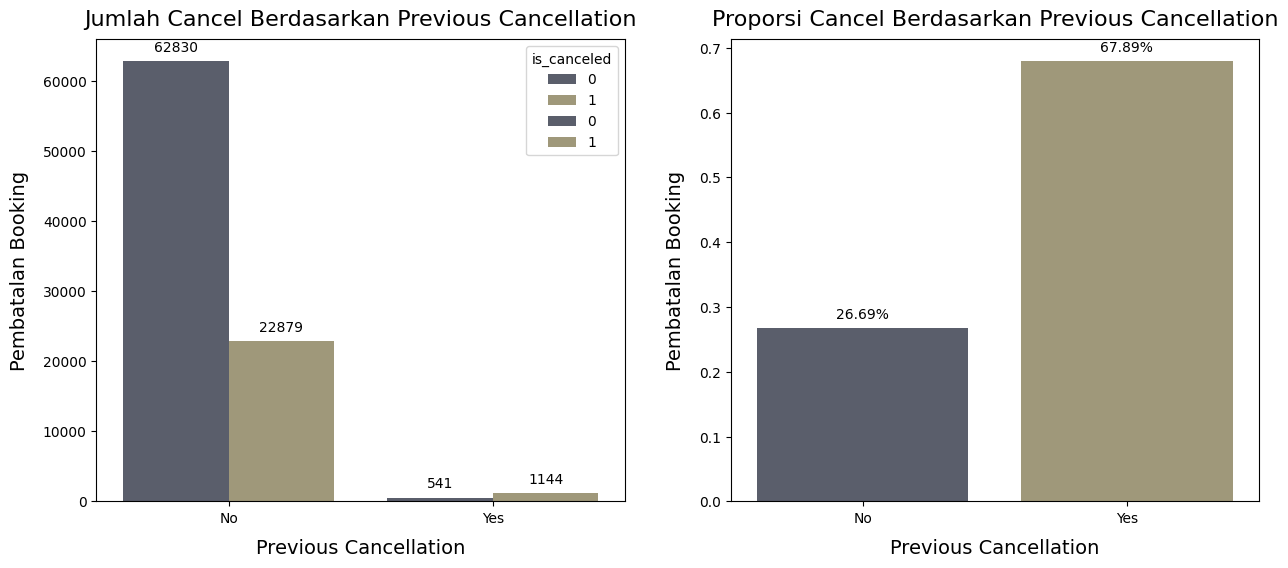

In [86]:
plt.figure(figsize=(15,6))

plt.subplot(1, 2, 1)
for i in range (2):
    ax = sns.barplot(data=df_analisis, x='previous_cancellations_group', y='is_canceled', estimator=len, hue='is_canceled', palette='cividis', ci=0)
    container = ax.containers[i]
    ax.bar_label(container, [int(x) for x in container.datavalues], padding= 5)
    plt.title('Jumlah Cancel Berdasarkan Previous Cancellation', size=16, pad=10) 
    plt.xlabel('Previous Cancellation', size=14, labelpad = 10)
    plt.ylabel('Pembatalan Booking', size=14, labelpad = 10)

plt.subplot(1, 2, 2)
ax = sns.barplot(data=df_analisis, x='previous_cancellations_group', y='is_canceled', estimator=np.mean, palette='cividis', ci=0)
container = ax.containers[0]
ax.bar_label(container, [f"{float(x)*100:.2f}%" for x in container.datavalues], padding= 5)
plt.title('Proporsi Cancel Berdasarkan Previous Cancellation', size=16, pad=10) 
plt.xlabel('Previous Cancellation', size=14, labelpad = 10)
plt.ylabel('Pembatalan Booking', size=14, labelpad = 10)

plt.show()


Berdasarkan faktor previous cancellation diketahui bahwa customer yang sebelumnya melakukan pembatalan proporsinya lebih besar melakukan pembatalan ditransaksi berikutnya. Sehingga rekomendasi terhadap pihak hotel dapat memberikan treatment khusus terhadap konsumen yang sebelumnya pernah melakukan cancellation seperti :
1. Penawaran reschedule apabila memang calon customer tersebut memiliki ketidaktepatan/tidak sesuaian tanggal, sehingga calon customer tidak langsung memutuskan untuk melakukan cancellation.
2. Penawaran apakah customer tersebut memiliki special request yang dapat dipenuhi oleh pihak hotel

#### **Bagaimana pengaruh tentang pemesan hotel yang pernah memesan hotel dan tidak terhadap pembatalan pesanan hotel?**

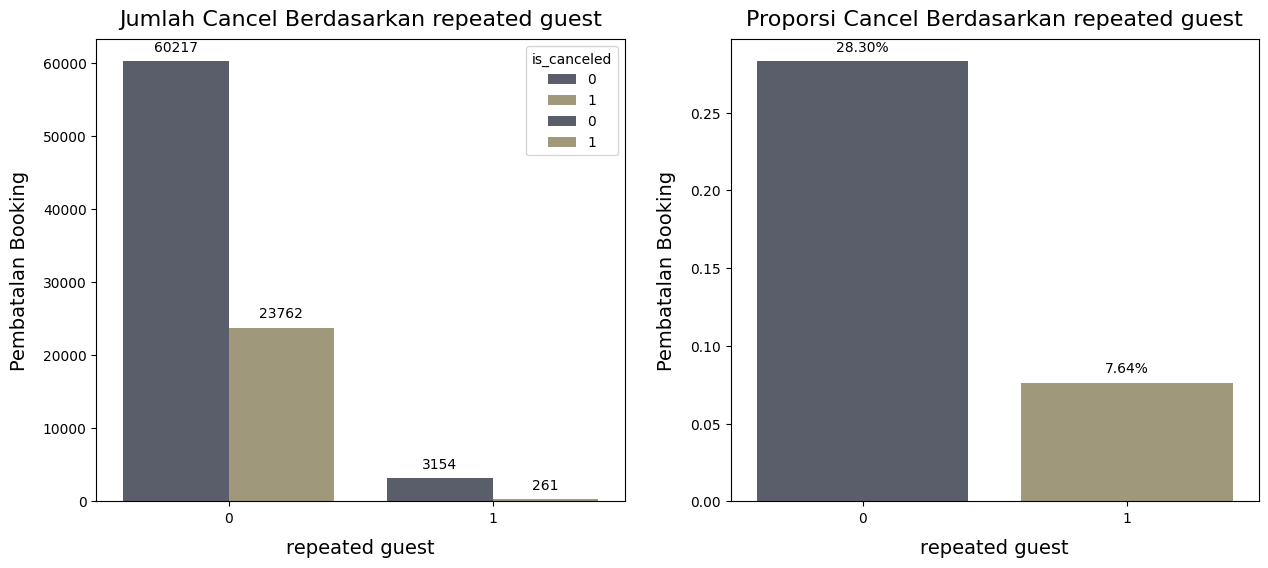

In [87]:
plt.figure(figsize=(15,6))

plt.subplot(1, 2, 1)
for i in range (2):
    ax = sns.barplot(data=df, x='is_repeated_guest', y='is_canceled', estimator=len, hue='is_canceled', palette='cividis', ci=0)
    container = ax.containers[i]
    ax.bar_label(container, [int(x) for x in container.datavalues], padding= 5)
    plt.title('Jumlah Cancel Berdasarkan repeated guest', size=16, pad=10) 
    plt.xlabel('repeated guest', size=14, labelpad = 10)
    plt.ylabel('Pembatalan Booking', size=14, labelpad = 10)

plt.subplot(1, 2, 2)
ax = sns.barplot(data=df, x='is_repeated_guest', y='is_canceled', estimator=np.mean, palette='cividis', ci=0)
container = ax.containers[0]
ax.bar_label(container, [f"{float(x)*100:.2f}%" for x in container.datavalues], padding= 5)
plt.title('Proporsi Cancel Berdasarkan repeated guest', size=16, pad=10) 
plt.xlabel('repeated guest', size=14, labelpad = 10)
plt.ylabel('Pembatalan Booking', size=14, labelpad = 10)

plt.show()

Dapat dilihat berdasarkan grafik diatas grafik proporsi customer yang belum pernah melakukan repeat booking lebih besar dari customer yang pernah melakukan booking. Hal ini mungkin disebabkan karena customer yang pernah melakukan booking pada hotel tersebut telah mengetahui fasilitas dan layanan yang didapatkan oleh pihak hotel dibandingkan customer yang belum pernah melakukan repeat booking. Hal ini juga diakibatkan jumlah customer baru lebih banyak. Sehingga saran kami terhadap pihak hotel yaitu memberikan potongan voucher pada setiap pelanggan baru agar tertarik untuk melakukan transaksi kembali dan memberikan pendekatan terhadap alasan cancellation pengunjung.

#### **Bagaimana pengaruh persebaran negara asal pemesenan hotel terhadap pembatalan pesanan hotel??**

In [88]:
# Membuat Data Frame frecuency top 10 cancel dan no cancel
dfc = df_analisis.groupby('is_canceled')[['country']].value_counts().reset_index()

dfc1 = dfc.sort_values('count', ascending=False)
dfc1_top = dfc1[dfc1['is_canceled'] == 1].head(10)

dfc0 = dfc.sort_values('count', ascending=False)
dfc0_top = dfc0[dfc0['is_canceled'] == 0].head(10)

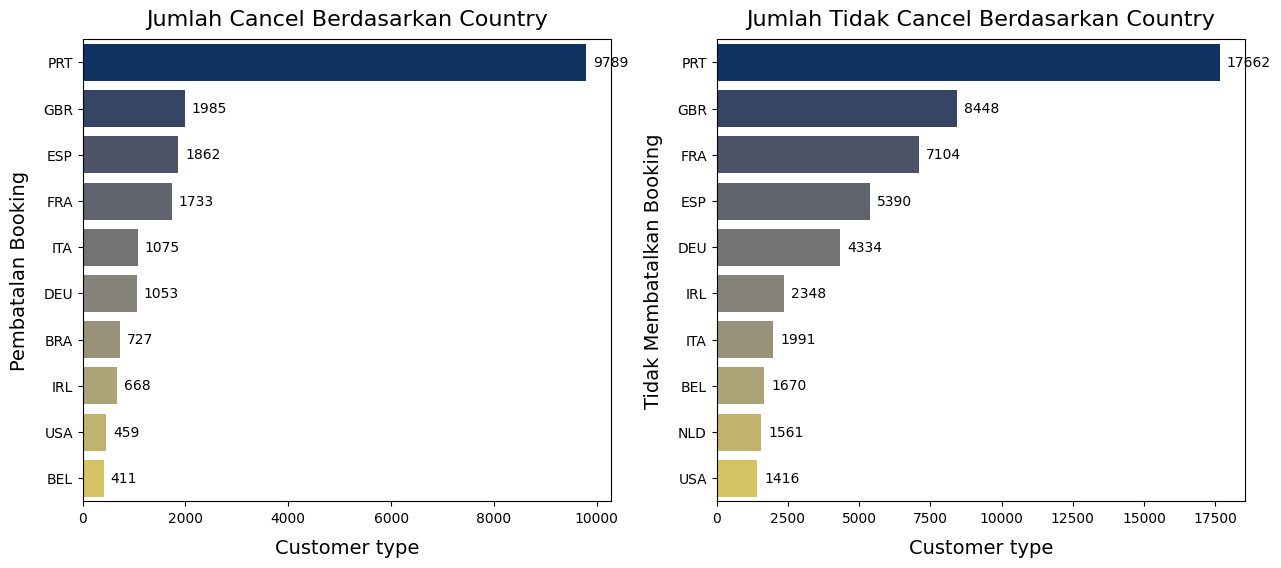

In [89]:
plt.figure(figsize=(15,6))

plt.subplot(1, 2, 1)
ax = sns.barplot(data=dfc1_top, x='count', y='country', estimator=sum, palette='cividis', ci=0)
container = ax.containers[0]
ax.bar_label(container, [int(x) for x in container.datavalues], padding= 5)
plt.title('Jumlah Cancel Berdasarkan Country', size=16, pad=10) 
plt.xlabel('Customer type', size=14, labelpad = 10)
plt.ylabel('Pembatalan Booking', size=14, labelpad = 10)

plt.subplot(1, 2, 2)
ax = sns.barplot(data=dfc0_top, x='count', y='country', estimator=sum, palette='cividis', ci=0)
container = ax.containers[0]
ax.bar_label(container, [int(x) for x in container.datavalues], padding= 5)
plt.title('Jumlah Tidak Cancel Berdasarkan Country', size=16, pad=10) 
plt.xlabel('Customer type', size=14, labelpad = 10)
plt.ylabel('Tidak Membatalkan Booking', size=14, labelpad = 10)

plt.show()

Berdasarkan grafik negara yang paling banyak melakukan cancel yaitu negara portugal, hal ini dikarenakan data ini berasal dari hotel yang berada negara portugal sehingga transaksi banyak berasal dari dalam negerinya. Dan dapat dilihat proporsi negara portugal mekakukan pembatalan pemesanan sebanyak 35.67% dari 27.441 transaksi yang berasal dari negara portugal.

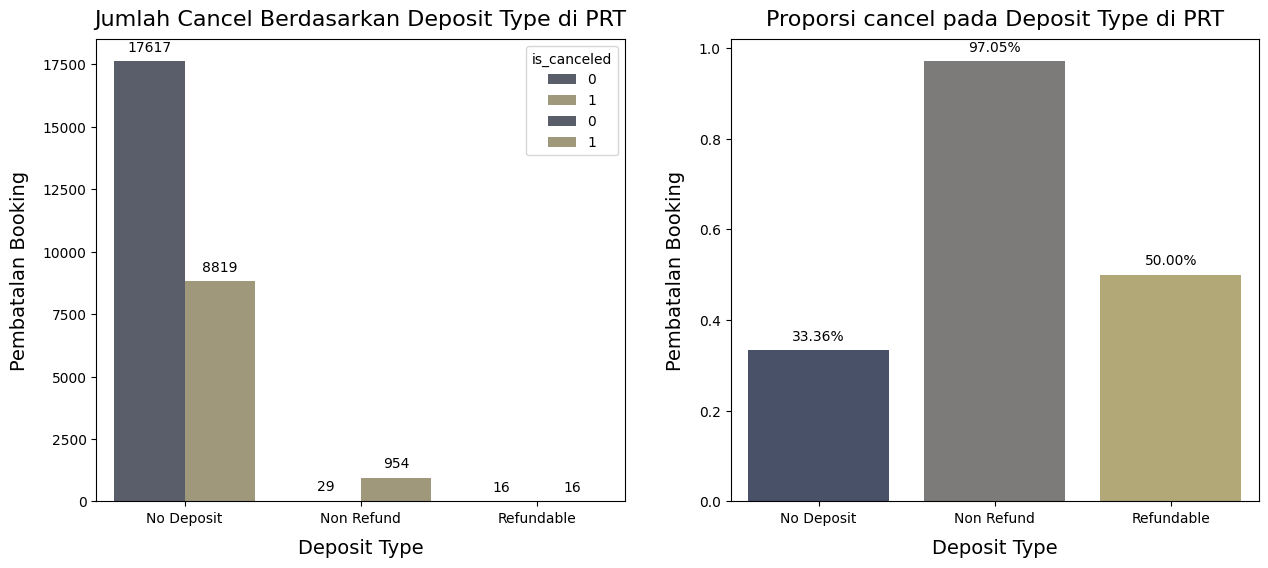

In [90]:
df_prt = df_analisis[df_analisis["country"] == "PRT"]

plt.figure(figsize=(15,6))

plt.subplot(1, 2, 1)
for i in range (2):
    ax = sns.barplot(data=df_prt, x='deposit_type', y='is_canceled', estimator=len, hue="is_canceled", palette='cividis', ci=0)
    container = ax.containers[i]
    ax.bar_label(container, [int(x) for x in container.datavalues], padding= 5)
    plt.title('Jumlah Cancel Berdasarkan Deposit Type di PRT', size=16, pad=10) 
    plt.xlabel('Deposit Type', size=14, labelpad = 10)
    plt.ylabel('Pembatalan Booking', size=14, labelpad = 10)


plt.subplot(1, 2, 2)
ax = sns.barplot(data=df_prt, x='deposit_type', y='is_canceled', estimator="mean", palette='cividis', ci=0)
container = ax.containers[0]
ax.bar_label(container, [f"{float(x)*100:.2f}%" for x in container.datavalues], padding= 5)
plt.title('Proporsi cancel pada Deposit Type di PRT', size=16, pad=10) 
plt.xlabel('Deposit Type', size=14, labelpad = 10)
plt.ylabel('Pembatalan Booking', size=14, labelpad = 10)
plt.show()


Berdasarakan grafik diatas dapat diketahui bahwa jumlah customer yang melakukan cancellation berasal dari customer yang tidak melakukan deposit. Hal ini menyebabkan tidak ada tanggungan terhadap biaya yang ditanggung oleh pelanggan atau pelanggan tidak keberatan terhadap kehilangan uang deposit. 

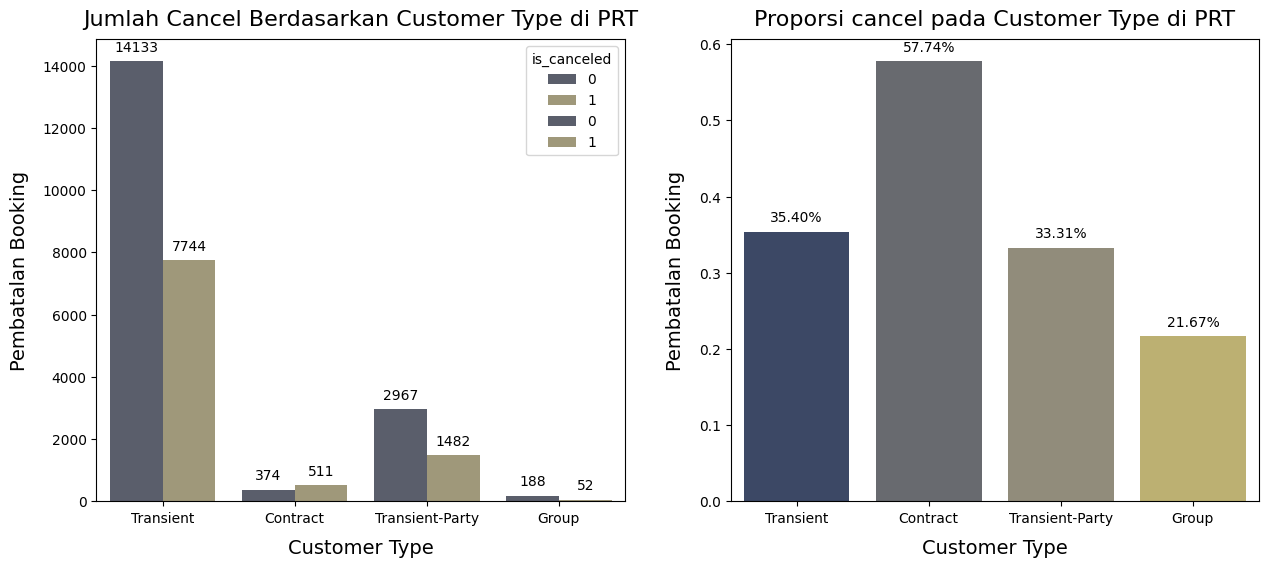

In [91]:
plt.figure(figsize=(15,6))

plt.subplot(1, 2, 1)
for i in range (2):
    ax = sns.barplot(data=df_prt, x='customer_type', y='is_canceled', estimator=len, hue="is_canceled", palette='cividis', ci=0)
    container = ax.containers[i]
    ax.bar_label(container, [int(x) for x in container.datavalues], padding= 5)
    plt.title('Jumlah Cancel Berdasarkan Customer Type di PRT', size=16, pad=10) 
    plt.xlabel('Customer Type', size=14, labelpad = 10)
    plt.ylabel('Pembatalan Booking', size=14, labelpad = 10)


plt.subplot(1, 2, 2)
ax = sns.barplot(data=df_prt, x='customer_type', y='is_canceled', estimator="mean", palette='cividis', ci=0)
container = ax.containers[0]
ax.bar_label(container, [f"{float(x)*100:.2f}%" for x in container.datavalues], padding= 5)
plt.title('Proporsi cancel pada Customer Type di PRT', size=16, pad=10) 
plt.xlabel('Customer Type', size=14, labelpad = 10)
plt.ylabel('Pembatalan Booking', size=14, labelpad = 10)
plt.show()

Setelah dianalaisis lebih dalam customer domestik (portugal) berasal dari customer type transient

#### **Bagaimana pengaruh deposit type konsumen terhadap pembatalan pemesanan hotel?**

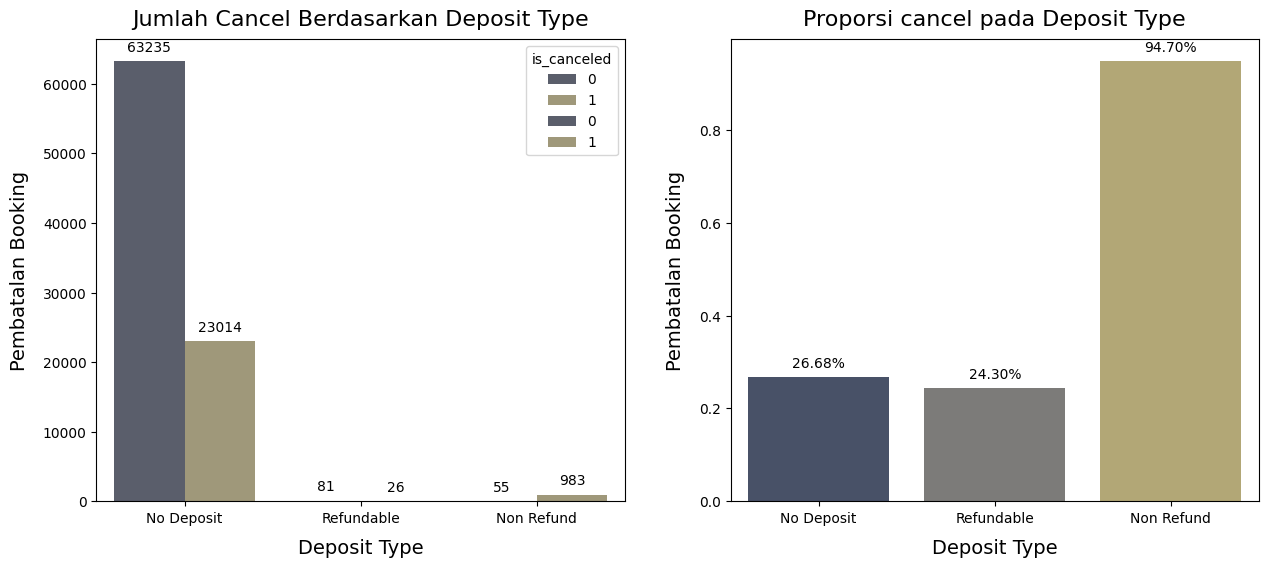

In [92]:
plt.figure(figsize=(15,6))

plt.subplot(1, 2, 1)
for i in range (2):
    ax = sns.barplot(data=df_analisis, x='deposit_type', y='is_canceled', estimator=len, hue="is_canceled", palette='cividis', ci=0)
    container = ax.containers[i]
    ax.bar_label(container, [int(x) for x in container.datavalues], padding= 5)
    plt.title('Jumlah Cancel Berdasarkan Deposit Type', size=16, pad=10) 
    plt.xlabel('Deposit Type', size=14, labelpad = 10)
    plt.ylabel('Pembatalan Booking', size=14, labelpad = 10)


plt.subplot(1, 2, 2)
ax = sns.barplot(data=df_analisis, x='deposit_type', y='is_canceled', estimator="mean", palette='cividis', ci=0)
container = ax.containers[0]
ax.bar_label(container, [f"{float(x)*100:.2f}%" for x in container.datavalues], padding= 5)
plt.title('Proporsi cancel pada Deposit Type', size=16, pad=10) 
plt.xlabel('Deposit Type', size=14, labelpad = 10)
plt.ylabel('Pembatalan Booking', size=14, labelpad = 10)
plt.show()

Apabila dilihat berdasarkakn tipe deposit yang dilakukan customer, jumlah yang melakukan cancel berdasarkan tipe deposit itu berdasarkan no deposit dan non refund yang dimana jika kita telaah hal ini dilakukan oleh customer karena dirasa customer lebih baik melakukan cancellation dibandingkan kehilangan uang deposit atau uang biaya hotel akibat tidak ada nya jaminan refundable.

### **RFM**

Analisis RFM ini kami lakukan untuk melihat karakteristik yang memiliki loyalitas terhadap hotel berdasarkan faktor recency(pelanggan yang baru-baru ini melakuan transaksi), faktor frequency (pelanggan yang sering melakukan repeatation order), dan monetary(berdasarkan nilai adrnya).

In [93]:
df_frequency = df_analisis[(df_analisis["is_repeated_guest"] == 1) & (df_analisis["is_canceled"] == 0)]
df_frequency.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,reservation_status_date_year,reservation_status_date_month,arrival_date,visitor,lead_time_group,arrival_month,visitor_chart,previous_cancellations_group
10725,Resort Hotel,0,6,2016,April,17,20,0,2,1,0,0,Bed and Breakfast,PRT,Complementary,Travel Agent/Tour Operators,1,0,1,E,E,0,No Deposit,AG-5,UNKNOWN,0,Transient,0.00,1,0,Check-Out,2016-04-22,2016,April,2016-04-20,1,<90,2016-04-01,1,No
11517,Resort Hotel,0,2,2016,May,19,4,0,1,1,0,0,Bed and Breakfast,PRT,Corporate,Corporate,1,0,2,A,A,0,No Deposit,AG-9,UNKNOWN,0,Transient,42.00,0,0,Check-Out,2016-05-05,2016,May,2016-05-04,1,<90,2016-05-01,1,No
11518,Resort Hotel,0,1,2016,June,26,21,0,1,1,0,0,Bed and Breakfast,PRT,Corporate,Corporate,1,0,3,A,A,0,No Deposit,AG-9,UNKNOWN,0,Transient,65.00,0,0,Check-Out,2016-06-22,2016,June,2016-06-21,1,<90,2016-06-01,1,No
11519,Resort Hotel,0,23,2015,October,41,4,2,0,1,0,0,Bed and Breakfast,PRT,Offline Travel Agent/Tour Operators,Travel Agent/Tour Operators,1,0,1,A,E,0,No Deposit,AG-314,UNKNOWN,0,Contract,46.40,0,0,Check-Out,2015-10-06,2015,October,2015-10-04,1,<90,2015-10-01,1,No
11523,Resort Hotel,0,109,2016,December,50,8,0,3,2,1,0,Bed and Breakfast,ESP,Direct,Travel Agent/Tour Operators,1,0,1,A,C,3,No Deposit,AG-250,UNKNOWN,0,Transient,49.02,0,2,Check-Out,2016-12-11,2016,December,2016-12-08,3,90-180,2016-12-01,3,No


In [94]:
df_recency = df_frequency.sort_values("arrival_date", ascending=False)
df_recency.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,reservation_status_date_year,reservation_status_date_month,arrival_date,visitor,lead_time_group,arrival_month,visitor_chart,previous_cancellations_group
64910,City Hotel,0,14,2017,August,35,31,0,1,1,0,0,Bed and Breakfast,PRT,Corporate,Corporate,1,0,3,A,A,1,No Deposit,UNKNOWN,CO-40,0,Transient,67.0,1,2,Check-Out,2017-09-01,2017,September,2017-08-31,1,<90,2017-08-01,1,No
27956,Resort Hotel,0,1,2017,August,35,31,0,1,2,0,0,Bed and Breakfast,PRT,Complementary,Direct,1,0,1,A,A,0,No Deposit,AG-531,UNKNOWN,0,Transient,0.0,0,1,Check-Out,2017-09-01,2017,September,2017-08-31,2,<90,2017-08-01,2,No
85720,City Hotel,0,3,2017,August,35,31,0,1,2,1,0,Bed and Breakfast,PRT,Corporate,Corporate,1,0,1,A,A,0,No Deposit,UNKNOWN,CO-40,0,Transient,95.0,0,4,Check-Out,2017-09-01,2017,September,2017-08-31,3,<90,2017-08-01,3,No
66285,City Hotel,0,3,2017,August,35,31,0,1,1,0,0,Bed and Breakfast,PRT,Corporate,Corporate,1,0,21,A,A,0,No Deposit,UNKNOWN,CO-40,0,Transient,67.0,0,3,Check-Out,2017-09-01,2017,September,2017-08-31,1,<90,2017-08-01,1,No
59137,City Hotel,0,8,2017,August,35,30,0,1,1,0,0,Bed and Breakfast,PRT,Corporate,Corporate,1,0,3,A,A,0,No Deposit,UNKNOWN,CO-219,0,Transient,80.0,0,2,Check-Out,2017-08-31,2017,August,2017-08-30,1,<90,2017-08-01,1,No


In [95]:
df_monetary = df_recency.sort_values(["arrival_date", "adr"], ascending=False)
df_monetary.head(10)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,reservation_status_date_year,reservation_status_date_month,arrival_date,visitor,lead_time_group,arrival_month,visitor_chart,previous_cancellations_group
85720,City Hotel,0,3,2017,August,35,31,0,1,2,1,0,Bed and Breakfast,PRT,Corporate,Corporate,1,0,1,A,A,0,No Deposit,UNKNOWN,CO-40,0,Transient,95.0,0,4,Check-Out,2017-09-01,2017,September,2017-08-31,3,<90,2017-08-01,3,No
64910,City Hotel,0,14,2017,August,35,31,0,1,1,0,0,Bed and Breakfast,PRT,Corporate,Corporate,1,0,3,A,A,1,No Deposit,UNKNOWN,CO-40,0,Transient,67.0,1,2,Check-Out,2017-09-01,2017,September,2017-08-31,1,<90,2017-08-01,1,No
66285,City Hotel,0,3,2017,August,35,31,0,1,1,0,0,Bed and Breakfast,PRT,Corporate,Corporate,1,0,21,A,A,0,No Deposit,UNKNOWN,CO-40,0,Transient,67.0,0,3,Check-Out,2017-09-01,2017,September,2017-08-31,1,<90,2017-08-01,1,No
27956,Resort Hotel,0,1,2017,August,35,31,0,1,2,0,0,Bed and Breakfast,PRT,Complementary,Direct,1,0,1,A,A,0,No Deposit,AG-531,UNKNOWN,0,Transient,0.0,0,1,Check-Out,2017-09-01,2017,September,2017-08-31,2,<90,2017-08-01,2,No
77896,City Hotel,0,34,2017,August,35,30,0,3,1,0,0,Bed and Breakfast,FRA,Corporate,Corporate,1,1,5,A,A,0,No Deposit,UNKNOWN,CO-91,0,Transient,85.0,0,0,Check-Out,2017-09-02,2017,September,2017-08-30,1,<90,2017-08-01,1,Yes
59137,City Hotel,0,8,2017,August,35,30,0,1,1,0,0,Bed and Breakfast,PRT,Corporate,Corporate,1,0,3,A,A,0,No Deposit,UNKNOWN,CO-219,0,Transient,80.0,0,2,Check-Out,2017-08-31,2017,August,2017-08-30,1,<90,2017-08-01,1,No
86097,City Hotel,0,7,2017,August,35,30,0,2,1,0,0,Bed and Breakfast,PRT,Corporate,Corporate,1,0,1,A,A,0,No Deposit,UNKNOWN,CO-40,0,Transient,65.0,0,2,Check-Out,2017-09-01,2017,September,2017-08-30,1,<90,2017-08-01,1,No
33769,Resort Hotel,0,0,2017,August,35,30,0,0,2,0,0,Bed and Breakfast,PRT,Online Travel Agent,Travel Agent/Tour Operators,1,0,0,A,A,0,No Deposit,AG-306,UNKNOWN,0,Transient,0.0,0,0,Check-Out,2017-08-30,2017,August,2017-08-30,2,<90,2017-08-01,2,No
87165,City Hotel,0,0,2017,August,35,29,0,1,2,3,0,Bed and Breakfast,GBR,Offline Travel Agent/Tour Operators,Travel Agent/Tour Operators,1,0,0,G,G,3,No Deposit,AG-229,UNKNOWN,0,Group,270.0,0,1,Check-Out,2017-08-30,2017,August,2017-08-29,5,<90,2017-08-01,>=5,No
22938,Resort Hotel,0,4,2017,August,35,29,0,4,2,0,0,Bed and Breakfast,PRT,Online Travel Agent,Direct,1,0,2,A,A,0,No Deposit,AG-240,UNKNOWN,0,Transient,196.5,1,2,Check-Out,2017-09-02,2017,September,2017-08-29,2,<90,2017-08-01,2,No


Berdasarkan analisis RFM dapat dilihat bahwa diata terdapat 10 data customer yang dikategorikan loyal. Dapat dilihat dari beberapa poin pentingnya seperti berikut :
1. Mayoritas customer yang loyal datang antara bulan Agustus-September 2017 (Summer season) dengan leadtime paling lama dalam H-50 (H-2bulan) kedatangan/check-in.
2. 10 customer ini juga memesan Package Bed and Breakfast.
3. Negara asal customer bersal dari negara portugal dan terdapat customer yang bersaal dari negara Prancis dan Jerman.
4. Berdasarkan ketepatan kamar yang dipesan dengan yang diberikan hotel yaitu sesuai pada tipe A dan G.
5. Mayoritas pelanggan berasal dari Transient customer

Sehingga dari poin-poin diatas rekomendasi untuk pihak hotel untuk menjaga loyalitas pelanggan dengan menerapkan pemebrian discount, bonus poin untuk setiap transaksi, memberi hadiah atau reward special terhadap customer yang loyal.

## **CONCLUSION AND RECOMMENDATION**

### `Conclusion`

Berdasarakan analisis dan penegmbangan model yang telah dilakukan, model prediktif yang mampu mengidentifikasi customer yang memiliki potensi melakukan cancel didapat menggunakan algoritma XGBoost dengan parameter Scale_post_weight. Parameter ini digunakan untuk imbalance data. Hyperparameter tuning dilakukan untuk mendapatkan nilai metriks evaluasi yang maksimal. Model XGBoost memiliki score Recall sebesar 99% yang artinya bahwa model mampu mengidentifikasi dan menangkap data yang memiliki potensi pembatalan booking hotel dengan baik sesuai dengan tujuan penelitian yang dilakukan. Model ini dapat digunakan dalam sektor perhotelan. Model dapat digambarkan secara cost analysis sebagai berikut:

Berdasarkan Asumsi yang dibuat:
- Harga rata-rata kamar hotel : 91.85 Euro
- Biaya Strategi Retensi : 10% x 91.85 Euro = 9.18 Euro

Asumsikan apabila terdapat 500 pemesanaan hotel dalam waktu tertentu:

Tanpa Model Prediksi:
Dari dataset yang telah dilakukan prediksi bahwa tingkat pembatalan pemesanan pada hotel secara total adalah sebesar 27%

- Jumlah pemesanan x Harga rata-rata kamar hotel x (1-Tingkat Cancel)
- = 500 pemesanan x 91.85 euro (1-27%)
- = 500 x 67.050
- = 33525.25 Euro

Setelah melakukan pengembangan model didapatkan data customer yang diprediksi tepat membatalkan pemesanan adalah 34% yang diasumsikan melanjutkan pemesanan karena dilakukannya strategi retensi, dan terdapat customer yang aktualnya tidak cancel namun diprediksi melakukan cancel sebanyak 74% sehingga tidak ada startegi retensi yang mengakibatkan tetap lanjut melakukan cancel sehingga hotel harus menanggung kerugian sebesar harga per malam.

- Jumlah pemesanan x Harga rata-rata kamar hotel x (1-Tingkat Cancel)
- = 500 pemesanan x 91.85 euro (1-74%)
- = 500 x 23.88
- = 11940.5 Euro

Sehingga perbandingan sebagai berikut:
- Potensi kerugian yang harus ditanggung oleh hotel tanpa model yaitu 33525.25 Euro
- Potensi kerugian yang harus ditanggung oleh hotel dengan menggunakan model yaitu 11940.5 Euro

Sehingga dalam hal ini hotel dapat mengurangi resiko kerugian sebesar 47.47%. Dalam kata lain dapat dikatakan model dapat membantu hotel untuk memprediksi customer yang memiliki potensi melakukan cancel.

### `Recommendation`

- Berdasarkan jeda waktu pemesan terhadap kedatangan booking kami merekomendasikan untuk pihak hotel membatasi waktu pemesanan ke waktu check in maksimal tidak lebih dari setahun 
- Menerapkan sistem reschedule/refund terhadap customer dengan maksimal hari pengajuan, dan memberikan kebijakan proporsional penalty terhadap customer yang melakukan cancellation mendekati waktu check in
- Hotel dapat meningkatkan pemesanan booking pada saat winter dan mengurangi pembatalan pemesanan booking pada saat summer season yang merupakan high season dengan memberikan penawaran ulang yang lebih menarik pada calon customer seperti memberikan voucher discount
- Merekomendasikan tim marketing untuk memberikan penawaran menarik berupa promosi free sarapan untuk pemesan self catering yang melakukan cancel
- Tim penyedia layanan hotel untuk menawarkan kebutuhan special request kepada pemesan yang tidak melakukan special request terlebih dahulu
- Membuat paket promo seperti iklan yang ditargetkan kepada akun sosial media pribadi berupa promo liburan atau promo akhir pekan dengan target audience type customer transient karena customer dengan type transient paling banyak melakukan pembatalan hotel, customer tersebut banyak melakukan pemesanan pada saat weekend sehingga kami merekomendasikan promo akhir pekan
- Menerapkan sistem reservasi pusat (CRS) untuk memeinimalisir ketidaksesuaian kamar dengan mengelola sistem ketersediaan kamar
- Menerapkan sistem deposit dan reschedule sebagai pertimbangan customer melakukan cancellation
- Memperbaiki pengelolaan di musim liburan atau pada high season
- Mengelola kebijakan pembatalan

### **MODEL LIMITATION**

Model ini hanya dapat digunakan pada rentang data yang digunakan pada pemodelan ini yaitu :

| Feature | Data Type | Limitasi |
| --- | --- | --- |
| `lead_time` | Integer | Jarak hari antara tanggal *booking* hotel hingga tanggal yang dijadwalkan untuk *check-in* di rentang 0-709 |
| `arrival_date_year` | Integer | Tahun dijadwalkan *check-in* di rentang 2015-2017 |
| `stays_in_weekend_nights` | Integer | Jumlah malam di akhir pekan (Sabtu atau Minggu) yang di-*booking* di rentang 0-19 |
| `stays_in_week_nights` | Integer | Jumlah malam dalam seminggu (Senin - Jum'at) yang di-*booking* di rentang 0-50 |
| `adults` | Integer | Jumlah orang dewasa di rentang 0-4 |
| `children` | Float | Jumlah anak-anak di rentang 0-10 |
| `babies` | Integer | Jumlah bayi di rentang 0-2 |
| `is_repeated_guest` | Integer | Nilai yang berasal dari pemesan yang berulang atau tidak di rentang 0-1 |
| `previous_cancellations` | Integer | Jumlah Pemesanan yang dibatalkan sebelumnya di rentang 0-26 |
| `previous_bookings_not_canceled` | Integer | Jumlah *booking* hotel sebelumnya yang tidak dibatalkan di rentang 0-72 |
| `booking_changes` | Integer | Jumlah perubahan yang dilakukan pada *booking* hotel di rentang 0-18 |
| `days_in_waiting_list` | Integer | Jumlah hari untuk setiap *booking* hotel yang masuk ke dalam *waiting list* di rentang 0-391 |
| `adr` | Float | Rata-rata tarif harian atau *Average Daily Rate* di rentang 0-510 |
| `required_car_parking_spaces` | Integer | Jumlah ruang parkir mobil yang dibutuhkan pemesan di rentang 0-3 |
| `total_of_special_requests` | Integer | Jumlah permintaan khusus yang dibuat oleh pemesan di rentang 0-5 |